In [1]:
import pathlib
import json
import pandas as pd
import numpy as np
from numpy import linalg as LA
import math
import os
import cv2 

/Desktop/automatic door(ham_ver)/obj/

In [ ]:
data_path = './Desktop/automatic_door(ham_ver)/obj/' 
dpath = pathlib.Path(data_path)
files=sorted(dpath.glob('*.txt'))
pic_files=sorted(dpath.glob('*.jpg'))

In [ ]:
for i,j in zip(files,pic_files) :
    txt=str(i)
    txt=txt[:-3]
    pic=str(j)
    pic=pic[:-3]
    print(txt)
    print(pic)
    img = cv2.imread("./"+str(j))
    height, width, channels = img.shape
    print(height)
    print(width)
    print('----------------')

## < x y h w to xmin xmax >
### xmax = int((x*width) + (w * width)/2.0)
### xmin = int((x*width) - (w * width)/2.0)
### ymax = int((y*height) + (h * height)/2.0)
### ymin = int((y*height) - (h * height)/2.0)
### class_id = int(class_id)
### return (class_id, xmin, xmax, ymin, ymax)

In [ ]:
for i,j in zip(files,pic_files) :
    txt=str(i)
    txt=txt[:-3]
    pic=str(j)
    pic=pic[:-3]
    #print(txt)
    #print(pic)
    img = cv2.imread("./"+str(j))
    height, width, channels = img.shape
    #print(height)
    #print(width)
    #print('----------------')
    if(txt!=pic):
        print(txt)
        print(pic)
        print('----------------')

In [5]:
def convert (width, height, x, y, w, h):
    xmax = int((x*width) + (w * width)/2.0)
    xmin = int((x*width) - (w * width)/2.0)
    ymax = int((y*height) + (h * height)/2.0)
    ymin = int((y*height) - (h * height)/2.0)
    return (xmin, xmax, ymin, ymax)

In [ ]:
xmin,xmax,ymin,ymax=convert(416,416,0.528,0.5518,0.2125,0.788)

In [ ]:
xmin

In [ ]:
xmax

In [ ]:
ymin


In [ ]:
ymax

In [ ]:
for i in files:
    #print(i_text[0:4])
    print(i)
    new_file = open('./test_data/data3.csv', "a")
    df = pd.read_csv(i, sep=" ", header=None, names=["id", "a", "b","c","d"])
    df = df.astype({"id": int})
    df=df.sort_values(by=['id'])
    df = df.reset_index(drop=True)
    for j in range(len(df)):
        data=df.iloc[j]
        check_0=data[0].astype(int)
        if check_0==0:
            door_text= "{} {} {} {}".format(data[1],data[2],data[3],data[4])
            #print("J = "+str(j))
            df1=df.drop(j)
            df1=df1.sort_values(by=['id'])
            df1 = df1.reset_index(drop=True)
            print(df1)
            print("*************************************************************************")
            for k in range(len(df1)):
                print("k= "+str(k))
                data2=df1.iloc(0)
                stock=data2[k]
                obj_text= "{} {} {} {} {}".format(stock[0].astype(int),stock[1],stock[2],stock[3],stock[4])
                print(obj_text+"**"+door_text)
                out=obj_text+" "+door_text+"\n"
                print("-------------------------------------------------------------------")
                new_file.write(str(out))
    new_file.close()
            
        #else:
            #door_text == None
            #df1=None
    

In [ ]:
for i,pic in zip(files,pic_files) :
    #print(i_text[0:4])
    print(i)
    new_file = open('./test_data/data_wh.csv', "a")
    df = pd.read_csv(i, sep=" ", header=None, names=["id", "a", "b","c","d"])
    df = df.astype({"id": int})
    df=df.sort_values(by=['id'])
    df = df.reset_index(drop=True)
    for j in range(len(df)):
        data=df.iloc[j]
        check_0=data[0].astype(int)
        if check_0==0:
            img = cv2.imread("./"+str(pic))
            height, width, channels = img.shape
            xmin,xmax,ymin,ymax=convert(width,height,data[1],data[2],data[3],data[4])
            door_text= "{} {} {} {} {} {}".format(data[1],data[2],data[3],data[4],height,width)
            #print("J = "+str(j))
            df1=df.drop(j)
            df1=df1.sort_values(by=['id'])
            df1 = df1.reset_index(drop=True)
            print(df1)
            print("*************************************************************************")
            for k in range(len(df1)):
                print("k= "+str(k))
                data2=df1.iloc(0)
                stock=data2[k]
                xmin,xmax,ymin,ymax=convert(width,height,stock[1],stock[2],stock[3],stock[4])
                obj_text= "{} {} {} {} {}".format(stock[0].astype(int),stock[1],stock[2],stock[3],stock[4])
                print(obj_text+"**"+door_text)
                out=obj_text+" "+door_text+"\n"
                print("-------------------------------------------------------------------")
                new_file.write(str(out))
    new_file.close()
            
        #else:
            #door_text == None
            #df1=None
    

# *****train part

In [6]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('./test_data/1_input/data3.csv', sep=" ", header=None, names=["id","a","b","c","d","a1", "b1","c1","d1"])

In [6]:
df

,id,a,b,c,d,a1,b1,c1,d1
0,4,0.519818,0.054811,0.082696,0.058619,0.397837,0.498798,0.747596,0.997596
1,2,0.485058,0.074790,0.270017,0.105330,0.492788,0.504808,0.514423,0.985577
2,2,0.596488,0.938373,0.283348,0.083575,0.575812,0.492089,0.492969,0.984177
3,2,0.642178,0.115425,0.499298,0.230850,0.519633,0.564480,0.665087,0.860526
4,2,0.612937,0.282335,0.379105,0.239829,0.519633,0.564480,0.665087,0.860526
...,...,...,...,...,...,...,...,...,...
6020,1,0.343750,0.604567,0.441106,0.134615,0.325721,0.473558,0.651442,0.627404
6021,2,0.754808,0.461538,0.140625,0.698317,0.325721,0.473558,0.651442,0.627404
6022,4,0.009615,0.471154,0.018029,0.100962,0.325721,0.473558,0.651442,0.627404
6023,1,0.360577,0.669471,0.515625,0.165865,0.368990,0.520433,0.710337,0.768029


In [ ]:
for i in df:
    print(i)

In [5]:
df.shape

(6025, 9)

In [6]:
df.columns

Index(['id', 'a', 'b', 'c', 'd', 'a1', 'b1', 'c1', 'd1'], dtype='object')

In [ ]:
changes={'1':'6','3':'4','4':'1','6':'3'}

In [ ]:
df['id'].replace({1:6,3:4,4:1,6:3})

In [ ]:
df['id']=df['id'].replace({1:6,3:4,4:1,6:3})

In [ ]:
df

In [ ]:
df.to_csv('iou2.csv')

In [7]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [8]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def format_output(data):
    y1 = data.pop('a1')
    y1 = np.array(y1)
    y2 = data.pop('b1')
    y2 = np.array(y2)
    y3 = data.pop('c1')
    y3 = np.array(y3)
    y4 = data.pop('d1')
    y4 = np.array(y4)
    return y1, y2, y3 ,y4

In [9]:
train_stats = train.describe()
train_stats.pop('a1')
train_stats.pop('b1')
train_stats.pop('c1')
train_stats.pop('d1')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)
val_Y = format_output(val)

norm_train_X = np.array(norm(train))
norm_test_X = np.array(norm(test))
norm_val_X = np.array(norm(val))

In [10]:
norm_train_X = np.array((train))
norm_test_X = np.array((test))
norm_val_X = np.array((val))

In [11]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train .columns),))
    first_dense = Dense(units='512', activation='relu')(input_layer)
    # Y1 output will be fed from the first dense
    layer1    = Dense(units='256', activation='relu')(first_dense)
    layer2    = Dense(units='128', activation='relu')(layer1)
    y1_output = Dense(units='1', name='a1_output')(layer2 )

    second_dense = Dense(units='512', activation='relu')(layer2)
    # Y2 output will be fed from the second dense
    layer3    = Dense(units='256', activation='relu')(second_dense)
    layer4    = Dense(units='128', activation='relu')(layer3)
    y2_output = Dense(units='1', name='b1_output')(layer4)
    
    third_dense = Dense(units='512', activation='relu')(layer4)
    layer4    = Dense(units='256', activation='relu')(third_dense)
    layer5    = Dense(units='128', activation='relu')(layer4)
    y3_output = Dense(units='1', name='c1_output')(layer5)
    
    fouth_dense = Dense(units='512', activation='relu')(layer5)
    layer6    = Dense(units='265', activation='relu')(fouth_dense)
    layer7    = Dense(units='128', activation='relu')(layer6)
    y4_output = Dense(units='1', name='d1_output')(layer7)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output, y3_output, y4_output])

    return model

In [12]:
def build_model2():
    # Define model layers.
    input_layer = Input(shape=(len(train .columns),))
# Y1 output will be fed from the first dense
    first_dense = Dense(units='512', activation='relu')(input_layer)
    layer1    = Dense(units='256', activation='relu')(first_dense)
    layer2    = Dense(units='128', activation='relu')(layer1)

# Y2 output will be fed from the second dense
    second_dense = Dense(units='512', activation='relu')(layer2)
    layer3    = Dense(units='256', activation='relu')(second_dense)
    layer4    = Dense(units='128', activation='relu')(layer3)

    
    third_dense = Dense(units='512', activation='relu')(layer4)
    layer4    = Dense(units='256', activation='relu')(third_dense)
    layer5    = Dense(units='128', activation='relu')(layer4)

    
    fouth_dense = Dense(units='512', activation='relu')(layer5)
    layer6    = Dense(units='265', activation='relu')(fouth_dense)
    layer7    = Dense(units='128', activation='relu')(layer6)
    y1_output = Dense(units='1', name='a1_output')(layer7)
    y2_output = Dense(units='1', name='b1_output')(layer7)
    y3_output = Dense(units='1', name='c1_output')(layer7)
    y4_output = Dense(units='1', name='d1_output')(layer7)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output, y3_output, y4_output])

    return model

## not good
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train .columns),))
    first_dense = Dense(units='4096', activation='relu')(input_layer)
    # Y1 output will be fed from the first dense
    layer1    = Dense(units='2048', activation='relu')(first_dense)
    layer2    = Dense(units='1024', activation='relu')(layer1)
    

    second_dense = Dense(units='512', activation='relu')(layer2)
    # Y2 output will be fed from the second dense
    layer3    = Dense(units='256', activation='relu')(second_dense)
    layer4    = Dense(units='128', activation='relu')(layer3)

    
    third_dense = Dense(units='128', activation='relu')(layer4)
    layer4    = Dense(units='128', activation='relu')(third_dense)
    layer5    = Dense(units='64', activation='relu')(layer4)
    y3_output = Dense(units='32', name='c1_output')(layer5)
    
    fouth_dense = Dense(units='16', activation='relu')(layer5)
    layer6    = Dense(units='8', activation='relu')(fouth_dense)
    layer7    = Dense(units='4', activation='relu')(layer6)
    y1_output = Dense(units='1', name='a1_output')(layer7)
    y2_output = Dense(units='1', name='b1_output')(layer7)
    y3_output = Dense(units='1', name='c1_output')(layer7)
    y4_output = Dense(units='1', name='d1_output')(layer7)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output, y3_output, y4_output])

    return model

In [13]:
model = build_model()
#loss MAPE 13-25%
#adamax mse 15-25%
#adam mse 14-24%
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'a1_output': 'mse', 'b1_output': 'mse', 'c1_output': 'mse', 'd1_output': 'mse'},
              metrics={'a1_output': tf.keras.metrics.MeanAbsolutePercentageError(),
                       'b1_output': tf.keras.metrics.MeanAbsolutePercentageError(),
                       'c1_output': tf.keras.metrics.MeanAbsolutePercentageError(),
                       'd1_output': tf.keras.metrics.MeanAbsolutePercentageError()})

In [14]:
model2 = build_model2()

optimizer = tf.keras.optimizers.Adam(lr=0.001)
model2.compile(optimizer=optimizer,
              loss={'a1_output': 'mse', 'b1_output': 'mse', 'c1_output': 'mse', 'd1_output': 'mse'},
              metrics={'a1_output': tf.keras.metrics.MeanAbsolutePercentageError(),
                       'b1_output': tf.keras.metrics.MeanAbsolutePercentageError(),
                       'c1_output': tf.keras.metrics.MeanAbsolutePercentageError(),
                       'd1_output': tf.keras.metrics.MeanAbsolutePercentageError()})

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          3072        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          131328      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
______________________________________________________________________________________________

In [16]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 512)          3072        input_2[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 256)          131328      dense_12[0][0]                   
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 128)          32896       dense_13[0][0]                   
____________________________________________________________________________________________

In [17]:
history = model.fit(norm_train_X, train_Y,
                    epochs=1000, batch_size=1000, validation_data=(norm_test_X, test_Y))

Train on 3856 samples, validate on 1205 samples
Epoch 1/1000
3856/3856 [==============================] - 1s 250us/sample - loss: 1.0136 - a1_output_loss: 0.1628 - b1_output_loss: 0.1393 - c1_output_loss: 0.3391 - d1_output_loss: 0.3564 - a1_output_mean_absolute_percentage_error: 69.9906 - b1_output_mean_absolute_percentage_error: 65.1356 - c1_output_mean_absolute_percentage_error: 81.6745 - d1_output_mean_absolute_percentage_error: 83.6203 - val_loss: 0.4474 - val_a1_output_loss: 0.0746 - val_b1_output_loss: 0.1874 - val_c1_output_loss: 0.0924 - val_d1_output_loss: 0.0871 - val_a1_output_mean_absolute_percentage_error: 50.2630 - val_b1_output_mean_absolute_percentage_error: 79.5093 - val_c1_output_mean_absolute_percentage_error: 56.7744 - val_d1_output_mean_absolute_percentage_error: 51.1096
Epoch 2/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.3160 - a1_output_loss: 0.0456 - b1_output_loss: 0.0894 - c1_output_loss: 0.0898 - d1_output_loss: 0.0882 - a1_out

Epoch 12/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.1066 - a1_output_loss: 0.0139 - b1_output_loss: 0.0149 - c1_output_loss: 0.0380 - d1_output_loss: 0.0400 - a1_output_mean_absolute_percentage_error: 21.3476 - b1_output_mean_absolute_percentage_error: 22.2162 - c1_output_mean_absolute_percentage_error: 34.7324 - d1_output_mean_absolute_percentage_error: 35.5567 - val_loss: 0.0998 - val_a1_output_loss: 0.0138 - val_b1_output_loss: 0.0143 - val_c1_output_loss: 0.0368 - val_d1_output_loss: 0.0337 - val_a1_output_mean_absolute_percentage_error: 21.5320 - val_b1_output_mean_absolute_percentage_error: 21.5378 - val_c1_output_mean_absolute_percentage_error: 36.2572 - val_d1_output_mean_absolute_percentage_error: 35.0668
Epoch 13/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.1027 - a1_output_loss: 0.0135 - b1_output_loss: 0.0145 - c1_output_loss: 0.0367 - d1_output_loss: 0.0379 - a1_output_mean_absolute_percentage_error: 20.7894 - b

Epoch 23/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0912 - a1_output_loss: 0.0112 - b1_output_loss: 0.0121 - c1_output_loss: 0.0332 - d1_output_loss: 0.0347 - a1_output_mean_absolute_percentage_error: 18.8849 - b1_output_mean_absolute_percentage_error: 19.9977 - c1_output_mean_absolute_percentage_error: 32.1848 - d1_output_mean_absolute_percentage_error: 32.1042 - val_loss: 0.0875 - val_a1_output_loss: 0.0120 - val_b1_output_loss: 0.0111 - val_c1_output_loss: 0.0325 - val_d1_output_loss: 0.0298 - val_a1_output_mean_absolute_percentage_error: 20.0375 - val_b1_output_mean_absolute_percentage_error: 20.4007 - val_c1_output_mean_absolute_percentage_error: 32.7336 - val_d1_output_mean_absolute_percentage_error: 30.6186
Epoch 24/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0904 - a1_output_loss: 0.0110 - b1_output_loss: 0.0121 - c1_output_loss: 0.0327 - d1_output_loss: 0.0346 - a1_output_mean_absolute_percentage_error: 18.8407 - b

Epoch 34/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0870 - a1_output_loss: 0.0102 - b1_output_loss: 0.0118 - c1_output_loss: 0.0315 - d1_output_loss: 0.0334 - a1_output_mean_absolute_percentage_error: 17.9784 - b1_output_mean_absolute_percentage_error: 20.6480 - c1_output_mean_absolute_percentage_error: 30.4441 - d1_output_mean_absolute_percentage_error: 30.6436 - val_loss: 0.0840 - val_a1_output_loss: 0.0114 - val_b1_output_loss: 0.0110 - val_c1_output_loss: 0.0309 - val_d1_output_loss: 0.0284 - val_a1_output_mean_absolute_percentage_error: 19.1002 - val_b1_output_mean_absolute_percentage_error: 18.7305 - val_c1_output_mean_absolute_percentage_error: 31.3520 - val_d1_output_mean_absolute_percentage_error: 29.7319
Epoch 35/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0859 - a1_output_loss: 0.0102 - b1_output_loss: 0.0118 - c1_output_loss: 0.0309 - d1_output_loss: 0.0331 - a1_output_mean_absolute_percentage_error: 18.2002 - b

Epoch 45/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0824 - a1_output_loss: 0.0097 - b1_output_loss: 0.0108 - c1_output_loss: 0.0297 - d1_output_loss: 0.0322 - a1_output_mean_absolute_percentage_error: 17.7384 - b1_output_mean_absolute_percentage_error: 18.9198 - c1_output_mean_absolute_percentage_error: 30.0779 - d1_output_mean_absolute_percentage_error: 30.6915 - val_loss: 0.0793 - val_a1_output_loss: 0.0109 - val_b1_output_loss: 0.0099 - val_c1_output_loss: 0.0289 - val_d1_output_loss: 0.0267 - val_a1_output_mean_absolute_percentage_error: 18.4262 - val_b1_output_mean_absolute_percentage_error: 18.2409 - val_c1_output_mean_absolute_percentage_error: 29.7498 - val_d1_output_mean_absolute_percentage_error: 27.7084
Epoch 46/1000
3856/3856 [==============================] - 0s 25us/sample - loss: 0.0812 - a1_output_loss: 0.0096 - b1_output_loss: 0.0108 - c1_output_loss: 0.0290 - d1_output_loss: 0.0316 - a1_output_mean_absolute_percentage_error: 17.4130 - b

Epoch 56/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0828 - a1_output_loss: 0.0094 - b1_output_loss: 0.0103 - c1_output_loss: 0.0301 - d1_output_loss: 0.0328 - a1_output_mean_absolute_percentage_error: 16.9455 - b1_output_mean_absolute_percentage_error: 18.0110 - c1_output_mean_absolute_percentage_error: 30.4708 - d1_output_mean_absolute_percentage_error: 30.8013 - val_loss: 0.0798 - val_a1_output_loss: 0.0108 - val_b1_output_loss: 0.0094 - val_c1_output_loss: 0.0291 - val_d1_output_loss: 0.0274 - val_a1_output_mean_absolute_percentage_error: 18.7684 - val_b1_output_mean_absolute_percentage_error: 17.9639 - val_c1_output_mean_absolute_percentage_error: 32.4171 - val_d1_output_mean_absolute_percentage_error: 30.8121
Epoch 57/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0799 - a1_output_loss: 0.0093 - b1_output_loss: 0.0102 - c1_output_loss: 0.0286 - d1_output_loss: 0.0317 - a1_output_mean_absolute_percentage_error: 17.3846 - b

Epoch 67/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0773 - a1_output_loss: 0.0091 - b1_output_loss: 0.0098 - c1_output_loss: 0.0275 - d1_output_loss: 0.0307 - a1_output_mean_absolute_percentage_error: 16.5929 - b1_output_mean_absolute_percentage_error: 16.9774 - c1_output_mean_absolute_percentage_error: 27.4904 - d1_output_mean_absolute_percentage_error: 28.8018 - val_loss: 0.0754 - val_a1_output_loss: 0.0103 - val_b1_output_loss: 0.0090 - val_c1_output_loss: 0.0278 - val_d1_output_loss: 0.0256 - val_a1_output_mean_absolute_percentage_error: 17.9630 - val_b1_output_mean_absolute_percentage_error: 17.4803 - val_c1_output_mean_absolute_percentage_error: 25.2529 - val_d1_output_mean_absolute_percentage_error: 24.2396
Epoch 68/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0753 - a1_output_loss: 0.0090 - b1_output_loss: 0.0098 - c1_output_loss: 0.0269 - d1_output_loss: 0.0295 - a1_output_mean_absolute_percentage_error: 16.7873 - b

Epoch 78/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0673 - a1_output_loss: 0.0088 - b1_output_loss: 0.0097 - c1_output_loss: 0.0226 - d1_output_loss: 0.0261 - a1_output_mean_absolute_percentage_error: 16.4714 - b1_output_mean_absolute_percentage_error: 17.1528 - c1_output_mean_absolute_percentage_error: 24.7335 - d1_output_mean_absolute_percentage_error: 26.3221 - val_loss: 0.0635 - val_a1_output_loss: 0.0100 - val_b1_output_loss: 0.0087 - val_c1_output_loss: 0.0222 - val_d1_output_loss: 0.0199 - val_a1_output_mean_absolute_percentage_error: 17.4351 - val_b1_output_mean_absolute_percentage_error: 16.4370 - val_c1_output_mean_absolute_percentage_error: 25.7228 - val_d1_output_mean_absolute_percentage_error: 24.2149
Epoch 79/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0658 - a1_output_loss: 0.0088 - b1_output_loss: 0.0097 - c1_output_loss: 0.0229 - d1_output_loss: 0.0244 - a1_output_mean_absolute_percentage_error: 16.4486 - b

Epoch 89/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0613 - a1_output_loss: 0.0088 - b1_output_loss: 0.0094 - c1_output_loss: 0.0213 - d1_output_loss: 0.0217 - a1_output_mean_absolute_percentage_error: 16.2932 - b1_output_mean_absolute_percentage_error: 16.4491 - c1_output_mean_absolute_percentage_error: 22.5315 - d1_output_mean_absolute_percentage_error: 23.3932 - val_loss: 0.0585 - val_a1_output_loss: 0.0098 - val_b1_output_loss: 0.0083 - val_c1_output_loss: 0.0199 - val_d1_output_loss: 0.0182 - val_a1_output_mean_absolute_percentage_error: 17.2979 - val_b1_output_mean_absolute_percentage_error: 15.8146 - val_c1_output_mean_absolute_percentage_error: 22.8823 - val_d1_output_mean_absolute_percentage_error: 20.4980
Epoch 90/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0604 - a1_output_loss: 0.0087 - b1_output_loss: 0.0094 - c1_output_loss: 0.0204 - d1_output_loss: 0.0218 - a1_output_mean_absolute_percentage_error: 16.2334 - b

Epoch 100/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0595 - a1_output_loss: 0.0084 - b1_output_loss: 0.0091 - c1_output_loss: 0.0206 - d1_output_loss: 0.0213 - a1_output_mean_absolute_percentage_error: 15.8622 - b1_output_mean_absolute_percentage_error: 15.9194 - c1_output_mean_absolute_percentage_error: 22.3440 - d1_output_mean_absolute_percentage_error: 22.5912 - val_loss: 0.0569 - val_a1_output_loss: 0.0096 - val_b1_output_loss: 0.0080 - val_c1_output_loss: 0.0193 - val_d1_output_loss: 0.0177 - val_a1_output_mean_absolute_percentage_error: 16.6794 - val_b1_output_mean_absolute_percentage_error: 15.6026 - val_c1_output_mean_absolute_percentage_error: 20.8925 - val_d1_output_mean_absolute_percentage_error: 19.1904
Epoch 101/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0580 - a1_output_loss: 0.0084 - b1_output_loss: 0.0089 - c1_output_loss: 0.0204 - d1_output_loss: 0.0203 - a1_output_mean_absolute_percentage_error: 16.1811 -

Epoch 111/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0544 - a1_output_loss: 0.0082 - b1_output_loss: 0.0086 - c1_output_loss: 0.0192 - d1_output_loss: 0.0186 - a1_output_mean_absolute_percentage_error: 15.6920 - b1_output_mean_absolute_percentage_error: 15.5580 - c1_output_mean_absolute_percentage_error: 20.9279 - d1_output_mean_absolute_percentage_error: 20.6944 - val_loss: 0.0555 - val_a1_output_loss: 0.0094 - val_b1_output_loss: 0.0078 - val_c1_output_loss: 0.0192 - val_d1_output_loss: 0.0162 - val_a1_output_mean_absolute_percentage_error: 16.7111 - val_b1_output_mean_absolute_percentage_error: 16.0078 - val_c1_output_mean_absolute_percentage_error: 24.1161 - val_d1_output_mean_absolute_percentage_error: 21.6338
Epoch 112/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0538 - a1_output_loss: 0.0081 - b1_output_loss: 0.0086 - c1_output_loss: 0.0179 - d1_output_loss: 0.0191 - a1_output_mean_absolute_percentage_error: 15.6957 -

Epoch 122/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0505 - a1_output_loss: 0.0082 - b1_output_loss: 0.0084 - c1_output_loss: 0.0169 - d1_output_loss: 0.0171 - a1_output_mean_absolute_percentage_error: 15.9050 - b1_output_mean_absolute_percentage_error: 15.1729 - c1_output_mean_absolute_percentage_error: 19.5545 - d1_output_mean_absolute_percentage_error: 19.7403 - val_loss: 0.0530 - val_a1_output_loss: 0.0093 - val_b1_output_loss: 0.0080 - val_c1_output_loss: 0.0173 - val_d1_output_loss: 0.0154 - val_a1_output_mean_absolute_percentage_error: 16.3874 - val_b1_output_mean_absolute_percentage_error: 16.7864 - val_c1_output_mean_absolute_percentage_error: 21.2941 - val_d1_output_mean_absolute_percentage_error: 20.3049
Epoch 123/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0522 - a1_output_loss: 0.0080 - b1_output_loss: 0.0085 - c1_output_loss: 0.0175 - d1_output_loss: 0.0182 - a1_output_mean_absolute_percentage_error: 15.3258 -

Epoch 133/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0498 - a1_output_loss: 0.0081 - b1_output_loss: 0.0081 - c1_output_loss: 0.0169 - d1_output_loss: 0.0168 - a1_output_mean_absolute_percentage_error: 15.6204 - b1_output_mean_absolute_percentage_error: 14.9929 - c1_output_mean_absolute_percentage_error: 19.3441 - d1_output_mean_absolute_percentage_error: 19.5203 - val_loss: 0.0511 - val_a1_output_loss: 0.0093 - val_b1_output_loss: 0.0072 - val_c1_output_loss: 0.0172 - val_d1_output_loss: 0.0145 - val_a1_output_mean_absolute_percentage_error: 16.3021 - val_b1_output_mean_absolute_percentage_error: 15.0862 - val_c1_output_mean_absolute_percentage_error: 21.6826 - val_d1_output_mean_absolute_percentage_error: 18.8084
Epoch 134/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0485 - a1_output_loss: 0.0080 - b1_output_loss: 0.0080 - c1_output_loss: 0.0161 - d1_output_loss: 0.0165 - a1_output_mean_absolute_percentage_error: 15.4869 -

Epoch 144/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0480 - a1_output_loss: 0.0080 - b1_output_loss: 0.0078 - c1_output_loss: 0.0159 - d1_output_loss: 0.0162 - a1_output_mean_absolute_percentage_error: 15.0582 - b1_output_mean_absolute_percentage_error: 14.4786 - c1_output_mean_absolute_percentage_error: 18.5289 - d1_output_mean_absolute_percentage_error: 19.1763 - val_loss: 0.0534 - val_a1_output_loss: 0.0097 - val_b1_output_loss: 0.0075 - val_c1_output_loss: 0.0194 - val_d1_output_loss: 0.0146 - val_a1_output_mean_absolute_percentage_error: 17.1571 - val_b1_output_mean_absolute_percentage_error: 16.0401 - val_c1_output_mean_absolute_percentage_error: 24.2101 - val_d1_output_mean_absolute_percentage_error: 18.6718
Epoch 145/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0479 - a1_output_loss: 0.0079 - b1_output_loss: 0.0078 - c1_output_loss: 0.0160 - d1_output_loss: 0.0161 - a1_output_mean_absolute_percentage_error: 15.3374 -

Epoch 155/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0457 - a1_output_loss: 0.0079 - b1_output_loss: 0.0077 - c1_output_loss: 0.0150 - d1_output_loss: 0.0153 - a1_output_mean_absolute_percentage_error: 14.9830 - b1_output_mean_absolute_percentage_error: 14.5348 - c1_output_mean_absolute_percentage_error: 18.0502 - d1_output_mean_absolute_percentage_error: 18.4028 - val_loss: 0.0493 - val_a1_output_loss: 0.0092 - val_b1_output_loss: 0.0070 - val_c1_output_loss: 0.0162 - val_d1_output_loss: 0.0141 - val_a1_output_mean_absolute_percentage_error: 16.4509 - val_b1_output_mean_absolute_percentage_error: 14.2697 - val_c1_output_mean_absolute_percentage_error: 18.4126 - val_d1_output_mean_absolute_percentage_error: 16.9378
Epoch 156/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0471 - a1_output_loss: 0.0078 - b1_output_loss: 0.0078 - c1_output_loss: 0.0158 - d1_output_loss: 0.0157 - a1_output_mean_absolute_percentage_error: 15.0721 -

Epoch 166/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0462 - a1_output_loss: 0.0077 - b1_output_loss: 0.0078 - c1_output_loss: 0.0156 - d1_output_loss: 0.0152 - a1_output_mean_absolute_percentage_error: 14.9842 - b1_output_mean_absolute_percentage_error: 14.5790 - c1_output_mean_absolute_percentage_error: 18.7676 - d1_output_mean_absolute_percentage_error: 18.5678 - val_loss: 0.0486 - val_a1_output_loss: 0.0091 - val_b1_output_loss: 0.0070 - val_c1_output_loss: 0.0153 - val_d1_output_loss: 0.0142 - val_a1_output_mean_absolute_percentage_error: 16.1240 - val_b1_output_mean_absolute_percentage_error: 14.4179 - val_c1_output_mean_absolute_percentage_error: 18.5616 - val_d1_output_mean_absolute_percentage_error: 18.7571
Epoch 167/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0444 - a1_output_loss: 0.0077 - b1_output_loss: 0.0076 - c1_output_loss: 0.0146 - d1_output_loss: 0.0145 - a1_output_mean_absolute_percentage_error: 14.9015 -

Epoch 177/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0441 - a1_output_loss: 0.0076 - b1_output_loss: 0.0074 - c1_output_loss: 0.0138 - d1_output_loss: 0.0153 - a1_output_mean_absolute_percentage_error: 14.7807 - b1_output_mean_absolute_percentage_error: 14.0174 - c1_output_mean_absolute_percentage_error: 17.4102 - d1_output_mean_absolute_percentage_error: 18.3444 - val_loss: 0.0496 - val_a1_output_loss: 0.0091 - val_b1_output_loss: 0.0067 - val_c1_output_loss: 0.0166 - val_d1_output_loss: 0.0148 - val_a1_output_mean_absolute_percentage_error: 16.0353 - val_b1_output_mean_absolute_percentage_error: 14.3751 - val_c1_output_mean_absolute_percentage_error: 22.0595 - val_d1_output_mean_absolute_percentage_error: 17.8334
Epoch 178/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0429 - a1_output_loss: 0.0076 - b1_output_loss: 0.0074 - c1_output_loss: 0.0135 - d1_output_loss: 0.0143 - a1_output_mean_absolute_percentage_error: 15.0568 -

Epoch 188/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0434 - a1_output_loss: 0.0076 - b1_output_loss: 0.0074 - c1_output_loss: 0.0138 - d1_output_loss: 0.0145 - a1_output_mean_absolute_percentage_error: 14.7296 - b1_output_mean_absolute_percentage_error: 14.2090 - c1_output_mean_absolute_percentage_error: 17.7516 - d1_output_mean_absolute_percentage_error: 18.4053 - val_loss: 0.0532 - val_a1_output_loss: 0.0093 - val_b1_output_loss: 0.0070 - val_c1_output_loss: 0.0186 - val_d1_output_loss: 0.0160 - val_a1_output_mean_absolute_percentage_error: 16.3538 - val_b1_output_mean_absolute_percentage_error: 14.6756 - val_c1_output_mean_absolute_percentage_error: 19.0819 - val_d1_output_mean_absolute_percentage_error: 16.9887
Epoch 189/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0465 - a1_output_loss: 0.0076 - b1_output_loss: 0.0074 - c1_output_loss: 0.0168 - d1_output_loss: 0.0146 - a1_output_mean_absolute_percentage_error: 14.8856 -

Epoch 199/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0454 - a1_output_loss: 0.0076 - b1_output_loss: 0.0072 - c1_output_loss: 0.0157 - d1_output_loss: 0.0151 - a1_output_mean_absolute_percentage_error: 14.6862 - b1_output_mean_absolute_percentage_error: 13.7782 - c1_output_mean_absolute_percentage_error: 19.1247 - d1_output_mean_absolute_percentage_error: 19.3019 - val_loss: 0.0490 - val_a1_output_loss: 0.0091 - val_b1_output_loss: 0.0066 - val_c1_output_loss: 0.0169 - val_d1_output_loss: 0.0137 - val_a1_output_mean_absolute_percentage_error: 16.2539 - val_b1_output_mean_absolute_percentage_error: 14.0336 - val_c1_output_mean_absolute_percentage_error: 18.4423 - val_d1_output_mean_absolute_percentage_error: 17.2276
Epoch 200/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0457 - a1_output_loss: 0.0075 - b1_output_loss: 0.0072 - c1_output_loss: 0.0152 - d1_output_loss: 0.0159 - a1_output_mean_absolute_percentage_error: 14.6634 -

Epoch 210/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0395 - a1_output_loss: 0.0075 - b1_output_loss: 0.0070 - c1_output_loss: 0.0121 - d1_output_loss: 0.0128 - a1_output_mean_absolute_percentage_error: 14.7961 - b1_output_mean_absolute_percentage_error: 13.7065 - c1_output_mean_absolute_percentage_error: 16.0542 - d1_output_mean_absolute_percentage_error: 16.8555 - val_loss: 0.0467 - val_a1_output_loss: 0.0090 - val_b1_output_loss: 0.0065 - val_c1_output_loss: 0.0145 - val_d1_output_loss: 0.0138 - val_a1_output_mean_absolute_percentage_error: 15.9175 - val_b1_output_mean_absolute_percentage_error: 13.8980 - val_c1_output_mean_absolute_percentage_error: 17.6156 - val_d1_output_mean_absolute_percentage_error: 18.3182
Epoch 211/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0396 - a1_output_loss: 0.0074 - b1_output_loss: 0.0069 - c1_output_loss: 0.0126 - d1_output_loss: 0.0127 - a1_output_mean_absolute_percentage_error: 14.5402 -

Epoch 221/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0455 - a1_output_loss: 0.0075 - b1_output_loss: 0.0071 - c1_output_loss: 0.0161 - d1_output_loss: 0.0149 - a1_output_mean_absolute_percentage_error: 14.3966 - b1_output_mean_absolute_percentage_error: 13.5681 - c1_output_mean_absolute_percentage_error: 18.4923 - d1_output_mean_absolute_percentage_error: 17.9162 - val_loss: 0.0471 - val_a1_output_loss: 0.0093 - val_b1_output_loss: 0.0066 - val_c1_output_loss: 0.0151 - val_d1_output_loss: 0.0137 - val_a1_output_mean_absolute_percentage_error: 16.5282 - val_b1_output_mean_absolute_percentage_error: 13.9434 - val_c1_output_mean_absolute_percentage_error: 20.7835 - val_d1_output_mean_absolute_percentage_error: 17.8291
Epoch 222/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0416 - a1_output_loss: 0.0075 - b1_output_loss: 0.0069 - c1_output_loss: 0.0140 - d1_output_loss: 0.0132 - a1_output_mean_absolute_percentage_error: 14.7489 -

Epoch 232/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0413 - a1_output_loss: 0.0075 - b1_output_loss: 0.0069 - c1_output_loss: 0.0140 - d1_output_loss: 0.0128 - a1_output_mean_absolute_percentage_error: 14.6681 - b1_output_mean_absolute_percentage_error: 13.6008 - c1_output_mean_absolute_percentage_error: 17.1319 - d1_output_mean_absolute_percentage_error: 16.3080 - val_loss: 0.0492 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0065 - val_c1_output_loss: 0.0144 - val_d1_output_loss: 0.0166 - val_a1_output_mean_absolute_percentage_error: 15.7299 - val_b1_output_mean_absolute_percentage_error: 14.0322 - val_c1_output_mean_absolute_percentage_error: 19.4189 - val_d1_output_mean_absolute_percentage_error: 21.4078
Epoch 233/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0393 - a1_output_loss: 0.0073 - b1_output_loss: 0.0066 - c1_output_loss: 0.0121 - d1_output_loss: 0.0133 - a1_output_mean_absolute_percentage_error: 14.5150 -

Epoch 243/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0364 - a1_output_loss: 0.0073 - b1_output_loss: 0.0066 - c1_output_loss: 0.0112 - d1_output_loss: 0.0113 - a1_output_mean_absolute_percentage_error: 14.5353 - b1_output_mean_absolute_percentage_error: 13.2024 - c1_output_mean_absolute_percentage_error: 15.2771 - d1_output_mean_absolute_percentage_error: 15.2373 - val_loss: 0.0446 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0064 - val_c1_output_loss: 0.0136 - val_d1_output_loss: 0.0132 - val_a1_output_mean_absolute_percentage_error: 15.7805 - val_b1_output_mean_absolute_percentage_error: 14.0801 - val_c1_output_mean_absolute_percentage_error: 18.1435 - val_d1_output_mean_absolute_percentage_error: 16.9954
Epoch 244/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0362 - a1_output_loss: 0.0073 - b1_output_loss: 0.0066 - c1_output_loss: 0.0113 - d1_output_loss: 0.0111 - a1_output_mean_absolute_percentage_error: 14.3226 -

Epoch 254/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0358 - a1_output_loss: 0.0072 - b1_output_loss: 0.0065 - c1_output_loss: 0.0108 - d1_output_loss: 0.0112 - a1_output_mean_absolute_percentage_error: 14.4191 - b1_output_mean_absolute_percentage_error: 13.1303 - c1_output_mean_absolute_percentage_error: 14.9711 - d1_output_mean_absolute_percentage_error: 15.3483 - val_loss: 0.0476 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0065 - val_c1_output_loss: 0.0150 - val_d1_output_loss: 0.0145 - val_a1_output_mean_absolute_percentage_error: 15.7191 - val_b1_output_mean_absolute_percentage_error: 14.1772 - val_c1_output_mean_absolute_percentage_error: 19.5268 - val_d1_output_mean_absolute_percentage_error: 18.7246
Epoch 255/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0369 - a1_output_loss: 0.0074 - b1_output_loss: 0.0065 - c1_output_loss: 0.0111 - d1_output_loss: 0.0119 - a1_output_mean_absolute_percentage_error: 14.6486 -

Epoch 265/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0417 - a1_output_loss: 0.0072 - b1_output_loss: 0.0066 - c1_output_loss: 0.0114 - d1_output_loss: 0.0165 - a1_output_mean_absolute_percentage_error: 14.3175 - b1_output_mean_absolute_percentage_error: 13.1158 - c1_output_mean_absolute_percentage_error: 16.1629 - d1_output_mean_absolute_percentage_error: 19.3524 - val_loss: 0.0468 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0067 - val_c1_output_loss: 0.0140 - val_d1_output_loss: 0.0152 - val_a1_output_mean_absolute_percentage_error: 15.5839 - val_b1_output_mean_absolute_percentage_error: 14.4931 - val_c1_output_mean_absolute_percentage_error: 17.2430 - val_d1_output_mean_absolute_percentage_error: 16.9317
Epoch 266/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0387 - a1_output_loss: 0.0072 - b1_output_loss: 0.0066 - c1_output_loss: 0.0121 - d1_output_loss: 0.0128 - a1_output_mean_absolute_percentage_error: 14.1987 -

Epoch 276/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0359 - a1_output_loss: 0.0071 - b1_output_loss: 0.0062 - c1_output_loss: 0.0107 - d1_output_loss: 0.0118 - a1_output_mean_absolute_percentage_error: 14.1985 - b1_output_mean_absolute_percentage_error: 12.7570 - c1_output_mean_absolute_percentage_error: 15.3690 - d1_output_mean_absolute_percentage_error: 16.1470 - val_loss: 0.0453 - val_a1_output_loss: 0.0090 - val_b1_output_loss: 0.0062 - val_c1_output_loss: 0.0148 - val_d1_output_loss: 0.0135 - val_a1_output_mean_absolute_percentage_error: 15.9259 - val_b1_output_mean_absolute_percentage_error: 13.7805 - val_c1_output_mean_absolute_percentage_error: 17.1567 - val_d1_output_mean_absolute_percentage_error: 16.1563
Epoch 277/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0348 - a1_output_loss: 0.0072 - b1_output_loss: 0.0062 - c1_output_loss: 0.0110 - d1_output_loss: 0.0105 - a1_output_mean_absolute_percentage_error: 14.2337 -

Epoch 287/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0351 - a1_output_loss: 0.0071 - b1_output_loss: 0.0062 - c1_output_loss: 0.0104 - d1_output_loss: 0.0114 - a1_output_mean_absolute_percentage_error: 14.3659 - b1_output_mean_absolute_percentage_error: 12.7150 - c1_output_mean_absolute_percentage_error: 14.5135 - d1_output_mean_absolute_percentage_error: 15.4032 - val_loss: 0.0473 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0062 - val_c1_output_loss: 0.0137 - val_d1_output_loss: 0.0167 - val_a1_output_mean_absolute_percentage_error: 15.5789 - val_b1_output_mean_absolute_percentage_error: 13.6349 - val_c1_output_mean_absolute_percentage_error: 17.6654 - val_d1_output_mean_absolute_percentage_error: 17.3099
Epoch 288/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0363 - a1_output_loss: 0.0071 - b1_output_loss: 0.0064 - c1_output_loss: 0.0112 - d1_output_loss: 0.0116 - a1_output_mean_absolute_percentage_error: 14.1048 -

Epoch 298/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0353 - a1_output_loss: 0.0071 - b1_output_loss: 0.0060 - c1_output_loss: 0.0111 - d1_output_loss: 0.0110 - a1_output_mean_absolute_percentage_error: 14.0996 - b1_output_mean_absolute_percentage_error: 12.3283 - c1_output_mean_absolute_percentage_error: 15.4737 - d1_output_mean_absolute_percentage_error: 14.7596 - val_loss: 0.0466 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0063 - val_c1_output_loss: 0.0137 - val_d1_output_loss: 0.0148 - val_a1_output_mean_absolute_percentage_error: 15.6797 - val_b1_output_mean_absolute_percentage_error: 13.5350 - val_c1_output_mean_absolute_percentage_error: 17.2439 - val_d1_output_mean_absolute_percentage_error: 18.9970
Epoch 299/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0341 - a1_output_loss: 0.0071 - b1_output_loss: 0.0062 - c1_output_loss: 0.0099 - d1_output_loss: 0.0110 - a1_output_mean_absolute_percentage_error: 14.1352 -

Epoch 309/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0328 - a1_output_loss: 0.0072 - b1_output_loss: 0.0059 - c1_output_loss: 0.0097 - d1_output_loss: 0.0100 - a1_output_mean_absolute_percentage_error: 14.0832 - b1_output_mean_absolute_percentage_error: 12.3118 - c1_output_mean_absolute_percentage_error: 14.2757 - d1_output_mean_absolute_percentage_error: 14.2319 - val_loss: 0.0432 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0061 - val_c1_output_loss: 0.0133 - val_d1_output_loss: 0.0128 - val_a1_output_mean_absolute_percentage_error: 15.7311 - val_b1_output_mean_absolute_percentage_error: 13.4517 - val_c1_output_mean_absolute_percentage_error: 17.8907 - val_d1_output_mean_absolute_percentage_error: 16.6368
Epoch 310/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0327 - a1_output_loss: 0.0073 - b1_output_loss: 0.0059 - c1_output_loss: 0.0096 - d1_output_loss: 0.0099 - a1_output_mean_absolute_percentage_error: 14.4029 -

Epoch 320/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0302 - a1_output_loss: 0.0070 - b1_output_loss: 0.0058 - c1_output_loss: 0.0085 - d1_output_loss: 0.0089 - a1_output_mean_absolute_percentage_error: 14.1099 - b1_output_mean_absolute_percentage_error: 12.4541 - c1_output_mean_absolute_percentage_error: 13.3155 - d1_output_mean_absolute_percentage_error: 13.1278 - val_loss: 0.0437 - val_a1_output_loss: 0.0088 - val_b1_output_loss: 0.0060 - val_c1_output_loss: 0.0138 - val_d1_output_loss: 0.0129 - val_a1_output_mean_absolute_percentage_error: 15.4075 - val_b1_output_mean_absolute_percentage_error: 13.3821 - val_c1_output_mean_absolute_percentage_error: 17.9318 - val_d1_output_mean_absolute_percentage_error: 16.6486
Epoch 321/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0303 - a1_output_loss: 0.0070 - b1_output_loss: 0.0058 - c1_output_loss: 0.0088 - d1_output_loss: 0.0087 - a1_output_mean_absolute_percentage_error: 13.9850 -

Epoch 331/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0320 - a1_output_loss: 0.0070 - b1_output_loss: 0.0057 - c1_output_loss: 0.0091 - d1_output_loss: 0.0101 - a1_output_mean_absolute_percentage_error: 13.9792 - b1_output_mean_absolute_percentage_error: 11.9208 - c1_output_mean_absolute_percentage_error: 13.5483 - d1_output_mean_absolute_percentage_error: 14.4507 - val_loss: 0.0441 - val_a1_output_loss: 0.0088 - val_b1_output_loss: 0.0064 - val_c1_output_loss: 0.0133 - val_d1_output_loss: 0.0133 - val_a1_output_mean_absolute_percentage_error: 15.5361 - val_b1_output_mean_absolute_percentage_error: 13.9741 - val_c1_output_mean_absolute_percentage_error: 17.0949 - val_d1_output_mean_absolute_percentage_error: 17.2404
Epoch 332/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0313 - a1_output_loss: 0.0070 - b1_output_loss: 0.0057 - c1_output_loss: 0.0092 - d1_output_loss: 0.0093 - a1_output_mean_absolute_percentage_error: 13.8614 -

Epoch 342/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0308 - a1_output_loss: 0.0071 - b1_output_loss: 0.0055 - c1_output_loss: 0.0090 - d1_output_loss: 0.0093 - a1_output_mean_absolute_percentage_error: 13.9537 - b1_output_mean_absolute_percentage_error: 11.7891 - c1_output_mean_absolute_percentage_error: 13.4771 - d1_output_mean_absolute_percentage_error: 13.4496 - val_loss: 0.0435 - val_a1_output_loss: 0.0088 - val_b1_output_loss: 0.0063 - val_c1_output_loss: 0.0137 - val_d1_output_loss: 0.0128 - val_a1_output_mean_absolute_percentage_error: 15.6513 - val_b1_output_mean_absolute_percentage_error: 13.6709 - val_c1_output_mean_absolute_percentage_error: 17.9047 - val_d1_output_mean_absolute_percentage_error: 16.0471
Epoch 343/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0311 - a1_output_loss: 0.0070 - b1_output_loss: 0.0056 - c1_output_loss: 0.0087 - d1_output_loss: 0.0099 - a1_output_mean_absolute_percentage_error: 14.0127 -

Epoch 353/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0290 - a1_output_loss: 0.0069 - b1_output_loss: 0.0055 - c1_output_loss: 0.0089 - d1_output_loss: 0.0079 - a1_output_mean_absolute_percentage_error: 13.8389 - b1_output_mean_absolute_percentage_error: 11.6854 - c1_output_mean_absolute_percentage_error: 13.5921 - d1_output_mean_absolute_percentage_error: 12.2967 - val_loss: 0.0509 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0062 - val_c1_output_loss: 0.0186 - val_d1_output_loss: 0.0151 - val_a1_output_mean_absolute_percentage_error: 15.6897 - val_b1_output_mean_absolute_percentage_error: 13.5025 - val_c1_output_mean_absolute_percentage_error: 18.6278 - val_d1_output_mean_absolute_percentage_error: 16.7485
Epoch 354/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0349 - a1_output_loss: 0.0070 - b1_output_loss: 0.0056 - c1_output_loss: 0.0104 - d1_output_loss: 0.0116 - a1_output_mean_absolute_percentage_error: 13.9623 -

Epoch 364/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0303 - a1_output_loss: 0.0069 - b1_output_loss: 0.0055 - c1_output_loss: 0.0090 - d1_output_loss: 0.0089 - a1_output_mean_absolute_percentage_error: 13.9015 - b1_output_mean_absolute_percentage_error: 11.9078 - c1_output_mean_absolute_percentage_error: 13.9629 - d1_output_mean_absolute_percentage_error: 13.4317 - val_loss: 0.0464 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0065 - val_c1_output_loss: 0.0132 - val_d1_output_loss: 0.0156 - val_a1_output_mean_absolute_percentage_error: 15.3113 - val_b1_output_mean_absolute_percentage_error: 14.0066 - val_c1_output_mean_absolute_percentage_error: 17.0063 - val_d1_output_mean_absolute_percentage_error: 16.5486
Epoch 365/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0308 - a1_output_loss: 0.0070 - b1_output_loss: 0.0057 - c1_output_loss: 0.0083 - d1_output_loss: 0.0098 - a1_output_mean_absolute_percentage_error: 13.9271 -

Epoch 375/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0310 - a1_output_loss: 0.0070 - b1_output_loss: 0.0055 - c1_output_loss: 0.0095 - d1_output_loss: 0.0089 - a1_output_mean_absolute_percentage_error: 13.9722 - b1_output_mean_absolute_percentage_error: 11.7333 - c1_output_mean_absolute_percentage_error: 13.6717 - d1_output_mean_absolute_percentage_error: 12.8631 - val_loss: 0.0442 - val_a1_output_loss: 0.0087 - val_b1_output_loss: 0.0061 - val_c1_output_loss: 0.0148 - val_d1_output_loss: 0.0130 - val_a1_output_mean_absolute_percentage_error: 15.1942 - val_b1_output_mean_absolute_percentage_error: 13.2408 - val_c1_output_mean_absolute_percentage_error: 19.6130 - val_d1_output_mean_absolute_percentage_error: 15.4064
Epoch 376/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0291 - a1_output_loss: 0.0069 - b1_output_loss: 0.0054 - c1_output_loss: 0.0081 - d1_output_loss: 0.0088 - a1_output_mean_absolute_percentage_error: 13.8133 -

Epoch 386/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0292 - a1_output_loss: 0.0070 - b1_output_loss: 0.0053 - c1_output_loss: 0.0087 - d1_output_loss: 0.0083 - a1_output_mean_absolute_percentage_error: 13.8550 - b1_output_mean_absolute_percentage_error: 11.5712 - c1_output_mean_absolute_percentage_error: 13.4854 - d1_output_mean_absolute_percentage_error: 12.3321 - val_loss: 0.0459 - val_a1_output_loss: 0.0090 - val_b1_output_loss: 0.0061 - val_c1_output_loss: 0.0138 - val_d1_output_loss: 0.0141 - val_a1_output_mean_absolute_percentage_error: 15.9626 - val_b1_output_mean_absolute_percentage_error: 13.1732 - val_c1_output_mean_absolute_percentage_error: 16.7231 - val_d1_output_mean_absolute_percentage_error: 17.5087
Epoch 387/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0275 - a1_output_loss: 0.0070 - b1_output_loss: 0.0053 - c1_output_loss: 0.0075 - d1_output_loss: 0.0078 - a1_output_mean_absolute_percentage_error: 13.8185 -

Epoch 397/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0265 - a1_output_loss: 0.0068 - b1_output_loss: 0.0051 - c1_output_loss: 0.0078 - d1_output_loss: 0.0069 - a1_output_mean_absolute_percentage_error: 13.6403 - b1_output_mean_absolute_percentage_error: 11.3211 - c1_output_mean_absolute_percentage_error: 12.6665 - d1_output_mean_absolute_percentage_error: 11.2124 - val_loss: 0.0423 - val_a1_output_loss: 0.0088 - val_b1_output_loss: 0.0061 - val_c1_output_loss: 0.0123 - val_d1_output_loss: 0.0137 - val_a1_output_mean_absolute_percentage_error: 15.6131 - val_b1_output_mean_absolute_percentage_error: 13.2840 - val_c1_output_mean_absolute_percentage_error: 16.0362 - val_d1_output_mean_absolute_percentage_error: 15.4134
Epoch 398/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0265 - a1_output_loss: 0.0068 - b1_output_loss: 0.0051 - c1_output_loss: 0.0067 - d1_output_loss: 0.0079 - a1_output_mean_absolute_percentage_error: 13.7995 -

Epoch 408/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0255 - a1_output_loss: 0.0068 - b1_output_loss: 0.0052 - c1_output_loss: 0.0068 - d1_output_loss: 0.0067 - a1_output_mean_absolute_percentage_error: 13.6608 - b1_output_mean_absolute_percentage_error: 11.6459 - c1_output_mean_absolute_percentage_error: 11.7557 - d1_output_mean_absolute_percentage_error: 10.8966 - val_loss: 0.0428 - val_a1_output_loss: 0.0087 - val_b1_output_loss: 0.0062 - val_c1_output_loss: 0.0127 - val_d1_output_loss: 0.0127 - val_a1_output_mean_absolute_percentage_error: 15.4643 - val_b1_output_mean_absolute_percentage_error: 13.1711 - val_c1_output_mean_absolute_percentage_error: 16.0369 - val_d1_output_mean_absolute_percentage_error: 16.2158
Epoch 409/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0254 - a1_output_loss: 0.0067 - b1_output_loss: 0.0050 - c1_output_loss: 0.0068 - d1_output_loss: 0.0068 - a1_output_mean_absolute_percentage_error: 13.6756 -

Epoch 419/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0247 - a1_output_loss: 0.0068 - b1_output_loss: 0.0050 - c1_output_loss: 0.0064 - d1_output_loss: 0.0065 - a1_output_mean_absolute_percentage_error: 13.7073 - b1_output_mean_absolute_percentage_error: 11.2371 - c1_output_mean_absolute_percentage_error: 11.2041 - d1_output_mean_absolute_percentage_error: 10.7467 - val_loss: 0.0405 - val_a1_output_loss: 0.0087 - val_b1_output_loss: 0.0059 - val_c1_output_loss: 0.0122 - val_d1_output_loss: 0.0117 - val_a1_output_mean_absolute_percentage_error: 15.4745 - val_b1_output_mean_absolute_percentage_error: 13.0124 - val_c1_output_mean_absolute_percentage_error: 16.3238 - val_d1_output_mean_absolute_percentage_error: 14.5768
Epoch 420/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0242 - a1_output_loss: 0.0068 - b1_output_loss: 0.0050 - c1_output_loss: 0.0063 - d1_output_loss: 0.0062 - a1_output_mean_absolute_percentage_error: 13.6196 -

Epoch 430/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0255 - a1_output_loss: 0.0067 - b1_output_loss: 0.0048 - c1_output_loss: 0.0070 - d1_output_loss: 0.0070 - a1_output_mean_absolute_percentage_error: 13.6903 - b1_output_mean_absolute_percentage_error: 10.9486 - c1_output_mean_absolute_percentage_error: 12.0432 - d1_output_mean_absolute_percentage_error: 10.7282 - val_loss: 0.0411 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0060 - val_c1_output_loss: 0.0126 - val_d1_output_loss: 0.0122 - val_a1_output_mean_absolute_percentage_error: 15.1032 - val_b1_output_mean_absolute_percentage_error: 12.9172 - val_c1_output_mean_absolute_percentage_error: 15.9427 - val_d1_output_mean_absolute_percentage_error: 15.7026
Epoch 431/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0246 - a1_output_loss: 0.0068 - b1_output_loss: 0.0048 - c1_output_loss: 0.0063 - d1_output_loss: 0.0067 - a1_output_mean_absolute_percentage_error: 13.5617 -

Epoch 441/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0257 - a1_output_loss: 0.0068 - b1_output_loss: 0.0052 - c1_output_loss: 0.0070 - d1_output_loss: 0.0067 - a1_output_mean_absolute_percentage_error: 13.5526 - b1_output_mean_absolute_percentage_error: 11.7231 - c1_output_mean_absolute_percentage_error: 11.6307 - d1_output_mean_absolute_percentage_error: 10.9463 - val_loss: 0.0418 - val_a1_output_loss: 0.0087 - val_b1_output_loss: 0.0062 - val_c1_output_loss: 0.0130 - val_d1_output_loss: 0.0119 - val_a1_output_mean_absolute_percentage_error: 15.2804 - val_b1_output_mean_absolute_percentage_error: 12.9482 - val_c1_output_mean_absolute_percentage_error: 16.5528 - val_d1_output_mean_absolute_percentage_error: 15.8262
Epoch 442/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0247 - a1_output_loss: 0.0067 - b1_output_loss: 0.0049 - c1_output_loss: 0.0065 - d1_output_loss: 0.0065 - a1_output_mean_absolute_percentage_error: 13.5531 -

Epoch 452/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0247 - a1_output_loss: 0.0067 - b1_output_loss: 0.0048 - c1_output_loss: 0.0064 - d1_output_loss: 0.0069 - a1_output_mean_absolute_percentage_error: 13.4685 - b1_output_mean_absolute_percentage_error: 10.9235 - c1_output_mean_absolute_percentage_error: 11.2631 - d1_output_mean_absolute_percentage_error: 10.4407 - val_loss: 0.0403 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0059 - val_c1_output_loss: 0.0117 - val_d1_output_loss: 0.0119 - val_a1_output_mean_absolute_percentage_error: 15.0960 - val_b1_output_mean_absolute_percentage_error: 13.0192 - val_c1_output_mean_absolute_percentage_error: 15.2381 - val_d1_output_mean_absolute_percentage_error: 15.7110
Epoch 453/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0246 - a1_output_loss: 0.0066 - b1_output_loss: 0.0047 - c1_output_loss: 0.0062 - d1_output_loss: 0.0071 - a1_output_mean_absolute_percentage_error: 13.4779 -

Epoch 463/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0238 - a1_output_loss: 0.0066 - b1_output_loss: 0.0047 - c1_output_loss: 0.0061 - d1_output_loss: 0.0064 - a1_output_mean_absolute_percentage_error: 13.5054 - b1_output_mean_absolute_percentage_error: 10.8788 - c1_output_mean_absolute_percentage_error: 10.7793 - d1_output_mean_absolute_percentage_error: 10.6785 - val_loss: 0.0421 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0058 - val_c1_output_loss: 0.0128 - val_d1_output_loss: 0.0128 - val_a1_output_mean_absolute_percentage_error: 15.1011 - val_b1_output_mean_absolute_percentage_error: 12.6993 - val_c1_output_mean_absolute_percentage_error: 15.5429 - val_d1_output_mean_absolute_percentage_error: 16.7807
Epoch 464/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0234 - a1_output_loss: 0.0066 - b1_output_loss: 0.0047 - c1_output_loss: 0.0057 - d1_output_loss: 0.0063 - a1_output_mean_absolute_percentage_error: 13.4247 -

Epoch 474/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0225 - a1_output_loss: 0.0066 - b1_output_loss: 0.0044 - c1_output_loss: 0.0054 - d1_output_loss: 0.0060 - a1_output_mean_absolute_percentage_error: 13.4578 - b1_output_mean_absolute_percentage_error: 10.5536 - c1_output_mean_absolute_percentage_error: 10.3120 - d1_output_mean_absolute_percentage_error: 10.3398 - val_loss: 0.0403 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0058 - val_c1_output_loss: 0.0120 - val_d1_output_loss: 0.0122 - val_a1_output_mean_absolute_percentage_error: 15.0293 - val_b1_output_mean_absolute_percentage_error: 12.5910 - val_c1_output_mean_absolute_percentage_error: 15.4314 - val_d1_output_mean_absolute_percentage_error: 14.5822
Epoch 475/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0231 - a1_output_loss: 0.0066 - b1_output_loss: 0.0045 - c1_output_loss: 0.0061 - d1_output_loss: 0.0059 - a1_output_mean_absolute_percentage_error: 13.3754 -

Epoch 485/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0216 - a1_output_loss: 0.0066 - b1_output_loss: 0.0044 - c1_output_loss: 0.0056 - d1_output_loss: 0.0051 - a1_output_mean_absolute_percentage_error: 13.4201 - b1_output_mean_absolute_percentage_error: 10.4953 - c1_output_mean_absolute_percentage_error: 10.5917 - d1_output_mean_absolute_percentage_error: 9.3220 - val_loss: 0.0408 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0058 - val_c1_output_loss: 0.0122 - val_d1_output_loss: 0.0124 - val_a1_output_mean_absolute_percentage_error: 15.0155 - val_b1_output_mean_absolute_percentage_error: 12.5813 - val_c1_output_mean_absolute_percentage_error: 15.3608 - val_d1_output_mean_absolute_percentage_error: 14.8911
Epoch 486/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0218 - a1_output_loss: 0.0065 - b1_output_loss: 0.0044 - c1_output_loss: 0.0055 - d1_output_loss: 0.0054 - a1_output_mean_absolute_percentage_error: 13.2497 - 

Epoch 496/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0244 - a1_output_loss: 0.0066 - b1_output_loss: 0.0047 - c1_output_loss: 0.0064 - d1_output_loss: 0.0066 - a1_output_mean_absolute_percentage_error: 13.4357 - b1_output_mean_absolute_percentage_error: 11.0597 - c1_output_mean_absolute_percentage_error: 11.6746 - d1_output_mean_absolute_percentage_error: 10.6366 - val_loss: 0.0425 - val_a1_output_loss: 0.0088 - val_b1_output_loss: 0.0064 - val_c1_output_loss: 0.0140 - val_d1_output_loss: 0.0113 - val_a1_output_mean_absolute_percentage_error: 15.0985 - val_b1_output_mean_absolute_percentage_error: 13.0668 - val_c1_output_mean_absolute_percentage_error: 18.8163 - val_d1_output_mean_absolute_percentage_error: 14.4976
Epoch 497/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0239 - a1_output_loss: 0.0068 - b1_output_loss: 0.0050 - c1_output_loss: 0.0061 - d1_output_loss: 0.0061 - a1_output_mean_absolute_percentage_error: 13.6701 -

Epoch 507/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0228 - a1_output_loss: 0.0065 - b1_output_loss: 0.0044 - c1_output_loss: 0.0054 - d1_output_loss: 0.0066 - a1_output_mean_absolute_percentage_error: 13.3806 - b1_output_mean_absolute_percentage_error: 10.5758 - c1_output_mean_absolute_percentage_error: 10.1890 - d1_output_mean_absolute_percentage_error: 10.2675 - val_loss: 0.0430 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0058 - val_c1_output_loss: 0.0136 - val_d1_output_loss: 0.0128 - val_a1_output_mean_absolute_percentage_error: 14.9451 - val_b1_output_mean_absolute_percentage_error: 12.4062 - val_c1_output_mean_absolute_percentage_error: 17.4080 - val_d1_output_mean_absolute_percentage_error: 16.4925
Epoch 508/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0217 - a1_output_loss: 0.0065 - b1_output_loss: 0.0042 - c1_output_loss: 0.0053 - d1_output_loss: 0.0057 - a1_output_mean_absolute_percentage_error: 13.3173 -

Epoch 518/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0203 - a1_output_loss: 0.0065 - b1_output_loss: 0.0043 - c1_output_loss: 0.0046 - d1_output_loss: 0.0049 - a1_output_mean_absolute_percentage_error: 13.3062 - b1_output_mean_absolute_percentage_error: 10.3917 - c1_output_mean_absolute_percentage_error: 9.5815 - d1_output_mean_absolute_percentage_error: 9.0573 - val_loss: 0.0408 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0058 - val_c1_output_loss: 0.0123 - val_d1_output_loss: 0.0121 - val_a1_output_mean_absolute_percentage_error: 15.2554 - val_b1_output_mean_absolute_percentage_error: 12.6496 - val_c1_output_mean_absolute_percentage_error: 15.9067 - val_d1_output_mean_absolute_percentage_error: 14.8666
Epoch 519/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0212 - a1_output_loss: 0.0065 - b1_output_loss: 0.0042 - c1_output_loss: 0.0047 - d1_output_loss: 0.0060 - a1_output_mean_absolute_percentage_error: 13.2666 - b

Epoch 529/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0188 - a1_output_loss: 0.0065 - b1_output_loss: 0.0041 - c1_output_loss: 0.0042 - d1_output_loss: 0.0042 - a1_output_mean_absolute_percentage_error: 13.2993 - b1_output_mean_absolute_percentage_error: 10.0875 - c1_output_mean_absolute_percentage_error: 8.7628 - d1_output_mean_absolute_percentage_error: 8.0907 - val_loss: 0.0392 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0057 - val_c1_output_loss: 0.0113 - val_d1_output_loss: 0.0117 - val_a1_output_mean_absolute_percentage_error: 14.8906 - val_b1_output_mean_absolute_percentage_error: 12.4235 - val_c1_output_mean_absolute_percentage_error: 14.7048 - val_d1_output_mean_absolute_percentage_error: 14.5393
Epoch 530/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0185 - a1_output_loss: 0.0064 - b1_output_loss: 0.0040 - c1_output_loss: 0.0041 - d1_output_loss: 0.0040 - a1_output_mean_absolute_percentage_error: 13.1413 - b

Epoch 540/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0251 - a1_output_loss: 0.0064 - b1_output_loss: 0.0041 - c1_output_loss: 0.0072 - d1_output_loss: 0.0075 - a1_output_mean_absolute_percentage_error: 13.0941 - b1_output_mean_absolute_percentage_error: 10.0803 - c1_output_mean_absolute_percentage_error: 12.0266 - d1_output_mean_absolute_percentage_error: 11.7132 - val_loss: 0.0402 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0057 - val_c1_output_loss: 0.0121 - val_d1_output_loss: 0.0120 - val_a1_output_mean_absolute_percentage_error: 14.9794 - val_b1_output_mean_absolute_percentage_error: 12.4175 - val_c1_output_mean_absolute_percentage_error: 15.4261 - val_d1_output_mean_absolute_percentage_error: 14.6740
Epoch 541/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0224 - a1_output_loss: 0.0065 - b1_output_loss: 0.0042 - c1_output_loss: 0.0063 - d1_output_loss: 0.0054 - a1_output_mean_absolute_percentage_error: 13.2858 -

Epoch 551/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0194 - a1_output_loss: 0.0063 - b1_output_loss: 0.0041 - c1_output_loss: 0.0044 - d1_output_loss: 0.0046 - a1_output_mean_absolute_percentage_error: 13.1040 - b1_output_mean_absolute_percentage_error: 10.0701 - c1_output_mean_absolute_percentage_error: 9.0233 - d1_output_mean_absolute_percentage_error: 8.5910 - val_loss: 0.0399 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0059 - val_c1_output_loss: 0.0114 - val_d1_output_loss: 0.0120 - val_a1_output_mean_absolute_percentage_error: 14.9932 - val_b1_output_mean_absolute_percentage_error: 12.9589 - val_c1_output_mean_absolute_percentage_error: 14.8670 - val_d1_output_mean_absolute_percentage_error: 14.7523
Epoch 552/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0189 - a1_output_loss: 0.0064 - b1_output_loss: 0.0041 - c1_output_loss: 0.0041 - d1_output_loss: 0.0042 - a1_output_mean_absolute_percentage_error: 13.0850 - b

Epoch 562/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0184 - a1_output_loss: 0.0064 - b1_output_loss: 0.0037 - c1_output_loss: 0.0042 - d1_output_loss: 0.0040 - a1_output_mean_absolute_percentage_error: 13.2788 - b1_output_mean_absolute_percentage_error: 9.6235 - c1_output_mean_absolute_percentage_error: 8.9327 - d1_output_mean_absolute_percentage_error: 7.8788 - val_loss: 0.0387 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0057 - val_c1_output_loss: 0.0114 - val_d1_output_loss: 0.0114 - val_a1_output_mean_absolute_percentage_error: 14.8927 - val_b1_output_mean_absolute_percentage_error: 12.3359 - val_c1_output_mean_absolute_percentage_error: 15.1493 - val_d1_output_mean_absolute_percentage_error: 13.9301
Epoch 563/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0184 - a1_output_loss: 0.0065 - b1_output_loss: 0.0038 - c1_output_loss: 0.0042 - d1_output_loss: 0.0039 - a1_output_mean_absolute_percentage_error: 13.1829 - b1

Epoch 573/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0187 - a1_output_loss: 0.0064 - b1_output_loss: 0.0037 - c1_output_loss: 0.0040 - d1_output_loss: 0.0047 - a1_output_mean_absolute_percentage_error: 13.0999 - b1_output_mean_absolute_percentage_error: 9.5357 - c1_output_mean_absolute_percentage_error: 8.6550 - d1_output_mean_absolute_percentage_error: 8.8846 - val_loss: 0.0418 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0059 - val_c1_output_loss: 0.0138 - val_d1_output_loss: 0.0122 - val_a1_output_mean_absolute_percentage_error: 14.9411 - val_b1_output_mean_absolute_percentage_error: 12.5728 - val_c1_output_mean_absolute_percentage_error: 16.1025 - val_d1_output_mean_absolute_percentage_error: 14.3908
Epoch 574/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0197 - a1_output_loss: 0.0063 - b1_output_loss: 0.0038 - c1_output_loss: 0.0049 - d1_output_loss: 0.0047 - a1_output_mean_absolute_percentage_error: 13.0661 - b1

Epoch 584/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0187 - a1_output_loss: 0.0063 - b1_output_loss: 0.0038 - c1_output_loss: 0.0042 - d1_output_loss: 0.0044 - a1_output_mean_absolute_percentage_error: 13.1444 - b1_output_mean_absolute_percentage_error: 9.6674 - c1_output_mean_absolute_percentage_error: 8.9360 - d1_output_mean_absolute_percentage_error: 8.2430 - val_loss: 0.0398 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0057 - val_c1_output_loss: 0.0115 - val_d1_output_loss: 0.0121 - val_a1_output_mean_absolute_percentage_error: 14.9354 - val_b1_output_mean_absolute_percentage_error: 12.5275 - val_c1_output_mean_absolute_percentage_error: 15.0090 - val_d1_output_mean_absolute_percentage_error: 14.5175
Epoch 585/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0179 - a1_output_loss: 0.0063 - b1_output_loss: 0.0037 - c1_output_loss: 0.0039 - d1_output_loss: 0.0040 - a1_output_mean_absolute_percentage_error: 13.0349 - b1

Epoch 595/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0186 - a1_output_loss: 0.0063 - b1_output_loss: 0.0036 - c1_output_loss: 0.0039 - d1_output_loss: 0.0048 - a1_output_mean_absolute_percentage_error: 12.8921 - b1_output_mean_absolute_percentage_error: 9.4367 - c1_output_mean_absolute_percentage_error: 8.7056 - d1_output_mean_absolute_percentage_error: 9.0620 - val_loss: 0.0394 - val_a1_output_loss: 0.0084 - val_b1_output_loss: 0.0057 - val_c1_output_loss: 0.0111 - val_d1_output_loss: 0.0119 - val_a1_output_mean_absolute_percentage_error: 14.7928 - val_b1_output_mean_absolute_percentage_error: 12.2606 - val_c1_output_mean_absolute_percentage_error: 14.6377 - val_d1_output_mean_absolute_percentage_error: 14.4296
Epoch 596/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0200 - a1_output_loss: 0.0063 - b1_output_loss: 0.0037 - c1_output_loss: 0.0057 - d1_output_loss: 0.0044 - a1_output_mean_absolute_percentage_error: 13.0970 - b1

Epoch 606/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0170 - a1_output_loss: 0.0063 - b1_output_loss: 0.0035 - c1_output_loss: 0.0037 - d1_output_loss: 0.0036 - a1_output_mean_absolute_percentage_error: 12.9973 - b1_output_mean_absolute_percentage_error: 9.4039 - c1_output_mean_absolute_percentage_error: 8.4613 - d1_output_mean_absolute_percentage_error: 7.6711 - val_loss: 0.0386 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0055 - val_c1_output_loss: 0.0113 - val_d1_output_loss: 0.0116 - val_a1_output_mean_absolute_percentage_error: 14.9574 - val_b1_output_mean_absolute_percentage_error: 12.1116 - val_c1_output_mean_absolute_percentage_error: 14.2833 - val_d1_output_mean_absolute_percentage_error: 13.7734
Epoch 607/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0171 - a1_output_loss: 0.0062 - b1_output_loss: 0.0035 - c1_output_loss: 0.0041 - d1_output_loss: 0.0034 - a1_output_mean_absolute_percentage_error: 13.0516 - b1

Epoch 617/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0188 - a1_output_loss: 0.0063 - b1_output_loss: 0.0036 - c1_output_loss: 0.0038 - d1_output_loss: 0.0051 - a1_output_mean_absolute_percentage_error: 12.8685 - b1_output_mean_absolute_percentage_error: 9.3024 - c1_output_mean_absolute_percentage_error: 8.5307 - d1_output_mean_absolute_percentage_error: 9.3587 - val_loss: 0.0401 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0061 - val_c1_output_loss: 0.0114 - val_d1_output_loss: 0.0122 - val_a1_output_mean_absolute_percentage_error: 15.1081 - val_b1_output_mean_absolute_percentage_error: 13.2388 - val_c1_output_mean_absolute_percentage_error: 14.4138 - val_d1_output_mean_absolute_percentage_error: 14.5296
Epoch 618/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0189 - a1_output_loss: 0.0063 - b1_output_loss: 0.0037 - c1_output_loss: 0.0046 - d1_output_loss: 0.0044 - a1_output_mean_absolute_percentage_error: 13.0778 - b1

Epoch 628/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0168 - a1_output_loss: 0.0062 - b1_output_loss: 0.0036 - c1_output_loss: 0.0036 - d1_output_loss: 0.0034 - a1_output_mean_absolute_percentage_error: 12.9966 - b1_output_mean_absolute_percentage_error: 9.4691 - c1_output_mean_absolute_percentage_error: 8.1942 - d1_output_mean_absolute_percentage_error: 7.2320 - val_loss: 0.0382 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0056 - val_c1_output_loss: 0.0112 - val_d1_output_loss: 0.0113 - val_a1_output_mean_absolute_percentage_error: 15.0087 - val_b1_output_mean_absolute_percentage_error: 12.1946 - val_c1_output_mean_absolute_percentage_error: 14.6496 - val_d1_output_mean_absolute_percentage_error: 13.2717
Epoch 629/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0179 - a1_output_loss: 0.0062 - b1_output_loss: 0.0035 - c1_output_loss: 0.0041 - d1_output_loss: 0.0042 - a1_output_mean_absolute_percentage_error: 12.9168 - b1

Epoch 639/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0173 - a1_output_loss: 0.0062 - b1_output_loss: 0.0034 - c1_output_loss: 0.0036 - d1_output_loss: 0.0040 - a1_output_mean_absolute_percentage_error: 12.7785 - b1_output_mean_absolute_percentage_error: 9.2304 - c1_output_mean_absolute_percentage_error: 8.2992 - d1_output_mean_absolute_percentage_error: 7.9206 - val_loss: 0.0412 - val_a1_output_loss: 0.0084 - val_b1_output_loss: 0.0055 - val_c1_output_loss: 0.0137 - val_d1_output_loss: 0.0115 - val_a1_output_mean_absolute_percentage_error: 14.8538 - val_b1_output_mean_absolute_percentage_error: 12.1113 - val_c1_output_mean_absolute_percentage_error: 17.4952 - val_d1_output_mean_absolute_percentage_error: 14.1247
Epoch 640/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0178 - a1_output_loss: 0.0062 - b1_output_loss: 0.0034 - c1_output_loss: 0.0046 - d1_output_loss: 0.0036 - a1_output_mean_absolute_percentage_error: 12.8117 - b1

Epoch 650/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0157 - a1_output_loss: 0.0062 - b1_output_loss: 0.0033 - c1_output_loss: 0.0031 - d1_output_loss: 0.0032 - a1_output_mean_absolute_percentage_error: 12.8046 - b1_output_mean_absolute_percentage_error: 9.0037 - c1_output_mean_absolute_percentage_error: 7.3698 - d1_output_mean_absolute_percentage_error: 7.0906 - val_loss: 0.0397 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0055 - val_c1_output_loss: 0.0115 - val_d1_output_loss: 0.0124 - val_a1_output_mean_absolute_percentage_error: 15.0883 - val_b1_output_mean_absolute_percentage_error: 12.0650 - val_c1_output_mean_absolute_percentage_error: 15.0559 - val_d1_output_mean_absolute_percentage_error: 14.8823
Epoch 651/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0153 - a1_output_loss: 0.0062 - b1_output_loss: 0.0032 - c1_output_loss: 0.0030 - d1_output_loss: 0.0029 - a1_output_mean_absolute_percentage_error: 12.8638 - b1

Epoch 661/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0190 - a1_output_loss: 0.0061 - b1_output_loss: 0.0037 - c1_output_loss: 0.0043 - d1_output_loss: 0.0050 - a1_output_mean_absolute_percentage_error: 12.8609 - b1_output_mean_absolute_percentage_error: 9.6285 - c1_output_mean_absolute_percentage_error: 9.0618 - d1_output_mean_absolute_percentage_error: 8.6381 - val_loss: 0.0415 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0059 - val_c1_output_loss: 0.0115 - val_d1_output_loss: 0.0131 - val_a1_output_mean_absolute_percentage_error: 15.0458 - val_b1_output_mean_absolute_percentage_error: 12.6671 - val_c1_output_mean_absolute_percentage_error: 15.1371 - val_d1_output_mean_absolute_percentage_error: 16.2731
Epoch 662/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0185 - a1_output_loss: 0.0062 - b1_output_loss: 0.0034 - c1_output_loss: 0.0048 - d1_output_loss: 0.0043 - a1_output_mean_absolute_percentage_error: 12.8793 - b1

Epoch 672/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0158 - a1_output_loss: 0.0061 - b1_output_loss: 0.0033 - c1_output_loss: 0.0032 - d1_output_loss: 0.0031 - a1_output_mean_absolute_percentage_error: 12.9556 - b1_output_mean_absolute_percentage_error: 9.0382 - c1_output_mean_absolute_percentage_error: 7.7295 - d1_output_mean_absolute_percentage_error: 6.8714 - val_loss: 0.0384 - val_a1_output_loss: 0.0084 - val_b1_output_loss: 0.0056 - val_c1_output_loss: 0.0111 - val_d1_output_loss: 0.0116 - val_a1_output_mean_absolute_percentage_error: 14.8759 - val_b1_output_mean_absolute_percentage_error: 12.2836 - val_c1_output_mean_absolute_percentage_error: 14.3796 - val_d1_output_mean_absolute_percentage_error: 13.8788
Epoch 673/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0157 - a1_output_loss: 0.0062 - b1_output_loss: 0.0033 - c1_output_loss: 0.0030 - d1_output_loss: 0.0032 - a1_output_mean_absolute_percentage_error: 12.8360 - b1

Epoch 683/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0164 - a1_output_loss: 0.0063 - b1_output_loss: 0.0033 - c1_output_loss: 0.0034 - d1_output_loss: 0.0035 - a1_output_mean_absolute_percentage_error: 12.9844 - b1_output_mean_absolute_percentage_error: 9.2289 - c1_output_mean_absolute_percentage_error: 7.9792 - d1_output_mean_absolute_percentage_error: 7.5058 - val_loss: 0.0409 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0067 - val_c1_output_loss: 0.0115 - val_d1_output_loss: 0.0126 - val_a1_output_mean_absolute_percentage_error: 15.2487 - val_b1_output_mean_absolute_percentage_error: 13.6429 - val_c1_output_mean_absolute_percentage_error: 14.2767 - val_d1_output_mean_absolute_percentage_error: 14.1528
Epoch 684/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0165 - a1_output_loss: 0.0062 - b1_output_loss: 0.0035 - c1_output_loss: 0.0037 - d1_output_loss: 0.0031 - a1_output_mean_absolute_percentage_error: 12.9345 - b1

Epoch 694/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0141 - a1_output_loss: 0.0061 - b1_output_loss: 0.0031 - c1_output_loss: 0.0024 - d1_output_loss: 0.0025 - a1_output_mean_absolute_percentage_error: 12.7152 - b1_output_mean_absolute_percentage_error: 8.6549 - c1_output_mean_absolute_percentage_error: 6.5656 - d1_output_mean_absolute_percentage_error: 6.1461 - val_loss: 0.0370 - val_a1_output_loss: 0.0084 - val_b1_output_loss: 0.0054 - val_c1_output_loss: 0.0105 - val_d1_output_loss: 0.0111 - val_a1_output_mean_absolute_percentage_error: 14.7609 - val_b1_output_mean_absolute_percentage_error: 11.9071 - val_c1_output_mean_absolute_percentage_error: 13.3750 - val_d1_output_mean_absolute_percentage_error: 12.8611
Epoch 695/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0143 - a1_output_loss: 0.0061 - b1_output_loss: 0.0032 - c1_output_loss: 0.0028 - d1_output_loss: 0.0023 - a1_output_mean_absolute_percentage_error: 12.7605 - b1

Epoch 705/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0147 - a1_output_loss: 0.0061 - b1_output_loss: 0.0031 - c1_output_loss: 0.0029 - d1_output_loss: 0.0027 - a1_output_mean_absolute_percentage_error: 12.6842 - b1_output_mean_absolute_percentage_error: 8.6690 - c1_output_mean_absolute_percentage_error: 7.3272 - d1_output_mean_absolute_percentage_error: 6.3117 - val_loss: 0.0398 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0058 - val_c1_output_loss: 0.0112 - val_d1_output_loss: 0.0123 - val_a1_output_mean_absolute_percentage_error: 15.1707 - val_b1_output_mean_absolute_percentage_error: 12.7052 - val_c1_output_mean_absolute_percentage_error: 15.3802 - val_d1_output_mean_absolute_percentage_error: 14.3241
Epoch 706/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0149 - a1_output_loss: 0.0060 - b1_output_loss: 0.0030 - c1_output_loss: 0.0031 - d1_output_loss: 0.0027 - a1_output_mean_absolute_percentage_error: 12.7456 - b1

Epoch 716/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0155 - a1_output_loss: 0.0061 - b1_output_loss: 0.0031 - c1_output_loss: 0.0033 - d1_output_loss: 0.0030 - a1_output_mean_absolute_percentage_error: 12.7264 - b1_output_mean_absolute_percentage_error: 8.6766 - c1_output_mean_absolute_percentage_error: 7.6312 - d1_output_mean_absolute_percentage_error: 6.6874 - val_loss: 0.0379 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0054 - val_c1_output_loss: 0.0109 - val_d1_output_loss: 0.0116 - val_a1_output_mean_absolute_percentage_error: 15.1795 - val_b1_output_mean_absolute_percentage_error: 12.1239 - val_c1_output_mean_absolute_percentage_error: 14.3878 - val_d1_output_mean_absolute_percentage_error: 13.2566
Epoch 717/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0151 - a1_output_loss: 0.0061 - b1_output_loss: 0.0030 - c1_output_loss: 0.0031 - d1_output_loss: 0.0029 - a1_output_mean_absolute_percentage_error: 12.8714 - b1

Epoch 727/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0139 - a1_output_loss: 0.0060 - b1_output_loss: 0.0028 - c1_output_loss: 0.0026 - d1_output_loss: 0.0024 - a1_output_mean_absolute_percentage_error: 12.6345 - b1_output_mean_absolute_percentage_error: 8.3068 - c1_output_mean_absolute_percentage_error: 6.8367 - d1_output_mean_absolute_percentage_error: 5.8922 - val_loss: 0.0372 - val_a1_output_loss: 0.0084 - val_b1_output_loss: 0.0054 - val_c1_output_loss: 0.0103 - val_d1_output_loss: 0.0108 - val_a1_output_mean_absolute_percentage_error: 14.5722 - val_b1_output_mean_absolute_percentage_error: 11.9286 - val_c1_output_mean_absolute_percentage_error: 13.8506 - val_d1_output_mean_absolute_percentage_error: 13.0705
Epoch 728/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0146 - a1_output_loss: 0.0059 - b1_output_loss: 0.0028 - c1_output_loss: 0.0029 - d1_output_loss: 0.0029 - a1_output_mean_absolute_percentage_error: 12.4766 - b1

Epoch 738/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0128 - a1_output_loss: 0.0059 - b1_output_loss: 0.0027 - c1_output_loss: 0.0021 - d1_output_loss: 0.0020 - a1_output_mean_absolute_percentage_error: 12.4937 - b1_output_mean_absolute_percentage_error: 8.2547 - c1_output_mean_absolute_percentage_error: 6.0333 - d1_output_mean_absolute_percentage_error: 5.5184 - val_loss: 0.0392 - val_a1_output_loss: 0.0083 - val_b1_output_loss: 0.0055 - val_c1_output_loss: 0.0109 - val_d1_output_loss: 0.0124 - val_a1_output_mean_absolute_percentage_error: 14.6287 - val_b1_output_mean_absolute_percentage_error: 12.2299 - val_c1_output_mean_absolute_percentage_error: 14.1460 - val_d1_output_mean_absolute_percentage_error: 13.9274
Epoch 739/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0134 - a1_output_loss: 0.0059 - b1_output_loss: 0.0028 - c1_output_loss: 0.0024 - d1_output_loss: 0.0022 - a1_output_mean_absolute_percentage_error: 12.4390 - b1

Epoch 749/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0133 - a1_output_loss: 0.0061 - b1_output_loss: 0.0027 - c1_output_loss: 0.0024 - d1_output_loss: 0.0021 - a1_output_mean_absolute_percentage_error: 12.8327 - b1_output_mean_absolute_percentage_error: 8.1129 - c1_output_mean_absolute_percentage_error: 6.6283 - d1_output_mean_absolute_percentage_error: 5.4962 - val_loss: 0.0374 - val_a1_output_loss: 0.0084 - val_b1_output_loss: 0.0052 - val_c1_output_loss: 0.0105 - val_d1_output_loss: 0.0116 - val_a1_output_mean_absolute_percentage_error: 15.0197 - val_b1_output_mean_absolute_percentage_error: 11.6584 - val_c1_output_mean_absolute_percentage_error: 13.1605 - val_d1_output_mean_absolute_percentage_error: 12.9534
Epoch 750/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0128 - a1_output_loss: 0.0059 - b1_output_loss: 0.0027 - c1_output_loss: 0.0021 - d1_output_loss: 0.0021 - a1_output_mean_absolute_percentage_error: 12.4988 - b1

Epoch 760/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0170 - a1_output_loss: 0.0060 - b1_output_loss: 0.0037 - c1_output_loss: 0.0036 - d1_output_loss: 0.0036 - a1_output_mean_absolute_percentage_error: 12.8562 - b1_output_mean_absolute_percentage_error: 9.8535 - c1_output_mean_absolute_percentage_error: 8.2248 - d1_output_mean_absolute_percentage_error: 7.8602 - val_loss: 0.0408 - val_a1_output_loss: 0.0087 - val_b1_output_loss: 0.0065 - val_c1_output_loss: 0.0111 - val_d1_output_loss: 0.0126 - val_a1_output_mean_absolute_percentage_error: 15.0147 - val_b1_output_mean_absolute_percentage_error: 13.6018 - val_c1_output_mean_absolute_percentage_error: 14.8095 - val_d1_output_mean_absolute_percentage_error: 14.4578
Epoch 761/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0155 - a1_output_loss: 0.0061 - b1_output_loss: 0.0033 - c1_output_loss: 0.0032 - d1_output_loss: 0.0030 - a1_output_mean_absolute_percentage_error: 12.8832 - b1

Epoch 771/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0159 - a1_output_loss: 0.0059 - b1_output_loss: 0.0029 - c1_output_loss: 0.0034 - d1_output_loss: 0.0037 - a1_output_mean_absolute_percentage_error: 12.5662 - b1_output_mean_absolute_percentage_error: 8.3766 - c1_output_mean_absolute_percentage_error: 7.7789 - d1_output_mean_absolute_percentage_error: 7.5734 - val_loss: 0.0372 - val_a1_output_loss: 0.0084 - val_b1_output_loss: 0.0054 - val_c1_output_loss: 0.0103 - val_d1_output_loss: 0.0111 - val_a1_output_mean_absolute_percentage_error: 14.5519 - val_b1_output_mean_absolute_percentage_error: 11.7842 - val_c1_output_mean_absolute_percentage_error: 13.5959 - val_d1_output_mean_absolute_percentage_error: 12.8750
Epoch 772/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0138 - a1_output_loss: 0.0060 - b1_output_loss: 0.0027 - c1_output_loss: 0.0028 - d1_output_loss: 0.0023 - a1_output_mean_absolute_percentage_error: 12.5212 - b1

Epoch 782/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0122 - a1_output_loss: 0.0058 - b1_output_loss: 0.0025 - c1_output_loss: 0.0019 - d1_output_loss: 0.0019 - a1_output_mean_absolute_percentage_error: 12.3835 - b1_output_mean_absolute_percentage_error: 7.7713 - c1_output_mean_absolute_percentage_error: 5.7872 - d1_output_mean_absolute_percentage_error: 4.9844 - val_loss: 0.0377 - val_a1_output_loss: 0.0083 - val_b1_output_loss: 0.0053 - val_c1_output_loss: 0.0113 - val_d1_output_loss: 0.0110 - val_a1_output_mean_absolute_percentage_error: 14.5798 - val_b1_output_mean_absolute_percentage_error: 11.6119 - val_c1_output_mean_absolute_percentage_error: 14.8067 - val_d1_output_mean_absolute_percentage_error: 12.4922
Epoch 783/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0124 - a1_output_loss: 0.0058 - b1_output_loss: 0.0025 - c1_output_loss: 0.0023 - d1_output_loss: 0.0018 - a1_output_mean_absolute_percentage_error: 12.3850 - b1

Epoch 793/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0129 - a1_output_loss: 0.0058 - b1_output_loss: 0.0029 - c1_output_loss: 0.0022 - d1_output_loss: 0.0020 - a1_output_mean_absolute_percentage_error: 12.4032 - b1_output_mean_absolute_percentage_error: 8.6050 - c1_output_mean_absolute_percentage_error: 6.2476 - d1_output_mean_absolute_percentage_error: 5.4240 - val_loss: 0.0366 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0054 - val_c1_output_loss: 0.0104 - val_d1_output_loss: 0.0109 - val_a1_output_mean_absolute_percentage_error: 14.5468 - val_b1_output_mean_absolute_percentage_error: 11.8220 - val_c1_output_mean_absolute_percentage_error: 13.1475 - val_d1_output_mean_absolute_percentage_error: 13.0714
Epoch 794/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0126 - a1_output_loss: 0.0058 - b1_output_loss: 0.0028 - c1_output_loss: 0.0020 - d1_output_loss: 0.0019 - a1_output_mean_absolute_percentage_error: 12.3057 - b1

Epoch 804/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0135 - a1_output_loss: 0.0059 - b1_output_loss: 0.0026 - c1_output_loss: 0.0026 - d1_output_loss: 0.0025 - a1_output_mean_absolute_percentage_error: 12.4604 - b1_output_mean_absolute_percentage_error: 7.8424 - c1_output_mean_absolute_percentage_error: 6.8460 - d1_output_mean_absolute_percentage_error: 5.9366 - val_loss: 0.0427 - val_a1_output_loss: 0.0083 - val_b1_output_loss: 0.0056 - val_c1_output_loss: 0.0123 - val_d1_output_loss: 0.0145 - val_a1_output_mean_absolute_percentage_error: 14.6227 - val_b1_output_mean_absolute_percentage_error: 12.2866 - val_c1_output_mean_absolute_percentage_error: 15.6028 - val_d1_output_mean_absolute_percentage_error: 16.9069
Epoch 805/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0147 - a1_output_loss: 0.0059 - b1_output_loss: 0.0026 - c1_output_loss: 0.0026 - d1_output_loss: 0.0036 - a1_output_mean_absolute_percentage_error: 12.6171 - b1

Epoch 815/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0121 - a1_output_loss: 0.0057 - b1_output_loss: 0.0024 - c1_output_loss: 0.0021 - d1_output_loss: 0.0018 - a1_output_mean_absolute_percentage_error: 12.3124 - b1_output_mean_absolute_percentage_error: 7.7308 - c1_output_mean_absolute_percentage_error: 6.1963 - d1_output_mean_absolute_percentage_error: 5.0737 - val_loss: 0.0370 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0052 - val_c1_output_loss: 0.0104 - val_d1_output_loss: 0.0110 - val_a1_output_mean_absolute_percentage_error: 15.2363 - val_b1_output_mean_absolute_percentage_error: 11.4844 - val_c1_output_mean_absolute_percentage_error: 12.9876 - val_d1_output_mean_absolute_percentage_error: 12.6648
Epoch 816/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0122 - a1_output_loss: 0.0059 - b1_output_loss: 0.0025 - c1_output_loss: 0.0021 - d1_output_loss: 0.0018 - a1_output_mean_absolute_percentage_error: 12.5017 - b1

Epoch 826/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0116 - a1_output_loss: 0.0058 - b1_output_loss: 0.0026 - c1_output_loss: 0.0018 - d1_output_loss: 0.0015 - a1_output_mean_absolute_percentage_error: 12.2402 - b1_output_mean_absolute_percentage_error: 7.9598 - c1_output_mean_absolute_percentage_error: 5.6215 - d1_output_mean_absolute_percentage_error: 4.6150 - val_loss: 0.0371 - val_a1_output_loss: 0.0083 - val_b1_output_loss: 0.0061 - val_c1_output_loss: 0.0101 - val_d1_output_loss: 0.0114 - val_a1_output_mean_absolute_percentage_error: 14.6181 - val_b1_output_mean_absolute_percentage_error: 13.0096 - val_c1_output_mean_absolute_percentage_error: 12.8872 - val_d1_output_mean_absolute_percentage_error: 12.1086
Epoch 827/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0118 - a1_output_loss: 0.0058 - b1_output_loss: 0.0027 - c1_output_loss: 0.0019 - d1_output_loss: 0.0015 - a1_output_mean_absolute_percentage_error: 12.2653 - b1

Epoch 837/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0111 - a1_output_loss: 0.0057 - b1_output_loss: 0.0025 - c1_output_loss: 0.0016 - d1_output_loss: 0.0013 - a1_output_mean_absolute_percentage_error: 12.1625 - b1_output_mean_absolute_percentage_error: 7.8024 - c1_output_mean_absolute_percentage_error: 5.1420 - d1_output_mean_absolute_percentage_error: 4.2604 - val_loss: 0.0367 - val_a1_output_loss: 0.0083 - val_b1_output_loss: 0.0054 - val_c1_output_loss: 0.0101 - val_d1_output_loss: 0.0112 - val_a1_output_mean_absolute_percentage_error: 14.7120 - val_b1_output_mean_absolute_percentage_error: 11.9921 - val_c1_output_mean_absolute_percentage_error: 13.1601 - val_d1_output_mean_absolute_percentage_error: 12.2415
Epoch 838/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0111 - a1_output_loss: 0.0058 - b1_output_loss: 0.0024 - c1_output_loss: 0.0016 - d1_output_loss: 0.0014 - a1_output_mean_absolute_percentage_error: 12.3525 - b1

Epoch 848/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0149 - a1_output_loss: 0.0057 - b1_output_loss: 0.0031 - c1_output_loss: 0.0032 - d1_output_loss: 0.0028 - a1_output_mean_absolute_percentage_error: 12.1474 - b1_output_mean_absolute_percentage_error: 9.2415 - c1_output_mean_absolute_percentage_error: 7.7834 - d1_output_mean_absolute_percentage_error: 6.5285 - val_loss: 0.0395 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0065 - val_c1_output_loss: 0.0110 - val_d1_output_loss: 0.0116 - val_a1_output_mean_absolute_percentage_error: 14.5172 - val_b1_output_mean_absolute_percentage_error: 13.4043 - val_c1_output_mean_absolute_percentage_error: 14.4175 - val_d1_output_mean_absolute_percentage_error: 13.7548
Epoch 849/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0140 - a1_output_loss: 0.0057 - b1_output_loss: 0.0030 - c1_output_loss: 0.0028 - d1_output_loss: 0.0025 - a1_output_mean_absolute_percentage_error: 12.2658 - b1

Epoch 859/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0115 - a1_output_loss: 0.0060 - b1_output_loss: 0.0022 - c1_output_loss: 0.0016 - d1_output_loss: 0.0016 - a1_output_mean_absolute_percentage_error: 12.6325 - b1_output_mean_absolute_percentage_error: 7.3135 - c1_output_mean_absolute_percentage_error: 5.2329 - d1_output_mean_absolute_percentage_error: 4.6645 - val_loss: 0.0365 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0053 - val_c1_output_loss: 0.0103 - val_d1_output_loss: 0.0110 - val_a1_output_mean_absolute_percentage_error: 15.3180 - val_b1_output_mean_absolute_percentage_error: 11.7003 - val_c1_output_mean_absolute_percentage_error: 12.7812 - val_d1_output_mean_absolute_percentage_error: 12.2968
Epoch 860/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0114 - a1_output_loss: 0.0060 - b1_output_loss: 0.0023 - c1_output_loss: 0.0017 - d1_output_loss: 0.0016 - a1_output_mean_absolute_percentage_error: 12.5388 - b1

Epoch 870/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0111 - a1_output_loss: 0.0056 - b1_output_loss: 0.0025 - c1_output_loss: 0.0016 - d1_output_loss: 0.0014 - a1_output_mean_absolute_percentage_error: 12.1407 - b1_output_mean_absolute_percentage_error: 7.8489 - c1_output_mean_absolute_percentage_error: 5.2077 - d1_output_mean_absolute_percentage_error: 4.4343 - val_loss: 0.0370 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0054 - val_c1_output_loss: 0.0103 - val_d1_output_loss: 0.0114 - val_a1_output_mean_absolute_percentage_error: 14.5523 - val_b1_output_mean_absolute_percentage_error: 11.9915 - val_c1_output_mean_absolute_percentage_error: 13.2908 - val_d1_output_mean_absolute_percentage_error: 12.8123
Epoch 871/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0112 - a1_output_loss: 0.0056 - b1_output_loss: 0.0024 - c1_output_loss: 0.0017 - d1_output_loss: 0.0014 - a1_output_mean_absolute_percentage_error: 12.1147 - b1

Epoch 881/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0111 - a1_output_loss: 0.0056 - b1_output_loss: 0.0023 - c1_output_loss: 0.0016 - d1_output_loss: 0.0016 - a1_output_mean_absolute_percentage_error: 12.0993 - b1_output_mean_absolute_percentage_error: 7.4634 - c1_output_mean_absolute_percentage_error: 5.3358 - d1_output_mean_absolute_percentage_error: 4.8061 - val_loss: 0.0372 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0052 - val_c1_output_loss: 0.0102 - val_d1_output_loss: 0.0119 - val_a1_output_mean_absolute_percentage_error: 14.3400 - val_b1_output_mean_absolute_percentage_error: 11.4343 - val_c1_output_mean_absolute_percentage_error: 12.9649 - val_d1_output_mean_absolute_percentage_error: 12.3779
Epoch 882/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0123 - a1_output_loss: 0.0057 - b1_output_loss: 0.0023 - c1_output_loss: 0.0022 - d1_output_loss: 0.0021 - a1_output_mean_absolute_percentage_error: 12.1793 - b1

Epoch 892/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0128 - a1_output_loss: 0.0056 - b1_output_loss: 0.0023 - c1_output_loss: 0.0023 - d1_output_loss: 0.0027 - a1_output_mean_absolute_percentage_error: 12.1445 - b1_output_mean_absolute_percentage_error: 7.3643 - c1_output_mean_absolute_percentage_error: 6.3742 - d1_output_mean_absolute_percentage_error: 6.1895 - val_loss: 0.0413 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0053 - val_c1_output_loss: 0.0108 - val_d1_output_loss: 0.0148 - val_a1_output_mean_absolute_percentage_error: 14.4009 - val_b1_output_mean_absolute_percentage_error: 11.7885 - val_c1_output_mean_absolute_percentage_error: 13.4678 - val_d1_output_mean_absolute_percentage_error: 16.6476
Epoch 893/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0136 - a1_output_loss: 0.0056 - b1_output_loss: 0.0023 - c1_output_loss: 0.0027 - d1_output_loss: 0.0029 - a1_output_mean_absolute_percentage_error: 12.1175 - b1

Epoch 903/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0104 - a1_output_loss: 0.0055 - b1_output_loss: 0.0022 - c1_output_loss: 0.0015 - d1_output_loss: 0.0012 - a1_output_mean_absolute_percentage_error: 11.9886 - b1_output_mean_absolute_percentage_error: 7.2455 - c1_output_mean_absolute_percentage_error: 4.9575 - d1_output_mean_absolute_percentage_error: 4.0636 - val_loss: 0.0383 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0054 - val_c1_output_loss: 0.0106 - val_d1_output_loss: 0.0123 - val_a1_output_mean_absolute_percentage_error: 14.4263 - val_b1_output_mean_absolute_percentage_error: 11.8510 - val_c1_output_mean_absolute_percentage_error: 13.4515 - val_d1_output_mean_absolute_percentage_error: 13.2029
Epoch 904/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0103 - a1_output_loss: 0.0056 - b1_output_loss: 0.0020 - c1_output_loss: 0.0014 - d1_output_loss: 0.0013 - a1_output_mean_absolute_percentage_error: 11.9754 - b1

Epoch 914/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0102 - a1_output_loss: 0.0055 - b1_output_loss: 0.0022 - c1_output_loss: 0.0015 - d1_output_loss: 0.0011 - a1_output_mean_absolute_percentage_error: 11.9650 - b1_output_mean_absolute_percentage_error: 7.4108 - c1_output_mean_absolute_percentage_error: 4.8562 - d1_output_mean_absolute_percentage_error: 3.7098 - val_loss: 0.0360 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0100 - val_d1_output_loss: 0.0106 - val_a1_output_mean_absolute_percentage_error: 14.3671 - val_b1_output_mean_absolute_percentage_error: 11.2828 - val_c1_output_mean_absolute_percentage_error: 12.4466 - val_d1_output_mean_absolute_percentage_error: 11.6036
Epoch 915/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0099 - a1_output_loss: 0.0055 - b1_output_loss: 0.0020 - c1_output_loss: 0.0013 - d1_output_loss: 0.0012 - a1_output_mean_absolute_percentage_error: 11.9545 - b1

Epoch 925/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0101 - a1_output_loss: 0.0056 - b1_output_loss: 0.0020 - c1_output_loss: 0.0014 - d1_output_loss: 0.0012 - a1_output_mean_absolute_percentage_error: 12.1563 - b1_output_mean_absolute_percentage_error: 6.7943 - c1_output_mean_absolute_percentage_error: 4.7324 - d1_output_mean_absolute_percentage_error: 4.1763 - val_loss: 0.0356 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0098 - val_d1_output_loss: 0.0110 - val_a1_output_mean_absolute_percentage_error: 14.2346 - val_b1_output_mean_absolute_percentage_error: 11.3858 - val_c1_output_mean_absolute_percentage_error: 12.6079 - val_d1_output_mean_absolute_percentage_error: 11.8098
Epoch 926/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0104 - a1_output_loss: 0.0055 - b1_output_loss: 0.0020 - c1_output_loss: 0.0017 - d1_output_loss: 0.0012 - a1_output_mean_absolute_percentage_error: 11.9809 - b1

Epoch 936/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0129 - a1_output_loss: 0.0057 - b1_output_loss: 0.0024 - c1_output_loss: 0.0024 - d1_output_loss: 0.0024 - a1_output_mean_absolute_percentage_error: 12.2189 - b1_output_mean_absolute_percentage_error: 7.9046 - c1_output_mean_absolute_percentage_error: 6.7301 - d1_output_mean_absolute_percentage_error: 6.0846 - val_loss: 0.0380 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0057 - val_c1_output_loss: 0.0103 - val_d1_output_loss: 0.0115 - val_a1_output_mean_absolute_percentage_error: 14.5706 - val_b1_output_mean_absolute_percentage_error: 12.2656 - val_c1_output_mean_absolute_percentage_error: 13.4447 - val_d1_output_mean_absolute_percentage_error: 13.0974
Epoch 937/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0154 - a1_output_loss: 0.0057 - b1_output_loss: 0.0027 - c1_output_loss: 0.0037 - d1_output_loss: 0.0031 - a1_output_mean_absolute_percentage_error: 12.4448 - b1

Epoch 947/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0099 - a1_output_loss: 0.0055 - b1_output_loss: 0.0019 - c1_output_loss: 0.0014 - d1_output_loss: 0.0011 - a1_output_mean_absolute_percentage_error: 11.9066 - b1_output_mean_absolute_percentage_error: 6.7660 - c1_output_mean_absolute_percentage_error: 4.9688 - d1_output_mean_absolute_percentage_error: 3.8997 - val_loss: 0.0355 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0050 - val_c1_output_loss: 0.0102 - val_d1_output_loss: 0.0106 - val_a1_output_mean_absolute_percentage_error: 14.4676 - val_b1_output_mean_absolute_percentage_error: 11.1856 - val_c1_output_mean_absolute_percentage_error: 13.0312 - val_d1_output_mean_absolute_percentage_error: 11.6215
Epoch 948/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0098 - a1_output_loss: 0.0054 - b1_output_loss: 0.0020 - c1_output_loss: 0.0013 - d1_output_loss: 0.0011 - a1_output_mean_absolute_percentage_error: 11.9770 - b1

Epoch 958/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0100 - a1_output_loss: 0.0054 - b1_output_loss: 0.0019 - c1_output_loss: 0.0016 - d1_output_loss: 0.0011 - a1_output_mean_absolute_percentage_error: 11.8401 - b1_output_mean_absolute_percentage_error: 6.5496 - c1_output_mean_absolute_percentage_error: 5.0516 - d1_output_mean_absolute_percentage_error: 3.8435 - val_loss: 0.0378 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0117 - val_d1_output_loss: 0.0110 - val_a1_output_mean_absolute_percentage_error: 14.3637 - val_b1_output_mean_absolute_percentage_error: 11.2639 - val_c1_output_mean_absolute_percentage_error: 14.9569 - val_d1_output_mean_absolute_percentage_error: 12.1542
Epoch 959/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0100 - a1_output_loss: 0.0055 - b1_output_loss: 0.0018 - c1_output_loss: 0.0015 - d1_output_loss: 0.0011 - a1_output_mean_absolute_percentage_error: 11.9601 - b1

Epoch 969/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0151 - a1_output_loss: 0.0059 - b1_output_loss: 0.0033 - c1_output_loss: 0.0031 - d1_output_loss: 0.0028 - a1_output_mean_absolute_percentage_error: 12.5984 - b1_output_mean_absolute_percentage_error: 9.7315 - c1_output_mean_absolute_percentage_error: 7.8914 - d1_output_mean_absolute_percentage_error: 6.8089 - val_loss: 0.0381 - val_a1_output_loss: 0.0083 - val_b1_output_loss: 0.0056 - val_c1_output_loss: 0.0111 - val_d1_output_loss: 0.0112 - val_a1_output_mean_absolute_percentage_error: 14.8005 - val_b1_output_mean_absolute_percentage_error: 12.0350 - val_c1_output_mean_absolute_percentage_error: 14.3735 - val_d1_output_mean_absolute_percentage_error: 12.7327
Epoch 970/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0133 - a1_output_loss: 0.0057 - b1_output_loss: 0.0025 - c1_output_loss: 0.0027 - d1_output_loss: 0.0024 - a1_output_mean_absolute_percentage_error: 12.4142 - b1

Epoch 980/1000
3856/3856 [==============================] - 0s 17us/sample - loss: 0.0099 - a1_output_loss: 0.0055 - b1_output_loss: 0.0019 - c1_output_loss: 0.0013 - d1_output_loss: 0.0011 - a1_output_mean_absolute_percentage_error: 11.9766 - b1_output_mean_absolute_percentage_error: 6.8252 - c1_output_mean_absolute_percentage_error: 4.8046 - d1_output_mean_absolute_percentage_error: 3.8446 - val_loss: 0.0355 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0049 - val_c1_output_loss: 0.0102 - val_d1_output_loss: 0.0105 - val_a1_output_mean_absolute_percentage_error: 14.2942 - val_b1_output_mean_absolute_percentage_error: 11.1469 - val_c1_output_mean_absolute_percentage_error: 12.6010 - val_d1_output_mean_absolute_percentage_error: 11.4054
Epoch 981/1000
3856/3856 [==============================] - 0s 17us/sample - loss: 0.0097 - a1_output_loss: 0.0055 - b1_output_loss: 0.0019 - c1_output_loss: 0.0013 - d1_output_loss: 0.0011 - a1_output_mean_absolute_percentage_error: 11.9973 - b1

Epoch 991/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0096 - a1_output_loss: 0.0053 - b1_output_loss: 0.0018 - c1_output_loss: 0.0013 - d1_output_loss: 0.0010 - a1_output_mean_absolute_percentage_error: 11.7189 - b1_output_mean_absolute_percentage_error: 6.6414 - c1_output_mean_absolute_percentage_error: 4.7243 - d1_output_mean_absolute_percentage_error: 3.6898 - val_loss: 0.0353 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0050 - val_c1_output_loss: 0.0099 - val_d1_output_loss: 0.0105 - val_a1_output_mean_absolute_percentage_error: 14.3119 - val_b1_output_mean_absolute_percentage_error: 11.1483 - val_c1_output_mean_absolute_percentage_error: 12.1671 - val_d1_output_mean_absolute_percentage_error: 11.4840
Epoch 992/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0100 - a1_output_loss: 0.0054 - b1_output_loss: 0.0018 - c1_output_loss: 0.0015 - d1_output_loss: 0.0013 - a1_output_mean_absolute_percentage_error: 11.7940 - b1

In [18]:
history = model2.fit(norm_train_X, train_Y,
                    epochs=1000, batch_size=1000, validation_data=(norm_test_X, test_Y))

Train on 3856 samples, validate on 1205 samples
Epoch 1/1000
3856/3856 [==============================] - 1s 243us/sample - loss: 1.0604 - a1_output_loss: 0.1805 - b1_output_loss: 0.2063 - c1_output_loss: 0.3440 - d1_output_loss: 0.3061 - a1_output_mean_absolute_percentage_error: 78.7406 - b1_output_mean_absolute_percentage_error: 84.5481 - c1_output_mean_absolute_percentage_error: 82.6249 - d1_output_mean_absolute_percentage_error: 77.3466 - val_loss: 1.5590 - val_a1_output_loss: 0.2800 - val_b1_output_loss: 0.0989 - val_c1_output_loss: 0.3015 - val_d1_output_loss: 0.9040 - val_a1_output_mean_absolute_percentage_error: 96.5883 - val_b1_output_mean_absolute_percentage_error: 57.2355 - val_c1_output_mean_absolute_percentage_error: 108.3755 - val_d1_output_mean_absolute_percentage_error: 171.7808
Epoch 2/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.6810 - a1_output_loss: 0.1114 - b1_output_loss: 0.0679 - c1_output_loss: 0.1723 - d1_output_loss: 0.3226 - a1_o

Epoch 12/1000
3856/3856 [==============================] - 0s 17us/sample - loss: 0.1242 - a1_output_loss: 0.0182 - b1_output_loss: 0.0189 - c1_output_loss: 0.0441 - d1_output_loss: 0.0429 - a1_output_mean_absolute_percentage_error: 26.1277 - b1_output_mean_absolute_percentage_error: 25.0352 - c1_output_mean_absolute_percentage_error: 42.6240 - d1_output_mean_absolute_percentage_error: 40.8899 - val_loss: 0.1217 - val_a1_output_loss: 0.0175 - val_b1_output_loss: 0.0195 - val_c1_output_loss: 0.0445 - val_d1_output_loss: 0.0394 - val_a1_output_mean_absolute_percentage_error: 24.5642 - val_b1_output_mean_absolute_percentage_error: 24.5390 - val_c1_output_mean_absolute_percentage_error: 43.2128 - val_d1_output_mean_absolute_percentage_error: 38.9638
Epoch 13/1000
3856/3856 [==============================] - 0s 17us/sample - loss: 0.1226 - a1_output_loss: 0.0173 - b1_output_loss: 0.0189 - c1_output_loss: 0.0445 - d1_output_loss: 0.0418 - a1_output_mean_absolute_percentage_error: 23.3828 - b

Epoch 23/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.1132 - a1_output_loss: 0.0180 - b1_output_loss: 0.0196 - c1_output_loss: 0.0381 - d1_output_loss: 0.0374 - a1_output_mean_absolute_percentage_error: 24.4429 - b1_output_mean_absolute_percentage_error: 25.3691 - c1_output_mean_absolute_percentage_error: 37.7525 - d1_output_mean_absolute_percentage_error: 35.7877 - val_loss: 0.1121 - val_a1_output_loss: 0.0184 - val_b1_output_loss: 0.0201 - val_c1_output_loss: 0.0387 - val_d1_output_loss: 0.0337 - val_a1_output_mean_absolute_percentage_error: 24.5528 - val_b1_output_mean_absolute_percentage_error: 24.9621 - val_c1_output_mean_absolute_percentage_error: 39.7244 - val_d1_output_mean_absolute_percentage_error: 34.7250
Epoch 24/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.1118 - a1_output_loss: 0.0177 - b1_output_loss: 0.0192 - c1_output_loss: 0.0377 - d1_output_loss: 0.0371 - a1_output_mean_absolute_percentage_error: 23.8664 - b

Epoch 34/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0983 - a1_output_loss: 0.0144 - b1_output_loss: 0.0155 - c1_output_loss: 0.0335 - d1_output_loss: 0.0349 - a1_output_mean_absolute_percentage_error: 22.0995 - b1_output_mean_absolute_percentage_error: 23.0550 - c1_output_mean_absolute_percentage_error: 32.7209 - d1_output_mean_absolute_percentage_error: 32.5606 - val_loss: 0.0946 - val_a1_output_loss: 0.0149 - val_b1_output_loss: 0.0152 - val_c1_output_loss: 0.0326 - val_d1_output_loss: 0.0300 - val_a1_output_mean_absolute_percentage_error: 22.9465 - val_b1_output_mean_absolute_percentage_error: 22.9167 - val_c1_output_mean_absolute_percentage_error: 33.5972 - val_d1_output_mean_absolute_percentage_error: 31.2401
Epoch 35/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0970 - a1_output_loss: 0.0141 - b1_output_loss: 0.0152 - c1_output_loss: 0.0330 - d1_output_loss: 0.0346 - a1_output_mean_absolute_percentage_error: 22.0824 - b

Epoch 45/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0924 - a1_output_loss: 0.0138 - b1_output_loss: 0.0148 - c1_output_loss: 0.0305 - d1_output_loss: 0.0330 - a1_output_mean_absolute_percentage_error: 21.6383 - b1_output_mean_absolute_percentage_error: 22.4167 - c1_output_mean_absolute_percentage_error: 30.6950 - d1_output_mean_absolute_percentage_error: 31.5798 - val_loss: 0.0890 - val_a1_output_loss: 0.0152 - val_b1_output_loss: 0.0147 - val_c1_output_loss: 0.0289 - val_d1_output_loss: 0.0278 - val_a1_output_mean_absolute_percentage_error: 23.4342 - val_b1_output_mean_absolute_percentage_error: 23.0838 - val_c1_output_mean_absolute_percentage_error: 28.2572 - val_d1_output_mean_absolute_percentage_error: 27.7533
Epoch 46/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0924 - a1_output_loss: 0.0138 - b1_output_loss: 0.0148 - c1_output_loss: 0.0307 - d1_output_loss: 0.0332 - a1_output_mean_absolute_percentage_error: 21.7156 - b

Epoch 56/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0886 - a1_output_loss: 0.0135 - b1_output_loss: 0.0142 - c1_output_loss: 0.0288 - d1_output_loss: 0.0320 - a1_output_mean_absolute_percentage_error: 21.5434 - b1_output_mean_absolute_percentage_error: 22.2274 - c1_output_mean_absolute_percentage_error: 29.0485 - d1_output_mean_absolute_percentage_error: 30.3892 - val_loss: 0.0875 - val_a1_output_loss: 0.0147 - val_b1_output_loss: 0.0140 - val_c1_output_loss: 0.0290 - val_d1_output_loss: 0.0273 - val_a1_output_mean_absolute_percentage_error: 22.7711 - val_b1_output_mean_absolute_percentage_error: 21.9245 - val_c1_output_mean_absolute_percentage_error: 26.8321 - val_d1_output_mean_absolute_percentage_error: 26.6412
Epoch 57/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0891 - a1_output_loss: 0.0136 - b1_output_loss: 0.0142 - c1_output_loss: 0.0293 - d1_output_loss: 0.0320 - a1_output_mean_absolute_percentage_error: 21.5187 - b

Epoch 67/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0921 - a1_output_loss: 0.0138 - b1_output_loss: 0.0146 - c1_output_loss: 0.0307 - d1_output_loss: 0.0331 - a1_output_mean_absolute_percentage_error: 21.6324 - b1_output_mean_absolute_percentage_error: 22.2413 - c1_output_mean_absolute_percentage_error: 30.3744 - d1_output_mean_absolute_percentage_error: 31.1798 - val_loss: 0.0882 - val_a1_output_loss: 0.0148 - val_b1_output_loss: 0.0140 - val_c1_output_loss: 0.0290 - val_d1_output_loss: 0.0271 - val_a1_output_mean_absolute_percentage_error: 22.6577 - val_b1_output_mean_absolute_percentage_error: 21.9467 - val_c1_output_mean_absolute_percentage_error: 27.3611 - val_d1_output_mean_absolute_percentage_error: 26.3865
Epoch 68/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0890 - a1_output_loss: 0.0139 - b1_output_loss: 0.0146 - c1_output_loss: 0.0288 - d1_output_loss: 0.0316 - a1_output_mean_absolute_percentage_error: 22.3188 - b

Epoch 78/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0854 - a1_output_loss: 0.0132 - b1_output_loss: 0.0138 - c1_output_loss: 0.0280 - d1_output_loss: 0.0305 - a1_output_mean_absolute_percentage_error: 21.1290 - b1_output_mean_absolute_percentage_error: 21.8109 - c1_output_mean_absolute_percentage_error: 27.9795 - d1_output_mean_absolute_percentage_error: 28.7812 - val_loss: 0.0823 - val_a1_output_loss: 0.0146 - val_b1_output_loss: 0.0136 - val_c1_output_loss: 0.0264 - val_d1_output_loss: 0.0245 - val_a1_output_mean_absolute_percentage_error: 22.6513 - val_b1_output_mean_absolute_percentage_error: 21.5717 - val_c1_output_mean_absolute_percentage_error: 27.4062 - val_d1_output_mean_absolute_percentage_error: 25.9560
Epoch 79/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0825 - a1_output_loss: 0.0131 - b1_output_loss: 0.0137 - c1_output_loss: 0.0266 - d1_output_loss: 0.0290 - a1_output_mean_absolute_percentage_error: 21.2085 - b

Epoch 89/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0888 - a1_output_loss: 0.0136 - b1_output_loss: 0.0143 - c1_output_loss: 0.0298 - d1_output_loss: 0.0312 - a1_output_mean_absolute_percentage_error: 22.0159 - b1_output_mean_absolute_percentage_error: 22.5483 - c1_output_mean_absolute_percentage_error: 29.7566 - d1_output_mean_absolute_percentage_error: 29.7551 - val_loss: 0.0840 - val_a1_output_loss: 0.0146 - val_b1_output_loss: 0.0133 - val_c1_output_loss: 0.0279 - val_d1_output_loss: 0.0252 - val_a1_output_mean_absolute_percentage_error: 22.7497 - val_b1_output_mean_absolute_percentage_error: 21.6615 - val_c1_output_mean_absolute_percentage_error: 26.5970 - val_d1_output_mean_absolute_percentage_error: 25.1222
Epoch 90/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0865 - a1_output_loss: 0.0135 - b1_output_loss: 0.0139 - c1_output_loss: 0.0284 - d1_output_loss: 0.0307 - a1_output_mean_absolute_percentage_error: 21.5534 - b

Epoch 100/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0831 - a1_output_loss: 0.0131 - b1_output_loss: 0.0134 - c1_output_loss: 0.0271 - d1_output_loss: 0.0294 - a1_output_mean_absolute_percentage_error: 21.0108 - b1_output_mean_absolute_percentage_error: 21.1542 - c1_output_mean_absolute_percentage_error: 26.7893 - d1_output_mean_absolute_percentage_error: 27.7606 - val_loss: 0.0812 - val_a1_output_loss: 0.0148 - val_b1_output_loss: 0.0133 - val_c1_output_loss: 0.0259 - val_d1_output_loss: 0.0241 - val_a1_output_mean_absolute_percentage_error: 22.9466 - val_b1_output_mean_absolute_percentage_error: 21.8607 - val_c1_output_mean_absolute_percentage_error: 28.0869 - val_d1_output_mean_absolute_percentage_error: 26.4981
Epoch 101/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0809 - a1_output_loss: 0.0130 - b1_output_loss: 0.0134 - c1_output_loss: 0.0261 - d1_output_loss: 0.0285 - a1_output_mean_absolute_percentage_error: 21.1206 -

Epoch 111/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0832 - a1_output_loss: 0.0131 - b1_output_loss: 0.0134 - c1_output_loss: 0.0271 - d1_output_loss: 0.0295 - a1_output_mean_absolute_percentage_error: 20.9580 - b1_output_mean_absolute_percentage_error: 21.3974 - c1_output_mean_absolute_percentage_error: 28.1614 - d1_output_mean_absolute_percentage_error: 28.9065 - val_loss: 0.0805 - val_a1_output_loss: 0.0144 - val_b1_output_loss: 0.0132 - val_c1_output_loss: 0.0257 - val_d1_output_loss: 0.0238 - val_a1_output_mean_absolute_percentage_error: 22.4143 - val_b1_output_mean_absolute_percentage_error: 21.0519 - val_c1_output_mean_absolute_percentage_error: 28.1857 - val_d1_output_mean_absolute_percentage_error: 26.0666
Epoch 112/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0809 - a1_output_loss: 0.0128 - b1_output_loss: 0.0131 - c1_output_loss: 0.0263 - d1_output_loss: 0.0285 - a1_output_mean_absolute_percentage_error: 21.0765 -

Epoch 122/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0802 - a1_output_loss: 0.0123 - b1_output_loss: 0.0128 - c1_output_loss: 0.0264 - d1_output_loss: 0.0285 - a1_output_mean_absolute_percentage_error: 20.3891 - b1_output_mean_absolute_percentage_error: 20.4594 - c1_output_mean_absolute_percentage_error: 27.1391 - d1_output_mean_absolute_percentage_error: 27.7682 - val_loss: 0.0790 - val_a1_output_loss: 0.0140 - val_b1_output_loss: 0.0125 - val_c1_output_loss: 0.0255 - val_d1_output_loss: 0.0237 - val_a1_output_mean_absolute_percentage_error: 22.4165 - val_b1_output_mean_absolute_percentage_error: 21.8959 - val_c1_output_mean_absolute_percentage_error: 26.1411 - val_d1_output_mean_absolute_percentage_error: 24.3915
Epoch 123/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0779 - a1_output_loss: 0.0123 - b1_output_loss: 0.0127 - c1_output_loss: 0.0252 - d1_output_loss: 0.0278 - a1_output_mean_absolute_percentage_error: 20.4912 -

Epoch 133/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0747 - a1_output_loss: 0.0100 - b1_output_loss: 0.0119 - c1_output_loss: 0.0255 - d1_output_loss: 0.0272 - a1_output_mean_absolute_percentage_error: 17.8585 - b1_output_mean_absolute_percentage_error: 20.2499 - c1_output_mean_absolute_percentage_error: 26.5750 - d1_output_mean_absolute_percentage_error: 27.0826 - val_loss: 0.0758 - val_a1_output_loss: 0.0110 - val_b1_output_loss: 0.0107 - val_c1_output_loss: 0.0259 - val_d1_output_loss: 0.0248 - val_a1_output_mean_absolute_percentage_error: 19.0783 - val_b1_output_mean_absolute_percentage_error: 18.9525 - val_c1_output_mean_absolute_percentage_error: 29.9682 - val_d1_output_mean_absolute_percentage_error: 27.9131
Epoch 134/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0742 - a1_output_loss: 0.0097 - b1_output_loss: 0.0112 - c1_output_loss: 0.0252 - d1_output_loss: 0.0281 - a1_output_mean_absolute_percentage_error: 17.5529 -

Epoch 144/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0736 - a1_output_loss: 0.0094 - b1_output_loss: 0.0109 - c1_output_loss: 0.0257 - d1_output_loss: 0.0277 - a1_output_mean_absolute_percentage_error: 17.3042 - b1_output_mean_absolute_percentage_error: 18.7487 - c1_output_mean_absolute_percentage_error: 26.9333 - d1_output_mean_absolute_percentage_error: 27.4369 - val_loss: 0.0778 - val_a1_output_loss: 0.0105 - val_b1_output_loss: 0.0106 - val_c1_output_loss: 0.0276 - val_d1_output_loss: 0.0260 - val_a1_output_mean_absolute_percentage_error: 17.9076 - val_b1_output_mean_absolute_percentage_error: 19.8681 - val_c1_output_mean_absolute_percentage_error: 24.3719 - val_d1_output_mean_absolute_percentage_error: 23.3497
Epoch 145/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0754 - a1_output_loss: 0.0094 - b1_output_loss: 0.0111 - c1_output_loss: 0.0258 - d1_output_loss: 0.0290 - a1_output_mean_absolute_percentage_error: 17.3607 -

Epoch 155/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0711 - a1_output_loss: 0.0091 - b1_output_loss: 0.0100 - c1_output_loss: 0.0249 - d1_output_loss: 0.0270 - a1_output_mean_absolute_percentage_error: 16.7759 - b1_output_mean_absolute_percentage_error: 17.6499 - c1_output_mean_absolute_percentage_error: 25.9148 - d1_output_mean_absolute_percentage_error: 26.6752 - val_loss: 0.0704 - val_a1_output_loss: 0.0103 - val_b1_output_loss: 0.0093 - val_c1_output_loss: 0.0248 - val_d1_output_loss: 0.0226 - val_a1_output_mean_absolute_percentage_error: 18.3655 - val_b1_output_mean_absolute_percentage_error: 17.8805 - val_c1_output_mean_absolute_percentage_error: 24.8188 - val_d1_output_mean_absolute_percentage_error: 23.6056
Epoch 156/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0708 - a1_output_loss: 0.0095 - b1_output_loss: 0.0101 - c1_output_loss: 0.0243 - d1_output_loss: 0.0269 - a1_output_mean_absolute_percentage_error: 17.2897 -

Epoch 166/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0665 - a1_output_loss: 0.0094 - b1_output_loss: 0.0102 - c1_output_loss: 0.0226 - d1_output_loss: 0.0244 - a1_output_mean_absolute_percentage_error: 17.1920 - b1_output_mean_absolute_percentage_error: 18.2286 - c1_output_mean_absolute_percentage_error: 24.4648 - d1_output_mean_absolute_percentage_error: 25.4031 - val_loss: 0.0666 - val_a1_output_loss: 0.0105 - val_b1_output_loss: 0.0091 - val_c1_output_loss: 0.0227 - val_d1_output_loss: 0.0217 - val_a1_output_mean_absolute_percentage_error: 18.1488 - val_b1_output_mean_absolute_percentage_error: 17.4622 - val_c1_output_mean_absolute_percentage_error: 23.4961 - val_d1_output_mean_absolute_percentage_error: 22.1708
Epoch 167/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0652 - a1_output_loss: 0.0096 - b1_output_loss: 0.0097 - c1_output_loss: 0.0219 - d1_output_loss: 0.0241 - a1_output_mean_absolute_percentage_error: 17.5953 -

Epoch 177/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0636 - a1_output_loss: 0.0096 - b1_output_loss: 0.0100 - c1_output_loss: 0.0213 - d1_output_loss: 0.0226 - a1_output_mean_absolute_percentage_error: 17.6047 - b1_output_mean_absolute_percentage_error: 17.8883 - c1_output_mean_absolute_percentage_error: 22.5941 - d1_output_mean_absolute_percentage_error: 23.5189 - val_loss: 0.0690 - val_a1_output_loss: 0.0120 - val_b1_output_loss: 0.0094 - val_c1_output_loss: 0.0241 - val_d1_output_loss: 0.0212 - val_a1_output_mean_absolute_percentage_error: 19.0865 - val_b1_output_mean_absolute_percentage_error: 17.3647 - val_c1_output_mean_absolute_percentage_error: 28.4227 - val_d1_output_mean_absolute_percentage_error: 24.5577
Epoch 178/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0633 - a1_output_loss: 0.0101 - b1_output_loss: 0.0099 - c1_output_loss: 0.0216 - d1_output_loss: 0.0216 - a1_output_mean_absolute_percentage_error: 18.0473 -

Epoch 188/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0587 - a1_output_loss: 0.0094 - b1_output_loss: 0.0095 - c1_output_loss: 0.0188 - d1_output_loss: 0.0208 - a1_output_mean_absolute_percentage_error: 17.4101 - b1_output_mean_absolute_percentage_error: 17.1354 - c1_output_mean_absolute_percentage_error: 21.3275 - d1_output_mean_absolute_percentage_error: 22.7088 - val_loss: 0.0604 - val_a1_output_loss: 0.0119 - val_b1_output_loss: 0.0091 - val_c1_output_loss: 0.0197 - val_d1_output_loss: 0.0184 - val_a1_output_mean_absolute_percentage_error: 20.2047 - val_b1_output_mean_absolute_percentage_error: 17.2396 - val_c1_output_mean_absolute_percentage_error: 22.1453 - val_d1_output_mean_absolute_percentage_error: 19.2637
Epoch 189/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0595 - a1_output_loss: 0.0095 - b1_output_loss: 0.0100 - c1_output_loss: 0.0184 - d1_output_loss: 0.0218 - a1_output_mean_absolute_percentage_error: 17.3936 -

Epoch 199/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0527 - a1_output_loss: 0.0081 - b1_output_loss: 0.0087 - c1_output_loss: 0.0184 - d1_output_loss: 0.0175 - a1_output_mean_absolute_percentage_error: 15.6372 - b1_output_mean_absolute_percentage_error: 16.0720 - c1_output_mean_absolute_percentage_error: 21.3689 - d1_output_mean_absolute_percentage_error: 20.5193 - val_loss: 0.0548 - val_a1_output_loss: 0.0098 - val_b1_output_loss: 0.0080 - val_c1_output_loss: 0.0185 - val_d1_output_loss: 0.0161 - val_a1_output_mean_absolute_percentage_error: 16.5988 - val_b1_output_mean_absolute_percentage_error: 15.9940 - val_c1_output_mean_absolute_percentage_error: 20.0271 - val_d1_output_mean_absolute_percentage_error: 20.3027
Epoch 200/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0534 - a1_output_loss: 0.0081 - b1_output_loss: 0.0090 - c1_output_loss: 0.0182 - d1_output_loss: 0.0182 - a1_output_mean_absolute_percentage_error: 15.4660 -

Epoch 210/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0497 - a1_output_loss: 0.0075 - b1_output_loss: 0.0088 - c1_output_loss: 0.0164 - d1_output_loss: 0.0171 - a1_output_mean_absolute_percentage_error: 14.6233 - b1_output_mean_absolute_percentage_error: 15.6112 - c1_output_mean_absolute_percentage_error: 19.3477 - d1_output_mean_absolute_percentage_error: 19.9411 - val_loss: 0.0526 - val_a1_output_loss: 0.0091 - val_b1_output_loss: 0.0075 - val_c1_output_loss: 0.0171 - val_d1_output_loss: 0.0168 - val_a1_output_mean_absolute_percentage_error: 15.8214 - val_b1_output_mean_absolute_percentage_error: 15.2859 - val_c1_output_mean_absolute_percentage_error: 19.3705 - val_d1_output_mean_absolute_percentage_error: 18.9144
Epoch 211/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0497 - a1_output_loss: 0.0074 - b1_output_loss: 0.0085 - c1_output_loss: 0.0170 - d1_output_loss: 0.0168 - a1_output_mean_absolute_percentage_error: 14.7188 -

Epoch 221/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0480 - a1_output_loss: 0.0073 - b1_output_loss: 0.0081 - c1_output_loss: 0.0162 - d1_output_loss: 0.0163 - a1_output_mean_absolute_percentage_error: 14.3817 - b1_output_mean_absolute_percentage_error: 15.4332 - c1_output_mean_absolute_percentage_error: 19.3075 - d1_output_mean_absolute_percentage_error: 19.6276 - val_loss: 0.0524 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0075 - val_c1_output_loss: 0.0170 - val_d1_output_loss: 0.0161 - val_a1_output_mean_absolute_percentage_error: 15.4756 - val_b1_output_mean_absolute_percentage_error: 15.6789 - val_c1_output_mean_absolute_percentage_error: 19.0514 - val_d1_output_mean_absolute_percentage_error: 18.7953
Epoch 222/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0486 - a1_output_loss: 0.0077 - b1_output_loss: 0.0079 - c1_output_loss: 0.0162 - d1_output_loss: 0.0168 - a1_output_mean_absolute_percentage_error: 14.6435 -

Epoch 232/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0482 - a1_output_loss: 0.0071 - b1_output_loss: 0.0077 - c1_output_loss: 0.0164 - d1_output_loss: 0.0170 - a1_output_mean_absolute_percentage_error: 14.1297 - b1_output_mean_absolute_percentage_error: 14.8079 - c1_output_mean_absolute_percentage_error: 19.1457 - d1_output_mean_absolute_percentage_error: 19.7985 - val_loss: 0.0530 - val_a1_output_loss: 0.0088 - val_b1_output_loss: 0.0074 - val_c1_output_loss: 0.0193 - val_d1_output_loss: 0.0152 - val_a1_output_mean_absolute_percentage_error: 15.5429 - val_b1_output_mean_absolute_percentage_error: 14.7012 - val_c1_output_mean_absolute_percentage_error: 22.7931 - val_d1_output_mean_absolute_percentage_error: 17.9746
Epoch 233/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0476 - a1_output_loss: 0.0070 - b1_output_loss: 0.0078 - c1_output_loss: 0.0168 - d1_output_loss: 0.0159 - a1_output_mean_absolute_percentage_error: 13.9963 -

Epoch 243/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0445 - a1_output_loss: 0.0067 - b1_output_loss: 0.0078 - c1_output_loss: 0.0149 - d1_output_loss: 0.0151 - a1_output_mean_absolute_percentage_error: 13.5634 - b1_output_mean_absolute_percentage_error: 14.8302 - c1_output_mean_absolute_percentage_error: 18.1130 - d1_output_mean_absolute_percentage_error: 18.6548 - val_loss: 0.0532 - val_a1_output_loss: 0.0090 - val_b1_output_loss: 0.0078 - val_c1_output_loss: 0.0161 - val_d1_output_loss: 0.0182 - val_a1_output_mean_absolute_percentage_error: 15.7211 - val_b1_output_mean_absolute_percentage_error: 14.7557 - val_c1_output_mean_absolute_percentage_error: 19.2712 - val_d1_output_mean_absolute_percentage_error: 18.1125
Epoch 244/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0449 - a1_output_loss: 0.0067 - b1_output_loss: 0.0077 - c1_output_loss: 0.0149 - d1_output_loss: 0.0156 - a1_output_mean_absolute_percentage_error: 13.3305 -

Epoch 254/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0439 - a1_output_loss: 0.0070 - b1_output_loss: 0.0078 - c1_output_loss: 0.0146 - d1_output_loss: 0.0145 - a1_output_mean_absolute_percentage_error: 14.1153 - b1_output_mean_absolute_percentage_error: 14.7233 - c1_output_mean_absolute_percentage_error: 17.6530 - d1_output_mean_absolute_percentage_error: 17.9156 - val_loss: 0.0487 - val_a1_output_loss: 0.0088 - val_b1_output_loss: 0.0072 - val_c1_output_loss: 0.0156 - val_d1_output_loss: 0.0145 - val_a1_output_mean_absolute_percentage_error: 15.0964 - val_b1_output_mean_absolute_percentage_error: 15.2925 - val_c1_output_mean_absolute_percentage_error: 20.2291 - val_d1_output_mean_absolute_percentage_error: 17.8878
Epoch 255/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0432 - a1_output_loss: 0.0068 - b1_output_loss: 0.0072 - c1_output_loss: 0.0146 - d1_output_loss: 0.0145 - a1_output_mean_absolute_percentage_error: 13.5864 -

Epoch 265/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0425 - a1_output_loss: 0.0066 - b1_output_loss: 0.0069 - c1_output_loss: 0.0148 - d1_output_loss: 0.0144 - a1_output_mean_absolute_percentage_error: 13.0545 - b1_output_mean_absolute_percentage_error: 13.3602 - c1_output_mean_absolute_percentage_error: 17.6525 - d1_output_mean_absolute_percentage_error: 17.4536 - val_loss: 0.0595 - val_a1_output_loss: 0.0088 - val_b1_output_loss: 0.0072 - val_c1_output_loss: 0.0234 - val_d1_output_loss: 0.0177 - val_a1_output_mean_absolute_percentage_error: 16.0025 - val_b1_output_mean_absolute_percentage_error: 14.6942 - val_c1_output_mean_absolute_percentage_error: 28.4993 - val_d1_output_mean_absolute_percentage_error: 22.2587
Epoch 266/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0477 - a1_output_loss: 0.0070 - b1_output_loss: 0.0070 - c1_output_loss: 0.0171 - d1_output_loss: 0.0164 - a1_output_mean_absolute_percentage_error: 13.9195 -

Epoch 276/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0429 - a1_output_loss: 0.0066 - b1_output_loss: 0.0070 - c1_output_loss: 0.0154 - d1_output_loss: 0.0140 - a1_output_mean_absolute_percentage_error: 13.2711 - b1_output_mean_absolute_percentage_error: 13.4431 - c1_output_mean_absolute_percentage_error: 19.0900 - d1_output_mean_absolute_percentage_error: 17.8653 - val_loss: 0.0499 - val_a1_output_loss: 0.0089 - val_b1_output_loss: 0.0068 - val_c1_output_loss: 0.0173 - val_d1_output_loss: 0.0149 - val_a1_output_mean_absolute_percentage_error: 15.5371 - val_b1_output_mean_absolute_percentage_error: 14.1780 - val_c1_output_mean_absolute_percentage_error: 18.6909 - val_d1_output_mean_absolute_percentage_error: 17.3428
Epoch 277/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0467 - a1_output_loss: 0.0069 - b1_output_loss: 0.0074 - c1_output_loss: 0.0162 - d1_output_loss: 0.0161 - a1_output_mean_absolute_percentage_error: 13.4879 -

Epoch 287/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0400 - a1_output_loss: 0.0063 - b1_output_loss: 0.0067 - c1_output_loss: 0.0134 - d1_output_loss: 0.0136 - a1_output_mean_absolute_percentage_error: 12.8504 - b1_output_mean_absolute_percentage_error: 13.0092 - c1_output_mean_absolute_percentage_error: 17.0386 - d1_output_mean_absolute_percentage_error: 16.9354 - val_loss: 0.0486 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0069 - val_c1_output_loss: 0.0159 - val_d1_output_loss: 0.0146 - val_a1_output_mean_absolute_percentage_error: 14.6541 - val_b1_output_mean_absolute_percentage_error: 13.8697 - val_c1_output_mean_absolute_percentage_error: 20.0492 - val_d1_output_mean_absolute_percentage_error: 19.3675
Epoch 288/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0390 - a1_output_loss: 0.0061 - b1_output_loss: 0.0067 - c1_output_loss: 0.0131 - d1_output_loss: 0.0131 - a1_output_mean_absolute_percentage_error: 12.5025 -

Epoch 298/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0386 - a1_output_loss: 0.0063 - b1_output_loss: 0.0066 - c1_output_loss: 0.0128 - d1_output_loss: 0.0128 - a1_output_mean_absolute_percentage_error: 12.9367 - b1_output_mean_absolute_percentage_error: 13.1358 - c1_output_mean_absolute_percentage_error: 16.5593 - d1_output_mean_absolute_percentage_error: 16.4418 - val_loss: 0.0489 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0068 - val_c1_output_loss: 0.0165 - val_d1_output_loss: 0.0147 - val_a1_output_mean_absolute_percentage_error: 14.1990 - val_b1_output_mean_absolute_percentage_error: 13.8235 - val_c1_output_mean_absolute_percentage_error: 20.7952 - val_d1_output_mean_absolute_percentage_error: 18.9886
Epoch 299/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0396 - a1_output_loss: 0.0063 - b1_output_loss: 0.0065 - c1_output_loss: 0.0132 - d1_output_loss: 0.0136 - a1_output_mean_absolute_percentage_error: 12.9903 -

Epoch 309/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0417 - a1_output_loss: 0.0063 - b1_output_loss: 0.0067 - c1_output_loss: 0.0144 - d1_output_loss: 0.0141 - a1_output_mean_absolute_percentage_error: 12.7395 - b1_output_mean_absolute_percentage_error: 12.9665 - c1_output_mean_absolute_percentage_error: 17.7727 - d1_output_mean_absolute_percentage_error: 17.2228 - val_loss: 0.0527 - val_a1_output_loss: 0.0093 - val_b1_output_loss: 0.0075 - val_c1_output_loss: 0.0180 - val_d1_output_loss: 0.0157 - val_a1_output_mean_absolute_percentage_error: 17.0030 - val_b1_output_mean_absolute_percentage_error: 15.4035 - val_c1_output_mean_absolute_percentage_error: 23.1627 - val_d1_output_mean_absolute_percentage_error: 20.2643
Epoch 310/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0401 - a1_output_loss: 0.0066 - b1_output_loss: 0.0065 - c1_output_loss: 0.0137 - d1_output_loss: 0.0133 - a1_output_mean_absolute_percentage_error: 13.4348 -

Epoch 320/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0355 - a1_output_loss: 0.0059 - b1_output_loss: 0.0059 - c1_output_loss: 0.0118 - d1_output_loss: 0.0118 - a1_output_mean_absolute_percentage_error: 12.0901 - b1_output_mean_absolute_percentage_error: 12.0289 - c1_output_mean_absolute_percentage_error: 16.2242 - d1_output_mean_absolute_percentage_error: 15.7871 - val_loss: 0.0453 - val_a1_output_loss: 0.0083 - val_b1_output_loss: 0.0066 - val_c1_output_loss: 0.0148 - val_d1_output_loss: 0.0136 - val_a1_output_mean_absolute_percentage_error: 14.3487 - val_b1_output_mean_absolute_percentage_error: 13.8207 - val_c1_output_mean_absolute_percentage_error: 17.5363 - val_d1_output_mean_absolute_percentage_error: 17.0636
Epoch 321/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0374 - a1_output_loss: 0.0059 - b1_output_loss: 0.0061 - c1_output_loss: 0.0125 - d1_output_loss: 0.0129 - a1_output_mean_absolute_percentage_error: 12.2743 -

Epoch 331/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0408 - a1_output_loss: 0.0062 - b1_output_loss: 0.0062 - c1_output_loss: 0.0148 - d1_output_loss: 0.0136 - a1_output_mean_absolute_percentage_error: 12.9286 - b1_output_mean_absolute_percentage_error: 12.6209 - c1_output_mean_absolute_percentage_error: 19.0653 - d1_output_mean_absolute_percentage_error: 17.7558 - val_loss: 0.0446 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0067 - val_c1_output_loss: 0.0137 - val_d1_output_loss: 0.0135 - val_a1_output_mean_absolute_percentage_error: 14.1900 - val_b1_output_mean_absolute_percentage_error: 14.0689 - val_c1_output_mean_absolute_percentage_error: 17.8208 - val_d1_output_mean_absolute_percentage_error: 16.7018
Epoch 332/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0367 - a1_output_loss: 0.0059 - b1_output_loss: 0.0059 - c1_output_loss: 0.0121 - d1_output_loss: 0.0127 - a1_output_mean_absolute_percentage_error: 12.2321 -

Epoch 342/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0377 - a1_output_loss: 0.0059 - b1_output_loss: 0.0066 - c1_output_loss: 0.0120 - d1_output_loss: 0.0131 - a1_output_mean_absolute_percentage_error: 12.3302 - b1_output_mean_absolute_percentage_error: 13.1824 - c1_output_mean_absolute_percentage_error: 16.3528 - d1_output_mean_absolute_percentage_error: 17.0151 - val_loss: 0.0480 - val_a1_output_loss: 0.0087 - val_b1_output_loss: 0.0075 - val_c1_output_loss: 0.0149 - val_d1_output_loss: 0.0141 - val_a1_output_mean_absolute_percentage_error: 14.9460 - val_b1_output_mean_absolute_percentage_error: 14.2658 - val_c1_output_mean_absolute_percentage_error: 18.5021 - val_d1_output_mean_absolute_percentage_error: 18.8054
Epoch 343/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0366 - a1_output_loss: 0.0059 - b1_output_loss: 0.0067 - c1_output_loss: 0.0121 - d1_output_loss: 0.0119 - a1_output_mean_absolute_percentage_error: 12.1490 -

Epoch 353/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0356 - a1_output_loss: 0.0060 - b1_output_loss: 0.0058 - c1_output_loss: 0.0118 - d1_output_loss: 0.0122 - a1_output_mean_absolute_percentage_error: 12.4548 - b1_output_mean_absolute_percentage_error: 12.2060 - c1_output_mean_absolute_percentage_error: 16.4185 - d1_output_mean_absolute_percentage_error: 16.2765 - val_loss: 0.0467 - val_a1_output_loss: 0.0085 - val_b1_output_loss: 0.0064 - val_c1_output_loss: 0.0143 - val_d1_output_loss: 0.0149 - val_a1_output_mean_absolute_percentage_error: 14.1801 - val_b1_output_mean_absolute_percentage_error: 13.5897 - val_c1_output_mean_absolute_percentage_error: 17.1589 - val_d1_output_mean_absolute_percentage_error: 16.7649
Epoch 354/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0353 - a1_output_loss: 0.0058 - b1_output_loss: 0.0056 - c1_output_loss: 0.0120 - d1_output_loss: 0.0120 - a1_output_mean_absolute_percentage_error: 12.2188 -

Epoch 364/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0335 - a1_output_loss: 0.0057 - b1_output_loss: 0.0059 - c1_output_loss: 0.0107 - d1_output_loss: 0.0112 - a1_output_mean_absolute_percentage_error: 12.1417 - b1_output_mean_absolute_percentage_error: 12.2119 - c1_output_mean_absolute_percentage_error: 14.9446 - d1_output_mean_absolute_percentage_error: 15.1927 - val_loss: 0.0443 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0062 - val_c1_output_loss: 0.0137 - val_d1_output_loss: 0.0135 - val_a1_output_mean_absolute_percentage_error: 14.1987 - val_b1_output_mean_absolute_percentage_error: 13.5122 - val_c1_output_mean_absolute_percentage_error: 16.9223 - val_d1_output_mean_absolute_percentage_error: 16.0982
Epoch 365/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0347 - a1_output_loss: 0.0058 - b1_output_loss: 0.0058 - c1_output_loss: 0.0115 - d1_output_loss: 0.0115 - a1_output_mean_absolute_percentage_error: 12.2491 -

Epoch 375/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0383 - a1_output_loss: 0.0059 - b1_output_loss: 0.0059 - c1_output_loss: 0.0115 - d1_output_loss: 0.0153 - a1_output_mean_absolute_percentage_error: 12.1530 - b1_output_mean_absolute_percentage_error: 12.1819 - c1_output_mean_absolute_percentage_error: 15.7459 - d1_output_mean_absolute_percentage_error: 17.4777 - val_loss: 0.0464 - val_a1_output_loss: 0.0086 - val_b1_output_loss: 0.0066 - val_c1_output_loss: 0.0150 - val_d1_output_loss: 0.0135 - val_a1_output_mean_absolute_percentage_error: 15.6534 - val_b1_output_mean_absolute_percentage_error: 13.9953 - val_c1_output_mean_absolute_percentage_error: 20.3916 - val_d1_output_mean_absolute_percentage_error: 18.6736
Epoch 376/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0357 - a1_output_loss: 0.0058 - b1_output_loss: 0.0055 - c1_output_loss: 0.0115 - d1_output_loss: 0.0126 - a1_output_mean_absolute_percentage_error: 12.2920 -

Epoch 386/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0305 - a1_output_loss: 0.0053 - b1_output_loss: 0.0049 - c1_output_loss: 0.0100 - d1_output_loss: 0.0103 - a1_output_mean_absolute_percentage_error: 11.4121 - b1_output_mean_absolute_percentage_error: 10.8983 - c1_output_mean_absolute_percentage_error: 14.3053 - d1_output_mean_absolute_percentage_error: 14.4014 - val_loss: 0.0477 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0065 - val_c1_output_loss: 0.0162 - val_d1_output_loss: 0.0148 - val_a1_output_mean_absolute_percentage_error: 14.6346 - val_b1_output_mean_absolute_percentage_error: 14.0069 - val_c1_output_mean_absolute_percentage_error: 21.1744 - val_d1_output_mean_absolute_percentage_error: 19.0061
Epoch 387/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0318 - a1_output_loss: 0.0052 - b1_output_loss: 0.0051 - c1_output_loss: 0.0108 - d1_output_loss: 0.0107 - a1_output_mean_absolute_percentage_error: 11.3820 -

Epoch 397/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0329 - a1_output_loss: 0.0054 - b1_output_loss: 0.0054 - c1_output_loss: 0.0106 - d1_output_loss: 0.0116 - a1_output_mean_absolute_percentage_error: 11.7455 - b1_output_mean_absolute_percentage_error: 11.5909 - c1_output_mean_absolute_percentage_error: 14.6935 - d1_output_mean_absolute_percentage_error: 15.0136 - val_loss: 0.0454 - val_a1_output_loss: 0.0080 - val_b1_output_loss: 0.0062 - val_c1_output_loss: 0.0153 - val_d1_output_loss: 0.0133 - val_a1_output_mean_absolute_percentage_error: 14.2120 - val_b1_output_mean_absolute_percentage_error: 13.1902 - val_c1_output_mean_absolute_percentage_error: 19.9812 - val_d1_output_mean_absolute_percentage_error: 17.8392
Epoch 398/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0319 - a1_output_loss: 0.0053 - b1_output_loss: 0.0052 - c1_output_loss: 0.0108 - d1_output_loss: 0.0106 - a1_output_mean_absolute_percentage_error: 11.4218 -

Epoch 408/1000
3856/3856 [==============================] - 0s 24us/sample - loss: 0.0311 - a1_output_loss: 0.0052 - b1_output_loss: 0.0048 - c1_output_loss: 0.0108 - d1_output_loss: 0.0104 - a1_output_mean_absolute_percentage_error: 11.2411 - b1_output_mean_absolute_percentage_error: 10.8035 - c1_output_mean_absolute_percentage_error: 14.6827 - d1_output_mean_absolute_percentage_error: 14.4037 - val_loss: 0.0422 - val_a1_output_loss: 0.0083 - val_b1_output_loss: 0.0060 - val_c1_output_loss: 0.0131 - val_d1_output_loss: 0.0129 - val_a1_output_mean_absolute_percentage_error: 14.4287 - val_b1_output_mean_absolute_percentage_error: 13.0269 - val_c1_output_mean_absolute_percentage_error: 17.6615 - val_d1_output_mean_absolute_percentage_error: 16.8950
Epoch 409/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0306 - a1_output_loss: 0.0053 - b1_output_loss: 0.0050 - c1_output_loss: 0.0101 - d1_output_loss: 0.0103 - a1_output_mean_absolute_percentage_error: 11.4732 -

Epoch 419/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0281 - a1_output_loss: 0.0049 - b1_output_loss: 0.0047 - c1_output_loss: 0.0090 - d1_output_loss: 0.0095 - a1_output_mean_absolute_percentage_error: 10.8650 - b1_output_mean_absolute_percentage_error: 10.6948 - c1_output_mean_absolute_percentage_error: 13.9536 - d1_output_mean_absolute_percentage_error: 13.7950 - val_loss: 0.0420 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0058 - val_c1_output_loss: 0.0136 - val_d1_output_loss: 0.0122 - val_a1_output_mean_absolute_percentage_error: 13.6973 - val_b1_output_mean_absolute_percentage_error: 12.9044 - val_c1_output_mean_absolute_percentage_error: 16.5442 - val_d1_output_mean_absolute_percentage_error: 15.7220
Epoch 420/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0274 - a1_output_loss: 0.0048 - b1_output_loss: 0.0050 - c1_output_loss: 0.0087 - d1_output_loss: 0.0090 - a1_output_mean_absolute_percentage_error: 10.6687 -

Epoch 430/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0291 - a1_output_loss: 0.0048 - b1_output_loss: 0.0050 - c1_output_loss: 0.0088 - d1_output_loss: 0.0106 - a1_output_mean_absolute_percentage_error: 10.6347 - b1_output_mean_absolute_percentage_error: 11.1850 - c1_output_mean_absolute_percentage_error: 13.5301 - d1_output_mean_absolute_percentage_error: 14.2631 - val_loss: 0.0421 - val_a1_output_loss: 0.0079 - val_b1_output_loss: 0.0061 - val_c1_output_loss: 0.0134 - val_d1_output_loss: 0.0123 - val_a1_output_mean_absolute_percentage_error: 13.5876 - val_b1_output_mean_absolute_percentage_error: 13.0541 - val_c1_output_mean_absolute_percentage_error: 17.8562 - val_d1_output_mean_absolute_percentage_error: 15.8800
Epoch 431/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0285 - a1_output_loss: 0.0048 - b1_output_loss: 0.0051 - c1_output_loss: 0.0089 - d1_output_loss: 0.0098 - a1_output_mean_absolute_percentage_error: 10.8501 -

Epoch 441/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0265 - a1_output_loss: 0.0046 - b1_output_loss: 0.0048 - c1_output_loss: 0.0083 - d1_output_loss: 0.0088 - a1_output_mean_absolute_percentage_error: 10.5033 - b1_output_mean_absolute_percentage_error: 11.0427 - c1_output_mean_absolute_percentage_error: 13.0799 - d1_output_mean_absolute_percentage_error: 13.1478 - val_loss: 0.0414 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0059 - val_c1_output_loss: 0.0130 - val_d1_output_loss: 0.0123 - val_a1_output_mean_absolute_percentage_error: 13.8527 - val_b1_output_mean_absolute_percentage_error: 12.7411 - val_c1_output_mean_absolute_percentage_error: 17.4282 - val_d1_output_mean_absolute_percentage_error: 16.1193
Epoch 442/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0260 - a1_output_loss: 0.0045 - b1_output_loss: 0.0043 - c1_output_loss: 0.0083 - d1_output_loss: 0.0087 - a1_output_mean_absolute_percentage_error: 10.3078 -

Epoch 452/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0255 - a1_output_loss: 0.0045 - b1_output_loss: 0.0043 - c1_output_loss: 0.0078 - d1_output_loss: 0.0089 - a1_output_mean_absolute_percentage_error: 10.3485 - b1_output_mean_absolute_percentage_error: 10.0806 - c1_output_mean_absolute_percentage_error: 12.6244 - d1_output_mean_absolute_percentage_error: 13.1389 - val_loss: 0.0409 - val_a1_output_loss: 0.0078 - val_b1_output_loss: 0.0058 - val_c1_output_loss: 0.0128 - val_d1_output_loss: 0.0122 - val_a1_output_mean_absolute_percentage_error: 13.5875 - val_b1_output_mean_absolute_percentage_error: 12.8918 - val_c1_output_mean_absolute_percentage_error: 17.8937 - val_d1_output_mean_absolute_percentage_error: 15.4444
Epoch 453/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0249 - a1_output_loss: 0.0045 - b1_output_loss: 0.0041 - c1_output_loss: 0.0078 - d1_output_loss: 0.0086 - a1_output_mean_absolute_percentage_error: 10.4911 -

Epoch 463/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0269 - a1_output_loss: 0.0047 - b1_output_loss: 0.0044 - c1_output_loss: 0.0086 - d1_output_loss: 0.0093 - a1_output_mean_absolute_percentage_error: 10.8068 - b1_output_mean_absolute_percentage_error: 10.6353 - c1_output_mean_absolute_percentage_error: 13.3658 - d1_output_mean_absolute_percentage_error: 13.9777 - val_loss: 0.0419 - val_a1_output_loss: 0.0083 - val_b1_output_loss: 0.0059 - val_c1_output_loss: 0.0131 - val_d1_output_loss: 0.0128 - val_a1_output_mean_absolute_percentage_error: 13.5786 - val_b1_output_mean_absolute_percentage_error: 13.1881 - val_c1_output_mean_absolute_percentage_error: 16.8152 - val_d1_output_mean_absolute_percentage_error: 16.1809
Epoch 464/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0256 - a1_output_loss: 0.0046 - b1_output_loss: 0.0042 - c1_output_loss: 0.0082 - d1_output_loss: 0.0086 - a1_output_mean_absolute_percentage_error: 10.3630 -

Epoch 474/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0238 - a1_output_loss: 0.0043 - b1_output_loss: 0.0038 - c1_output_loss: 0.0074 - d1_output_loss: 0.0082 - a1_output_mean_absolute_percentage_error: 10.3089 - b1_output_mean_absolute_percentage_error: 9.3860 - c1_output_mean_absolute_percentage_error: 12.0503 - d1_output_mean_absolute_percentage_error: 12.5360 - val_loss: 0.0435 - val_a1_output_loss: 0.0079 - val_b1_output_loss: 0.0060 - val_c1_output_loss: 0.0152 - val_d1_output_loss: 0.0127 - val_a1_output_mean_absolute_percentage_error: 13.5865 - val_b1_output_mean_absolute_percentage_error: 13.1616 - val_c1_output_mean_absolute_percentage_error: 19.7425 - val_d1_output_mean_absolute_percentage_error: 15.9836
Epoch 475/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0237 - a1_output_loss: 0.0042 - b1_output_loss: 0.0039 - c1_output_loss: 0.0075 - d1_output_loss: 0.0081 - a1_output_mean_absolute_percentage_error: 9.9262 - b

Epoch 485/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0252 - a1_output_loss: 0.0044 - b1_output_loss: 0.0041 - c1_output_loss: 0.0081 - d1_output_loss: 0.0087 - a1_output_mean_absolute_percentage_error: 10.3217 - b1_output_mean_absolute_percentage_error: 10.1939 - c1_output_mean_absolute_percentage_error: 12.9149 - d1_output_mean_absolute_percentage_error: 13.2009 - val_loss: 0.0414 - val_a1_output_loss: 0.0082 - val_b1_output_loss: 0.0055 - val_c1_output_loss: 0.0133 - val_d1_output_loss: 0.0127 - val_a1_output_mean_absolute_percentage_error: 13.8192 - val_b1_output_mean_absolute_percentage_error: 12.2982 - val_c1_output_mean_absolute_percentage_error: 16.0465 - val_d1_output_mean_absolute_percentage_error: 16.0854
Epoch 486/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0248 - a1_output_loss: 0.0043 - b1_output_loss: 0.0041 - c1_output_loss: 0.0082 - d1_output_loss: 0.0083 - a1_output_mean_absolute_percentage_error: 10.1549 -

Epoch 496/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0254 - a1_output_loss: 0.0042 - b1_output_loss: 0.0039 - c1_output_loss: 0.0081 - d1_output_loss: 0.0091 - a1_output_mean_absolute_percentage_error: 10.0166 - b1_output_mean_absolute_percentage_error: 9.6364 - c1_output_mean_absolute_percentage_error: 13.6545 - d1_output_mean_absolute_percentage_error: 13.6079 - val_loss: 0.0418 - val_a1_output_loss: 0.0081 - val_b1_output_loss: 0.0059 - val_c1_output_loss: 0.0137 - val_d1_output_loss: 0.0130 - val_a1_output_mean_absolute_percentage_error: 13.6550 - val_b1_output_mean_absolute_percentage_error: 13.0350 - val_c1_output_mean_absolute_percentage_error: 16.2753 - val_d1_output_mean_absolute_percentage_error: 16.0462
Epoch 497/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0243 - a1_output_loss: 0.0044 - b1_output_loss: 0.0040 - c1_output_loss: 0.0077 - d1_output_loss: 0.0082 - a1_output_mean_absolute_percentage_error: 10.7023 - 

Epoch 507/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0218 - a1_output_loss: 0.0039 - b1_output_loss: 0.0036 - c1_output_loss: 0.0071 - d1_output_loss: 0.0073 - a1_output_mean_absolute_percentage_error: 9.5886 - b1_output_mean_absolute_percentage_error: 9.1984 - c1_output_mean_absolute_percentage_error: 12.2790 - d1_output_mean_absolute_percentage_error: 11.9907 - val_loss: 0.0407 - val_a1_output_loss: 0.0078 - val_b1_output_loss: 0.0058 - val_c1_output_loss: 0.0129 - val_d1_output_loss: 0.0128 - val_a1_output_mean_absolute_percentage_error: 13.0972 - val_b1_output_mean_absolute_percentage_error: 12.5582 - val_c1_output_mean_absolute_percentage_error: 15.6001 - val_d1_output_mean_absolute_percentage_error: 15.3725
Epoch 508/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0212 - a1_output_loss: 0.0038 - b1_output_loss: 0.0034 - c1_output_loss: 0.0066 - d1_output_loss: 0.0073 - a1_output_mean_absolute_percentage_error: 9.4700 - b1

Epoch 518/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0254 - a1_output_loss: 0.0041 - b1_output_loss: 0.0037 - c1_output_loss: 0.0077 - d1_output_loss: 0.0098 - a1_output_mean_absolute_percentage_error: 10.3176 - b1_output_mean_absolute_percentage_error: 9.4638 - c1_output_mean_absolute_percentage_error: 12.4045 - d1_output_mean_absolute_percentage_error: 13.5270 - val_loss: 0.0472 - val_a1_output_loss: 0.0076 - val_b1_output_loss: 0.0061 - val_c1_output_loss: 0.0144 - val_d1_output_loss: 0.0158 - val_a1_output_mean_absolute_percentage_error: 12.8819 - val_b1_output_mean_absolute_percentage_error: 13.7707 - val_c1_output_mean_absolute_percentage_error: 18.7294 - val_d1_output_mean_absolute_percentage_error: 20.1646
Epoch 519/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0247 - a1_output_loss: 0.0040 - b1_output_loss: 0.0039 - c1_output_loss: 0.0077 - d1_output_loss: 0.0090 - a1_output_mean_absolute_percentage_error: 10.1182 - 

Epoch 529/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0217 - a1_output_loss: 0.0039 - b1_output_loss: 0.0035 - c1_output_loss: 0.0066 - d1_output_loss: 0.0076 - a1_output_mean_absolute_percentage_error: 9.9460 - b1_output_mean_absolute_percentage_error: 9.2121 - c1_output_mean_absolute_percentage_error: 11.5881 - d1_output_mean_absolute_percentage_error: 12.0707 - val_loss: 0.0379 - val_a1_output_loss: 0.0075 - val_b1_output_loss: 0.0052 - val_c1_output_loss: 0.0118 - val_d1_output_loss: 0.0119 - val_a1_output_mean_absolute_percentage_error: 12.8053 - val_b1_output_mean_absolute_percentage_error: 11.9913 - val_c1_output_mean_absolute_percentage_error: 15.5361 - val_d1_output_mean_absolute_percentage_error: 14.8467
Epoch 530/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0202 - a1_output_loss: 0.0038 - b1_output_loss: 0.0033 - c1_output_loss: 0.0063 - d1_output_loss: 0.0069 - a1_output_mean_absolute_percentage_error: 9.5880 - b1

Epoch 540/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0194 - a1_output_loss: 0.0036 - b1_output_loss: 0.0031 - c1_output_loss: 0.0062 - d1_output_loss: 0.0066 - a1_output_mean_absolute_percentage_error: 9.1455 - b1_output_mean_absolute_percentage_error: 8.5351 - c1_output_mean_absolute_percentage_error: 10.9755 - d1_output_mean_absolute_percentage_error: 10.8441 - val_loss: 0.0407 - val_a1_output_loss: 0.0075 - val_b1_output_loss: 0.0054 - val_c1_output_loss: 0.0139 - val_d1_output_loss: 0.0117 - val_a1_output_mean_absolute_percentage_error: 12.8459 - val_b1_output_mean_absolute_percentage_error: 11.8594 - val_c1_output_mean_absolute_percentage_error: 18.3596 - val_d1_output_mean_absolute_percentage_error: 15.2681
Epoch 541/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0206 - a1_output_loss: 0.0036 - b1_output_loss: 0.0032 - c1_output_loss: 0.0067 - d1_output_loss: 0.0071 - a1_output_mean_absolute_percentage_error: 9.3552 - b1

Epoch 551/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0174 - a1_output_loss: 0.0033 - b1_output_loss: 0.0029 - c1_output_loss: 0.0053 - d1_output_loss: 0.0059 - a1_output_mean_absolute_percentage_error: 8.6352 - b1_output_mean_absolute_percentage_error: 8.1981 - c1_output_mean_absolute_percentage_error: 10.0203 - d1_output_mean_absolute_percentage_error: 10.2661 - val_loss: 0.0391 - val_a1_output_loss: 0.0074 - val_b1_output_loss: 0.0050 - val_c1_output_loss: 0.0133 - val_d1_output_loss: 0.0117 - val_a1_output_mean_absolute_percentage_error: 12.3046 - val_b1_output_mean_absolute_percentage_error: 11.5327 - val_c1_output_mean_absolute_percentage_error: 15.9314 - val_d1_output_mean_absolute_percentage_error: 15.3706
Epoch 552/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0171 - a1_output_loss: 0.0032 - b1_output_loss: 0.0029 - c1_output_loss: 0.0052 - d1_output_loss: 0.0058 - a1_output_mean_absolute_percentage_error: 8.4922 - b1

Epoch 562/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0172 - a1_output_loss: 0.0032 - b1_output_loss: 0.0030 - c1_output_loss: 0.0052 - d1_output_loss: 0.0058 - a1_output_mean_absolute_percentage_error: 8.8015 - b1_output_mean_absolute_percentage_error: 8.4115 - c1_output_mean_absolute_percentage_error: 10.1069 - d1_output_mean_absolute_percentage_error: 10.3304 - val_loss: 0.0373 - val_a1_output_loss: 0.0075 - val_b1_output_loss: 0.0050 - val_c1_output_loss: 0.0121 - val_d1_output_loss: 0.0114 - val_a1_output_mean_absolute_percentage_error: 12.5569 - val_b1_output_mean_absolute_percentage_error: 11.3900 - val_c1_output_mean_absolute_percentage_error: 15.0217 - val_d1_output_mean_absolute_percentage_error: 14.6783
Epoch 563/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0181 - a1_output_loss: 0.0032 - b1_output_loss: 0.0031 - c1_output_loss: 0.0056 - d1_output_loss: 0.0063 - a1_output_mean_absolute_percentage_error: 8.6788 - b1

Epoch 573/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0177 - a1_output_loss: 0.0031 - b1_output_loss: 0.0028 - c1_output_loss: 0.0052 - d1_output_loss: 0.0066 - a1_output_mean_absolute_percentage_error: 8.5108 - b1_output_mean_absolute_percentage_error: 8.1199 - c1_output_mean_absolute_percentage_error: 9.9543 - d1_output_mean_absolute_percentage_error: 10.7083 - val_loss: 0.0386 - val_a1_output_loss: 0.0073 - val_b1_output_loss: 0.0052 - val_c1_output_loss: 0.0131 - val_d1_output_loss: 0.0116 - val_a1_output_mean_absolute_percentage_error: 12.4419 - val_b1_output_mean_absolute_percentage_error: 11.5119 - val_c1_output_mean_absolute_percentage_error: 16.7612 - val_d1_output_mean_absolute_percentage_error: 15.4956
Epoch 574/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0182 - a1_output_loss: 0.0031 - b1_output_loss: 0.0028 - c1_output_loss: 0.0058 - d1_output_loss: 0.0065 - a1_output_mean_absolute_percentage_error: 8.6401 - b1_

Epoch 584/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0207 - a1_output_loss: 0.0035 - b1_output_loss: 0.0037 - c1_output_loss: 0.0063 - d1_output_loss: 0.0072 - a1_output_mean_absolute_percentage_error: 9.0545 - b1_output_mean_absolute_percentage_error: 10.1664 - c1_output_mean_absolute_percentage_error: 11.0941 - d1_output_mean_absolute_percentage_error: 11.3349 - val_loss: 0.0411 - val_a1_output_loss: 0.0077 - val_b1_output_loss: 0.0055 - val_c1_output_loss: 0.0141 - val_d1_output_loss: 0.0123 - val_a1_output_mean_absolute_percentage_error: 13.5980 - val_b1_output_mean_absolute_percentage_error: 11.9695 - val_c1_output_mean_absolute_percentage_error: 17.3122 - val_d1_output_mean_absolute_percentage_error: 16.2746
Epoch 585/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0215 - a1_output_loss: 0.0036 - b1_output_loss: 0.0034 - c1_output_loss: 0.0068 - d1_output_loss: 0.0078 - a1_output_mean_absolute_percentage_error: 9.1952 - b

Epoch 595/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0154 - a1_output_loss: 0.0028 - b1_output_loss: 0.0027 - c1_output_loss: 0.0047 - d1_output_loss: 0.0051 - a1_output_mean_absolute_percentage_error: 8.0999 - b1_output_mean_absolute_percentage_error: 8.0519 - c1_output_mean_absolute_percentage_error: 9.3944 - d1_output_mean_absolute_percentage_error: 9.3437 - val_loss: 0.0370 - val_a1_output_loss: 0.0072 - val_b1_output_loss: 0.0050 - val_c1_output_loss: 0.0123 - val_d1_output_loss: 0.0117 - val_a1_output_mean_absolute_percentage_error: 12.3453 - val_b1_output_mean_absolute_percentage_error: 11.5060 - val_c1_output_mean_absolute_percentage_error: 14.7728 - val_d1_output_mean_absolute_percentage_error: 14.6931
Epoch 596/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0153 - a1_output_loss: 0.0029 - b1_output_loss: 0.0026 - c1_output_loss: 0.0046 - d1_output_loss: 0.0052 - a1_output_mean_absolute_percentage_error: 8.3266 - b1_o

Epoch 606/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0174 - a1_output_loss: 0.0031 - b1_output_loss: 0.0030 - c1_output_loss: 0.0052 - d1_output_loss: 0.0061 - a1_output_mean_absolute_percentage_error: 8.6267 - b1_output_mean_absolute_percentage_error: 8.7895 - c1_output_mean_absolute_percentage_error: 9.9651 - d1_output_mean_absolute_percentage_error: 10.3648 - val_loss: 0.0370 - val_a1_output_loss: 0.0072 - val_b1_output_loss: 0.0049 - val_c1_output_loss: 0.0124 - val_d1_output_loss: 0.0113 - val_a1_output_mean_absolute_percentage_error: 12.2983 - val_b1_output_mean_absolute_percentage_error: 11.2270 - val_c1_output_mean_absolute_percentage_error: 15.7001 - val_d1_output_mean_absolute_percentage_error: 14.7079
Epoch 607/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0167 - a1_output_loss: 0.0030 - b1_output_loss: 0.0027 - c1_output_loss: 0.0051 - d1_output_loss: 0.0059 - a1_output_mean_absolute_percentage_error: 8.3849 - b1_

Epoch 617/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0148 - a1_output_loss: 0.0028 - b1_output_loss: 0.0024 - c1_output_loss: 0.0046 - d1_output_loss: 0.0050 - a1_output_mean_absolute_percentage_error: 8.3739 - b1_output_mean_absolute_percentage_error: 7.5808 - c1_output_mean_absolute_percentage_error: 9.4492 - d1_output_mean_absolute_percentage_error: 9.2968 - val_loss: 0.0374 - val_a1_output_loss: 0.0071 - val_b1_output_loss: 0.0052 - val_c1_output_loss: 0.0121 - val_d1_output_loss: 0.0127 - val_a1_output_mean_absolute_percentage_error: 12.2892 - val_b1_output_mean_absolute_percentage_error: 11.3583 - val_c1_output_mean_absolute_percentage_error: 14.8792 - val_d1_output_mean_absolute_percentage_error: 14.7946
Epoch 618/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0173 - a1_output_loss: 0.0028 - b1_output_loss: 0.0027 - c1_output_loss: 0.0054 - d1_output_loss: 0.0064 - a1_output_mean_absolute_percentage_error: 8.2889 - b1_o

Epoch 628/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0184 - a1_output_loss: 0.0029 - b1_output_loss: 0.0026 - c1_output_loss: 0.0061 - d1_output_loss: 0.0067 - a1_output_mean_absolute_percentage_error: 8.3588 - b1_output_mean_absolute_percentage_error: 7.9646 - c1_output_mean_absolute_percentage_error: 11.0115 - d1_output_mean_absolute_percentage_error: 10.8115 - val_loss: 0.0408 - val_a1_output_loss: 0.0072 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0150 - val_d1_output_loss: 0.0116 - val_a1_output_mean_absolute_percentage_error: 12.8211 - val_b1_output_mean_absolute_percentage_error: 11.3241 - val_c1_output_mean_absolute_percentage_error: 17.9023 - val_d1_output_mean_absolute_percentage_error: 15.5609
Epoch 629/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0170 - a1_output_loss: 0.0028 - b1_output_loss: 0.0025 - c1_output_loss: 0.0058 - d1_output_loss: 0.0059 - a1_output_mean_absolute_percentage_error: 8.2433 - b1

Epoch 639/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0137 - a1_output_loss: 0.0025 - b1_output_loss: 0.0025 - c1_output_loss: 0.0042 - d1_output_loss: 0.0046 - a1_output_mean_absolute_percentage_error: 7.7385 - b1_output_mean_absolute_percentage_error: 7.8616 - c1_output_mean_absolute_percentage_error: 8.8088 - d1_output_mean_absolute_percentage_error: 8.6080 - val_loss: 0.0372 - val_a1_output_loss: 0.0070 - val_b1_output_loss: 0.0048 - val_c1_output_loss: 0.0124 - val_d1_output_loss: 0.0118 - val_a1_output_mean_absolute_percentage_error: 11.7869 - val_b1_output_mean_absolute_percentage_error: 11.2587 - val_c1_output_mean_absolute_percentage_error: 14.6841 - val_d1_output_mean_absolute_percentage_error: 15.0861
Epoch 640/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0136 - a1_output_loss: 0.0025 - b1_output_loss: 0.0023 - c1_output_loss: 0.0042 - d1_output_loss: 0.0046 - a1_output_mean_absolute_percentage_error: 7.6758 - b1_o

Epoch 650/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0163 - a1_output_loss: 0.0027 - b1_output_loss: 0.0024 - c1_output_loss: 0.0052 - d1_output_loss: 0.0061 - a1_output_mean_absolute_percentage_error: 8.0379 - b1_output_mean_absolute_percentage_error: 7.7347 - c1_output_mean_absolute_percentage_error: 10.2286 - d1_output_mean_absolute_percentage_error: 10.4656 - val_loss: 0.0376 - val_a1_output_loss: 0.0072 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0128 - val_d1_output_loss: 0.0113 - val_a1_output_mean_absolute_percentage_error: 12.5383 - val_b1_output_mean_absolute_percentage_error: 11.6546 - val_c1_output_mean_absolute_percentage_error: 15.6460 - val_d1_output_mean_absolute_percentage_error: 14.3379
Epoch 651/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0165 - a1_output_loss: 0.0026 - b1_output_loss: 0.0026 - c1_output_loss: 0.0058 - d1_output_loss: 0.0056 - a1_output_mean_absolute_percentage_error: 7.9966 - b1

Epoch 661/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0129 - a1_output_loss: 0.0023 - b1_output_loss: 0.0022 - c1_output_loss: 0.0038 - d1_output_loss: 0.0046 - a1_output_mean_absolute_percentage_error: 7.4603 - b1_output_mean_absolute_percentage_error: 7.1538 - c1_output_mean_absolute_percentage_error: 8.2845 - d1_output_mean_absolute_percentage_error: 8.7927 - val_loss: 0.0375 - val_a1_output_loss: 0.0067 - val_b1_output_loss: 0.0052 - val_c1_output_loss: 0.0134 - val_d1_output_loss: 0.0110 - val_a1_output_mean_absolute_percentage_error: 11.6787 - val_b1_output_mean_absolute_percentage_error: 11.4413 - val_c1_output_mean_absolute_percentage_error: 17.0024 - val_d1_output_mean_absolute_percentage_error: 14.7089
Epoch 662/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0125 - a1_output_loss: 0.0023 - b1_output_loss: 0.0021 - c1_output_loss: 0.0040 - d1_output_loss: 0.0040 - a1_output_mean_absolute_percentage_error: 7.3000 - b1_o

Epoch 672/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0181 - a1_output_loss: 0.0028 - b1_output_loss: 0.0026 - c1_output_loss: 0.0067 - d1_output_loss: 0.0063 - a1_output_mean_absolute_percentage_error: 8.1666 - b1_output_mean_absolute_percentage_error: 7.7487 - c1_output_mean_absolute_percentage_error: 11.4060 - d1_output_mean_absolute_percentage_error: 10.5154 - val_loss: 0.0417 - val_a1_output_loss: 0.0071 - val_b1_output_loss: 0.0056 - val_c1_output_loss: 0.0151 - val_d1_output_loss: 0.0129 - val_a1_output_mean_absolute_percentage_error: 12.2615 - val_b1_output_mean_absolute_percentage_error: 12.2565 - val_c1_output_mean_absolute_percentage_error: 16.6499 - val_d1_output_mean_absolute_percentage_error: 14.8035
Epoch 673/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0195 - a1_output_loss: 0.0030 - b1_output_loss: 0.0031 - c1_output_loss: 0.0069 - d1_output_loss: 0.0065 - a1_output_mean_absolute_percentage_error: 8.7055 - b1

Epoch 683/1000
3856/3856 [==============================] - 0s 24us/sample - loss: 0.0148 - a1_output_loss: 0.0025 - b1_output_loss: 0.0023 - c1_output_loss: 0.0048 - d1_output_loss: 0.0050 - a1_output_mean_absolute_percentage_error: 8.0636 - b1_output_mean_absolute_percentage_error: 7.5669 - c1_output_mean_absolute_percentage_error: 9.8223 - d1_output_mean_absolute_percentage_error: 9.3305 - val_loss: 0.0375 - val_a1_output_loss: 0.0066 - val_b1_output_loss: 0.0060 - val_c1_output_loss: 0.0126 - val_d1_output_loss: 0.0111 - val_a1_output_mean_absolute_percentage_error: 11.6913 - val_b1_output_mean_absolute_percentage_error: 11.9755 - val_c1_output_mean_absolute_percentage_error: 16.4280 - val_d1_output_mean_absolute_percentage_error: 14.4290
Epoch 684/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0136 - a1_output_loss: 0.0023 - b1_output_loss: 0.0022 - c1_output_loss: 0.0043 - d1_output_loss: 0.0048 - a1_output_mean_absolute_percentage_error: 7.3696 - b1_o

Epoch 694/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0113 - a1_output_loss: 0.0021 - b1_output_loss: 0.0019 - c1_output_loss: 0.0033 - d1_output_loss: 0.0041 - a1_output_mean_absolute_percentage_error: 7.2176 - b1_output_mean_absolute_percentage_error: 6.5162 - c1_output_mean_absolute_percentage_error: 7.8506 - d1_output_mean_absolute_percentage_error: 8.2502 - val_loss: 0.0357 - val_a1_output_loss: 0.0067 - val_b1_output_loss: 0.0059 - val_c1_output_loss: 0.0111 - val_d1_output_loss: 0.0109 - val_a1_output_mean_absolute_percentage_error: 12.2424 - val_b1_output_mean_absolute_percentage_error: 11.9835 - val_c1_output_mean_absolute_percentage_error: 14.0482 - val_d1_output_mean_absolute_percentage_error: 13.1847
Epoch 695/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0118 - a1_output_loss: 0.0021 - b1_output_loss: 0.0020 - c1_output_loss: 0.0036 - d1_output_loss: 0.0040 - a1_output_mean_absolute_percentage_error: 7.1840 - b1_o

Epoch 705/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0135 - a1_output_loss: 0.0023 - b1_output_loss: 0.0022 - c1_output_loss: 0.0041 - d1_output_loss: 0.0049 - a1_output_mean_absolute_percentage_error: 7.3381 - b1_output_mean_absolute_percentage_error: 7.4072 - c1_output_mean_absolute_percentage_error: 8.8564 - d1_output_mean_absolute_percentage_error: 8.8516 - val_loss: 0.0392 - val_a1_output_loss: 0.0066 - val_b1_output_loss: 0.0056 - val_c1_output_loss: 0.0120 - val_d1_output_loss: 0.0130 - val_a1_output_mean_absolute_percentage_error: 12.0393 - val_b1_output_mean_absolute_percentage_error: 11.8605 - val_c1_output_mean_absolute_percentage_error: 15.6369 - val_d1_output_mean_absolute_percentage_error: 16.8113
Epoch 706/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0134 - a1_output_loss: 0.0022 - b1_output_loss: 0.0021 - c1_output_loss: 0.0041 - d1_output_loss: 0.0049 - a1_output_mean_absolute_percentage_error: 7.3189 - b1_o

Epoch 716/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0119 - a1_output_loss: 0.0021 - b1_output_loss: 0.0020 - c1_output_loss: 0.0038 - d1_output_loss: 0.0041 - a1_output_mean_absolute_percentage_error: 7.0112 - b1_output_mean_absolute_percentage_error: 6.8853 - c1_output_mean_absolute_percentage_error: 8.4326 - d1_output_mean_absolute_percentage_error: 8.1902 - val_loss: 0.0356 - val_a1_output_loss: 0.0063 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0118 - val_d1_output_loss: 0.0109 - val_a1_output_mean_absolute_percentage_error: 11.4406 - val_b1_output_mean_absolute_percentage_error: 11.0120 - val_c1_output_mean_absolute_percentage_error: 14.4578 - val_d1_output_mean_absolute_percentage_error: 14.1804
Epoch 717/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0122 - a1_output_loss: 0.0020 - b1_output_loss: 0.0020 - c1_output_loss: 0.0041 - d1_output_loss: 0.0041 - a1_output_mean_absolute_percentage_error: 6.8483 - b1_o

Epoch 727/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0108 - a1_output_loss: 0.0021 - b1_output_loss: 0.0019 - c1_output_loss: 0.0032 - d1_output_loss: 0.0038 - a1_output_mean_absolute_percentage_error: 7.0928 - b1_output_mean_absolute_percentage_error: 6.8647 - c1_output_mean_absolute_percentage_error: 7.6310 - d1_output_mean_absolute_percentage_error: 7.6508 - val_loss: 0.0337 - val_a1_output_loss: 0.0063 - val_b1_output_loss: 0.0049 - val_c1_output_loss: 0.0110 - val_d1_output_loss: 0.0104 - val_a1_output_mean_absolute_percentage_error: 11.2980 - val_b1_output_mean_absolute_percentage_error: 10.6990 - val_c1_output_mean_absolute_percentage_error: 13.9804 - val_d1_output_mean_absolute_percentage_error: 12.8940
Epoch 728/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0103 - a1_output_loss: 0.0020 - b1_output_loss: 0.0018 - c1_output_loss: 0.0030 - d1_output_loss: 0.0034 - a1_output_mean_absolute_percentage_error: 6.9211 - b1_o

Epoch 738/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0106 - a1_output_loss: 0.0019 - b1_output_loss: 0.0019 - c1_output_loss: 0.0033 - d1_output_loss: 0.0035 - a1_output_mean_absolute_percentage_error: 6.7611 - b1_output_mean_absolute_percentage_error: 6.6656 - c1_output_mean_absolute_percentage_error: 7.9519 - d1_output_mean_absolute_percentage_error: 7.3079 - val_loss: 0.0331 - val_a1_output_loss: 0.0061 - val_b1_output_loss: 0.0049 - val_c1_output_loss: 0.0113 - val_d1_output_loss: 0.0102 - val_a1_output_mean_absolute_percentage_error: 10.8305 - val_b1_output_mean_absolute_percentage_error: 10.7329 - val_c1_output_mean_absolute_percentage_error: 14.1826 - val_d1_output_mean_absolute_percentage_error: 13.1450
Epoch 739/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0104 - a1_output_loss: 0.0018 - b1_output_loss: 0.0017 - c1_output_loss: 0.0031 - d1_output_loss: 0.0037 - a1_output_mean_absolute_percentage_error: 6.6279 - b1_o

Epoch 749/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0088 - a1_output_loss: 0.0016 - b1_output_loss: 0.0016 - c1_output_loss: 0.0027 - d1_output_loss: 0.0029 - a1_output_mean_absolute_percentage_error: 5.9791 - b1_output_mean_absolute_percentage_error: 5.9856 - c1_output_mean_absolute_percentage_error: 7.0806 - d1_output_mean_absolute_percentage_error: 6.5671 - val_loss: 0.0336 - val_a1_output_loss: 0.0057 - val_b1_output_loss: 0.0050 - val_c1_output_loss: 0.0115 - val_d1_output_loss: 0.0103 - val_a1_output_mean_absolute_percentage_error: 10.5445 - val_b1_output_mean_absolute_percentage_error: 10.3888 - val_c1_output_mean_absolute_percentage_error: 14.3318 - val_d1_output_mean_absolute_percentage_error: 13.1540
Epoch 750/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0087 - a1_output_loss: 0.0015 - b1_output_loss: 0.0015 - c1_output_loss: 0.0027 - d1_output_loss: 0.0029 - a1_output_mean_absolute_percentage_error: 5.9184 - b1_o

Epoch 760/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0089 - a1_output_loss: 0.0016 - b1_output_loss: 0.0016 - c1_output_loss: 0.0027 - d1_output_loss: 0.0030 - a1_output_mean_absolute_percentage_error: 6.1910 - b1_output_mean_absolute_percentage_error: 6.0460 - c1_output_mean_absolute_percentage_error: 7.0658 - d1_output_mean_absolute_percentage_error: 6.8017 - val_loss: 0.0333 - val_a1_output_loss: 0.0060 - val_b1_output_loss: 0.0049 - val_c1_output_loss: 0.0108 - val_d1_output_loss: 0.0103 - val_a1_output_mean_absolute_percentage_error: 10.8729 - val_b1_output_mean_absolute_percentage_error: 10.6254 - val_c1_output_mean_absolute_percentage_error: 13.8049 - val_d1_output_mean_absolute_percentage_error: 12.8136
Epoch 761/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0090 - a1_output_loss: 0.0015 - b1_output_loss: 0.0015 - c1_output_loss: 0.0027 - d1_output_loss: 0.0033 - a1_output_mean_absolute_percentage_error: 6.0464 - b1_o

Epoch 771/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0107 - a1_output_loss: 0.0017 - b1_output_loss: 0.0017 - c1_output_loss: 0.0034 - d1_output_loss: 0.0039 - a1_output_mean_absolute_percentage_error: 6.4722 - b1_output_mean_absolute_percentage_error: 6.2794 - c1_output_mean_absolute_percentage_error: 7.9054 - d1_output_mean_absolute_percentage_error: 7.9672 - val_loss: 0.0344 - val_a1_output_loss: 0.0061 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0118 - val_d1_output_loss: 0.0104 - val_a1_output_mean_absolute_percentage_error: 11.2474 - val_b1_output_mean_absolute_percentage_error: 10.7987 - val_c1_output_mean_absolute_percentage_error: 15.6631 - val_d1_output_mean_absolute_percentage_error: 13.6360
Epoch 772/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0099 - a1_output_loss: 0.0017 - b1_output_loss: 0.0016 - c1_output_loss: 0.0032 - d1_output_loss: 0.0034 - a1_output_mean_absolute_percentage_error: 6.3626 - b1_o

Epoch 782/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0089 - a1_output_loss: 0.0016 - b1_output_loss: 0.0015 - c1_output_loss: 0.0027 - d1_output_loss: 0.0031 - a1_output_mean_absolute_percentage_error: 6.1086 - b1_output_mean_absolute_percentage_error: 5.9516 - c1_output_mean_absolute_percentage_error: 6.8954 - d1_output_mean_absolute_percentage_error: 6.7239 - val_loss: 0.0348 - val_a1_output_loss: 0.0069 - val_b1_output_loss: 0.0052 - val_c1_output_loss: 0.0115 - val_d1_output_loss: 0.0106 - val_a1_output_mean_absolute_percentage_error: 12.1471 - val_b1_output_mean_absolute_percentage_error: 10.7254 - val_c1_output_mean_absolute_percentage_error: 13.9357 - val_d1_output_mean_absolute_percentage_error: 13.3941
Epoch 783/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0095 - a1_output_loss: 0.0018 - b1_output_loss: 0.0017 - c1_output_loss: 0.0029 - d1_output_loss: 0.0031 - a1_output_mean_absolute_percentage_error: 6.7059 - b1_o

Epoch 793/1000
3856/3856 [==============================] - 0s 25us/sample - loss: 0.0077 - a1_output_loss: 0.0014 - b1_output_loss: 0.0013 - c1_output_loss: 0.0024 - d1_output_loss: 0.0027 - a1_output_mean_absolute_percentage_error: 5.6403 - b1_output_mean_absolute_percentage_error: 5.3861 - c1_output_mean_absolute_percentage_error: 6.5525 - d1_output_mean_absolute_percentage_error: 6.4312 - val_loss: 0.0337 - val_a1_output_loss: 0.0058 - val_b1_output_loss: 0.0050 - val_c1_output_loss: 0.0108 - val_d1_output_loss: 0.0109 - val_a1_output_mean_absolute_percentage_error: 10.5509 - val_b1_output_mean_absolute_percentage_error: 10.5670 - val_c1_output_mean_absolute_percentage_error: 13.4479 - val_d1_output_mean_absolute_percentage_error: 13.1450
Epoch 794/1000
3856/3856 [==============================] - 0s 25us/sample - loss: 0.0081 - a1_output_loss: 0.0015 - b1_output_loss: 0.0014 - c1_output_loss: 0.0024 - d1_output_loss: 0.0028 - a1_output_mean_absolute_percentage_error: 5.9203 - b1_o

Epoch 804/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0122 - a1_output_loss: 0.0018 - b1_output_loss: 0.0020 - c1_output_loss: 0.0039 - d1_output_loss: 0.0046 - a1_output_mean_absolute_percentage_error: 6.7146 - b1_output_mean_absolute_percentage_error: 6.9618 - c1_output_mean_absolute_percentage_error: 8.7835 - d1_output_mean_absolute_percentage_error: 8.5563 - val_loss: 0.0345 - val_a1_output_loss: 0.0063 - val_b1_output_loss: 0.0056 - val_c1_output_loss: 0.0111 - val_d1_output_loss: 0.0109 - val_a1_output_mean_absolute_percentage_error: 10.9800 - val_b1_output_mean_absolute_percentage_error: 11.3469 - val_c1_output_mean_absolute_percentage_error: 14.3053 - val_d1_output_mean_absolute_percentage_error: 13.1733
Epoch 805/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0109 - a1_output_loss: 0.0017 - b1_output_loss: 0.0018 - c1_output_loss: 0.0031 - d1_output_loss: 0.0043 - a1_output_mean_absolute_percentage_error: 6.3494 - b1_o

Epoch 815/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0082 - a1_output_loss: 0.0015 - b1_output_loss: 0.0015 - c1_output_loss: 0.0024 - d1_output_loss: 0.0028 - a1_output_mean_absolute_percentage_error: 5.9750 - b1_output_mean_absolute_percentage_error: 6.1241 - c1_output_mean_absolute_percentage_error: 6.5174 - d1_output_mean_absolute_percentage_error: 6.6145 - val_loss: 0.0337 - val_a1_output_loss: 0.0058 - val_b1_output_loss: 0.0055 - val_c1_output_loss: 0.0107 - val_d1_output_loss: 0.0105 - val_a1_output_mean_absolute_percentage_error: 10.7018 - val_b1_output_mean_absolute_percentage_error: 11.1027 - val_c1_output_mean_absolute_percentage_error: 13.4075 - val_d1_output_mean_absolute_percentage_error: 12.8964
Epoch 816/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0078 - a1_output_loss: 0.0013 - b1_output_loss: 0.0015 - c1_output_loss: 0.0023 - d1_output_loss: 0.0027 - a1_output_mean_absolute_percentage_error: 5.6594 - b1_o

Epoch 826/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0102 - a1_output_loss: 0.0016 - b1_output_loss: 0.0017 - c1_output_loss: 0.0032 - d1_output_loss: 0.0037 - a1_output_mean_absolute_percentage_error: 6.2389 - b1_output_mean_absolute_percentage_error: 6.3147 - c1_output_mean_absolute_percentage_error: 7.5609 - d1_output_mean_absolute_percentage_error: 7.7347 - val_loss: 0.0328 - val_a1_output_loss: 0.0057 - val_b1_output_loss: 0.0055 - val_c1_output_loss: 0.0102 - val_d1_output_loss: 0.0102 - val_a1_output_mean_absolute_percentage_error: 10.8520 - val_b1_output_mean_absolute_percentage_error: 11.2034 - val_c1_output_mean_absolute_percentage_error: 13.5326 - val_d1_output_mean_absolute_percentage_error: 12.7039
Epoch 827/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0092 - a1_output_loss: 0.0014 - b1_output_loss: 0.0016 - c1_output_loss: 0.0029 - d1_output_loss: 0.0035 - a1_output_mean_absolute_percentage_error: 5.7668 - b1_o

Epoch 837/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0069 - a1_output_loss: 0.0012 - b1_output_loss: 0.0012 - c1_output_loss: 0.0020 - d1_output_loss: 0.0024 - a1_output_mean_absolute_percentage_error: 5.3426 - b1_output_mean_absolute_percentage_error: 5.3878 - c1_output_mean_absolute_percentage_error: 5.9993 - d1_output_mean_absolute_percentage_error: 5.8056 - val_loss: 0.0325 - val_a1_output_loss: 0.0057 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0106 - val_d1_output_loss: 0.0103 - val_a1_output_mean_absolute_percentage_error: 10.4068 - val_b1_output_mean_absolute_percentage_error: 10.5923 - val_c1_output_mean_absolute_percentage_error: 13.3384 - val_d1_output_mean_absolute_percentage_error: 12.5780
Epoch 838/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0067 - a1_output_loss: 0.0012 - b1_output_loss: 0.0012 - c1_output_loss: 0.0020 - d1_output_loss: 0.0023 - a1_output_mean_absolute_percentage_error: 5.4470 - b1_o

Epoch 848/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0091 - a1_output_loss: 0.0014 - b1_output_loss: 0.0015 - c1_output_loss: 0.0026 - d1_output_loss: 0.0036 - a1_output_mean_absolute_percentage_error: 5.9491 - b1_output_mean_absolute_percentage_error: 5.8586 - c1_output_mean_absolute_percentage_error: 7.0218 - d1_output_mean_absolute_percentage_error: 7.8283 - val_loss: 0.0332 - val_a1_output_loss: 0.0057 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0109 - val_d1_output_loss: 0.0103 - val_a1_output_mean_absolute_percentage_error: 10.6931 - val_b1_output_mean_absolute_percentage_error: 10.5047 - val_c1_output_mean_absolute_percentage_error: 14.4829 - val_d1_output_mean_absolute_percentage_error: 12.8405
Epoch 849/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0078 - a1_output_loss: 0.0014 - b1_output_loss: 0.0013 - c1_output_loss: 0.0024 - d1_output_loss: 0.0027 - a1_output_mean_absolute_percentage_error: 5.8325 - b1_o

Epoch 859/1000
3856/3856 [==============================] - 0s 26us/sample - loss: 0.0061 - a1_output_loss: 0.0011 - b1_output_loss: 0.0011 - c1_output_loss: 0.0018 - d1_output_loss: 0.0021 - a1_output_mean_absolute_percentage_error: 4.8977 - b1_output_mean_absolute_percentage_error: 5.2559 - c1_output_mean_absolute_percentage_error: 5.6052 - d1_output_mean_absolute_percentage_error: 5.5180 - val_loss: 0.0316 - val_a1_output_loss: 0.0054 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0096 - val_d1_output_loss: 0.0104 - val_a1_output_mean_absolute_percentage_error: 10.1006 - val_b1_output_mean_absolute_percentage_error: 10.2787 - val_c1_output_mean_absolute_percentage_error: 12.6316 - val_d1_output_mean_absolute_percentage_error: 12.2747
Epoch 860/1000
3856/3856 [==============================] - 0s 32us/sample - loss: 0.0064 - a1_output_loss: 0.0011 - b1_output_loss: 0.0012 - c1_output_loss: 0.0019 - d1_output_loss: 0.0023 - a1_output_mean_absolute_percentage_error: 4.8778 - b1_o

Epoch 870/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0085 - a1_output_loss: 0.0014 - b1_output_loss: 0.0016 - c1_output_loss: 0.0024 - d1_output_loss: 0.0031 - a1_output_mean_absolute_percentage_error: 5.8860 - b1_output_mean_absolute_percentage_error: 6.1640 - c1_output_mean_absolute_percentage_error: 6.4306 - d1_output_mean_absolute_percentage_error: 7.2844 - val_loss: 0.0331 - val_a1_output_loss: 0.0060 - val_b1_output_loss: 0.0055 - val_c1_output_loss: 0.0099 - val_d1_output_loss: 0.0109 - val_a1_output_mean_absolute_percentage_error: 11.4671 - val_b1_output_mean_absolute_percentage_error: 11.0830 - val_c1_output_mean_absolute_percentage_error: 13.3140 - val_d1_output_mean_absolute_percentage_error: 12.6676
Epoch 871/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0089 - a1_output_loss: 0.0016 - b1_output_loss: 0.0017 - c1_output_loss: 0.0028 - d1_output_loss: 0.0028 - a1_output_mean_absolute_percentage_error: 6.3676 - b1_o

Epoch 881/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0090 - a1_output_loss: 0.0015 - b1_output_loss: 0.0015 - c1_output_loss: 0.0028 - d1_output_loss: 0.0032 - a1_output_mean_absolute_percentage_error: 6.0992 - b1_output_mean_absolute_percentage_error: 6.1559 - c1_output_mean_absolute_percentage_error: 7.4292 - d1_output_mean_absolute_percentage_error: 7.1112 - val_loss: 0.0331 - val_a1_output_loss: 0.0062 - val_b1_output_loss: 0.0049 - val_c1_output_loss: 0.0108 - val_d1_output_loss: 0.0102 - val_a1_output_mean_absolute_percentage_error: 11.0146 - val_b1_output_mean_absolute_percentage_error: 10.5271 - val_c1_output_mean_absolute_percentage_error: 13.7173 - val_d1_output_mean_absolute_percentage_error: 12.9007
Epoch 882/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0084 - a1_output_loss: 0.0016 - b1_output_loss: 0.0015 - c1_output_loss: 0.0025 - d1_output_loss: 0.0029 - a1_output_mean_absolute_percentage_error: 6.3008 - b1_o

Epoch 892/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0075 - a1_output_loss: 0.0013 - b1_output_loss: 0.0012 - c1_output_loss: 0.0024 - d1_output_loss: 0.0026 - a1_output_mean_absolute_percentage_error: 5.5961 - b1_output_mean_absolute_percentage_error: 5.2524 - c1_output_mean_absolute_percentage_error: 6.6564 - d1_output_mean_absolute_percentage_error: 6.2829 - val_loss: 0.0315 - val_a1_output_loss: 0.0055 - val_b1_output_loss: 0.0050 - val_c1_output_loss: 0.0097 - val_d1_output_loss: 0.0100 - val_a1_output_mean_absolute_percentage_error: 10.2267 - val_b1_output_mean_absolute_percentage_error: 10.2185 - val_c1_output_mean_absolute_percentage_error: 13.2590 - val_d1_output_mean_absolute_percentage_error: 12.1782
Epoch 893/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0073 - a1_output_loss: 0.0012 - b1_output_loss: 0.0012 - c1_output_loss: 0.0023 - d1_output_loss: 0.0026 - a1_output_mean_absolute_percentage_error: 5.1665 - b1_o

Epoch 903/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0067 - a1_output_loss: 0.0011 - b1_output_loss: 0.0012 - c1_output_loss: 0.0020 - d1_output_loss: 0.0024 - a1_output_mean_absolute_percentage_error: 5.1407 - b1_output_mean_absolute_percentage_error: 5.3367 - c1_output_mean_absolute_percentage_error: 5.9844 - d1_output_mean_absolute_percentage_error: 5.9103 - val_loss: 0.0316 - val_a1_output_loss: 0.0055 - val_b1_output_loss: 0.0048 - val_c1_output_loss: 0.0097 - val_d1_output_loss: 0.0101 - val_a1_output_mean_absolute_percentage_error: 10.3221 - val_b1_output_mean_absolute_percentage_error: 10.3252 - val_c1_output_mean_absolute_percentage_error: 12.8434 - val_d1_output_mean_absolute_percentage_error: 12.4658
Epoch 904/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0064 - a1_output_loss: 0.0011 - b1_output_loss: 0.0011 - c1_output_loss: 0.0019 - d1_output_loss: 0.0023 - a1_output_mean_absolute_percentage_error: 5.1271 - b1_o

Epoch 914/1000
3856/3856 [==============================] - 0s 19us/sample - loss: 0.0060 - a1_output_loss: 0.0011 - b1_output_loss: 0.0010 - c1_output_loss: 0.0019 - d1_output_loss: 0.0020 - a1_output_mean_absolute_percentage_error: 4.9235 - b1_output_mean_absolute_percentage_error: 4.9535 - c1_output_mean_absolute_percentage_error: 5.8004 - d1_output_mean_absolute_percentage_error: 5.7058 - val_loss: 0.0310 - val_a1_output_loss: 0.0054 - val_b1_output_loss: 0.0047 - val_c1_output_loss: 0.0095 - val_d1_output_loss: 0.0104 - val_a1_output_mean_absolute_percentage_error: 9.8415 - val_b1_output_mean_absolute_percentage_error: 10.0027 - val_c1_output_mean_absolute_percentage_error: 12.5527 - val_d1_output_mean_absolute_percentage_error: 12.2432
Epoch 915/1000
3856/3856 [==============================] - 0s 18us/sample - loss: 0.0056 - a1_output_loss: 9.7216e-04 - b1_output_loss: 9.9932e-04 - c1_output_loss: 0.0018 - d1_output_loss: 0.0019 - a1_output_mean_absolute_percentage_error: 4.6598

Epoch 925/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0056 - a1_output_loss: 0.0010 - b1_output_loss: 9.0259e-04 - c1_output_loss: 0.0019 - d1_output_loss: 0.0018 - a1_output_mean_absolute_percentage_error: 4.8549 - b1_output_mean_absolute_percentage_error: 4.4938 - c1_output_mean_absolute_percentage_error: 5.8284 - d1_output_mean_absolute_percentage_error: 5.0963 - val_loss: 0.0331 - val_a1_output_loss: 0.0056 - val_b1_output_loss: 0.0050 - val_c1_output_loss: 0.0103 - val_d1_output_loss: 0.0110 - val_a1_output_mean_absolute_percentage_error: 10.3166 - val_b1_output_mean_absolute_percentage_error: 10.3001 - val_c1_output_mean_absolute_percentage_error: 13.6309 - val_d1_output_mean_absolute_percentage_error: 13.3644
Epoch 926/1000
3856/3856 [==============================] - 0s 25us/sample - loss: 0.0061 - a1_output_loss: 0.0010 - b1_output_loss: 9.8166e-04 - c1_output_loss: 0.0018 - d1_output_loss: 0.0023 - a1_output_mean_absolute_percentage_error: 4.755

Epoch 936/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0072 - a1_output_loss: 0.0011 - b1_output_loss: 0.0012 - c1_output_loss: 0.0025 - d1_output_loss: 0.0023 - a1_output_mean_absolute_percentage_error: 5.2924 - b1_output_mean_absolute_percentage_error: 5.5596 - c1_output_mean_absolute_percentage_error: 6.7285 - d1_output_mean_absolute_percentage_error: 5.8939 - val_loss: 0.0331 - val_a1_output_loss: 0.0056 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0102 - val_d1_output_loss: 0.0110 - val_a1_output_mean_absolute_percentage_error: 10.1908 - val_b1_output_mean_absolute_percentage_error: 10.5671 - val_c1_output_mean_absolute_percentage_error: 12.8038 - val_d1_output_mean_absolute_percentage_error: 13.2458
Epoch 937/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0063 - a1_output_loss: 0.0011 - b1_output_loss: 0.0012 - c1_output_loss: 0.0020 - d1_output_loss: 0.0022 - a1_output_mean_absolute_percentage_error: 4.8768 - b1_o

Epoch 947/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0059 - a1_output_loss: 0.0011 - b1_output_loss: 9.9530e-04 - c1_output_loss: 0.0017 - d1_output_loss: 0.0021 - a1_output_mean_absolute_percentage_error: 5.1737 - b1_output_mean_absolute_percentage_error: 4.8337 - c1_output_mean_absolute_percentage_error: 5.4419 - d1_output_mean_absolute_percentage_error: 5.4071 - val_loss: 0.0318 - val_a1_output_loss: 0.0064 - val_b1_output_loss: 0.0045 - val_c1_output_loss: 0.0098 - val_d1_output_loss: 0.0101 - val_a1_output_mean_absolute_percentage_error: 12.1711 - val_b1_output_mean_absolute_percentage_error: 9.7363 - val_c1_output_mean_absolute_percentage_error: 12.7311 - val_d1_output_mean_absolute_percentage_error: 12.2801
Epoch 948/1000
3856/3856 [==============================] - 0s 20us/sample - loss: 0.0058 - a1_output_loss: 0.0013 - b1_output_loss: 9.3673e-04 - c1_output_loss: 0.0017 - d1_output_loss: 0.0019 - a1_output_mean_absolute_percentage_error: 5.6157

Epoch 958/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0058 - a1_output_loss: 0.0010 - b1_output_loss: 0.0011 - c1_output_loss: 0.0017 - d1_output_loss: 0.0019 - a1_output_mean_absolute_percentage_error: 4.9779 - b1_output_mean_absolute_percentage_error: 5.2157 - c1_output_mean_absolute_percentage_error: 5.6196 - d1_output_mean_absolute_percentage_error: 5.3920 - val_loss: 0.0317 - val_a1_output_loss: 0.0056 - val_b1_output_loss: 0.0051 - val_c1_output_loss: 0.0095 - val_d1_output_loss: 0.0104 - val_a1_output_mean_absolute_percentage_error: 10.3940 - val_b1_output_mean_absolute_percentage_error: 10.1622 - val_c1_output_mean_absolute_percentage_error: 12.5122 - val_d1_output_mean_absolute_percentage_error: 12.1502
Epoch 959/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0055 - a1_output_loss: 9.5723e-04 - b1_output_loss: 0.0010 - c1_output_loss: 0.0017 - d1_output_loss: 0.0018 - a1_output_mean_absolute_percentage_error: 4.6731 - 

Epoch 969/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0085 - a1_output_loss: 0.0012 - b1_output_loss: 0.0014 - c1_output_loss: 0.0031 - d1_output_loss: 0.0027 - a1_output_mean_absolute_percentage_error: 5.4421 - b1_output_mean_absolute_percentage_error: 5.9778 - c1_output_mean_absolute_percentage_error: 7.4516 - d1_output_mean_absolute_percentage_error: 6.4530 - val_loss: 0.0342 - val_a1_output_loss: 0.0059 - val_b1_output_loss: 0.0052 - val_c1_output_loss: 0.0108 - val_d1_output_loss: 0.0110 - val_a1_output_mean_absolute_percentage_error: 10.4317 - val_b1_output_mean_absolute_percentage_error: 10.4907 - val_c1_output_mean_absolute_percentage_error: 13.7278 - val_d1_output_mean_absolute_percentage_error: 13.5428
Epoch 970/1000
3856/3856 [==============================] - 0s 23us/sample - loss: 0.0078 - a1_output_loss: 0.0014 - b1_output_loss: 0.0015 - c1_output_loss: 0.0022 - d1_output_loss: 0.0027 - a1_output_mean_absolute_percentage_error: 6.0641 - b1_o

Epoch 980/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0051 - a1_output_loss: 9.1739e-04 - b1_output_loss: 9.1053e-04 - c1_output_loss: 0.0015 - d1_output_loss: 0.0018 - a1_output_mean_absolute_percentage_error: 4.6598 - b1_output_mean_absolute_percentage_error: 4.6792 - c1_output_mean_absolute_percentage_error: 5.1473 - d1_output_mean_absolute_percentage_error: 5.0035 - val_loss: 0.0307 - val_a1_output_loss: 0.0054 - val_b1_output_loss: 0.0048 - val_c1_output_loss: 0.0095 - val_d1_output_loss: 0.0102 - val_a1_output_mean_absolute_percentage_error: 9.7034 - val_b1_output_mean_absolute_percentage_error: 9.6452 - val_c1_output_mean_absolute_percentage_error: 12.2545 - val_d1_output_mean_absolute_percentage_error: 12.0117
Epoch 981/1000
3856/3856 [==============================] - 0s 22us/sample - loss: 0.0051 - a1_output_loss: 8.5367e-04 - b1_output_loss: 8.6085e-04 - c1_output_loss: 0.0015 - d1_output_loss: 0.0019 - a1_output_mean_absolute_percentage_error:

Epoch 991/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0066 - a1_output_loss: 0.0011 - b1_output_loss: 0.0010 - c1_output_loss: 0.0022 - d1_output_loss: 0.0022 - a1_output_mean_absolute_percentage_error: 5.1474 - b1_output_mean_absolute_percentage_error: 4.9582 - c1_output_mean_absolute_percentage_error: 6.1625 - d1_output_mean_absolute_percentage_error: 5.5899 - val_loss: 0.0333 - val_a1_output_loss: 0.0056 - val_b1_output_loss: 0.0049 - val_c1_output_loss: 0.0104 - val_d1_output_loss: 0.0112 - val_a1_output_mean_absolute_percentage_error: 10.5201 - val_b1_output_mean_absolute_percentage_error: 10.1419 - val_c1_output_mean_absolute_percentage_error: 13.6298 - val_d1_output_mean_absolute_percentage_error: 13.9668
Epoch 992/1000
3856/3856 [==============================] - 0s 21us/sample - loss: 0.0064 - a1_output_loss: 9.8148e-04 - b1_output_loss: 9.2842e-04 - c1_output_loss: 0.0021 - d1_output_loss: 0.0024 - a1_output_mean_absolute_percentage_error: 4.759

In [19]:
loss, Y1_loss, Y2_loss, Y3_loss, Y4_loss,Y1_rmse, Y2_rmse,Y3_rmse, Y4_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'y1_loss: {Y1_loss}')
print(f'y2_loss: {Y2_loss}')
print(f'y3_loss: {Y3_loss}')
print(f'y4_loss: {Y4_loss}')
print(f'y1_rmse: {Y1_rmse}')
print(f'y2_rmse: {Y2_rmse}')
print(f'y3_rmse: {Y3_rmse}')
print(f'y4_rmse: {Y4_rmse}')

964/964 [==============================] - 0s 46us/sample - loss: 0.0314 - a1_output_loss: 0.0065 - b1_output_loss: 0.0042 - c1_output_loss: 0.0110 - d1_output_loss: 0.0093 - a1_output_mean_absolute_percentage_error: 13.5639 - b1_output_mean_absolute_percentage_error: 9.7189 - c1_output_mean_absolute_percentage_error: 12.0894 - d1_output_mean_absolute_percentage_error: 10.8822

loss: 0.031410725570875084
y1_loss: 0.0065498133189976215
y2_loss: 0.004240022506564856
y3_loss: 0.011009113863110542
y4_loss: 0.009337550960481167
y1_rmse: 13.563864707946777
y2_rmse: 9.718902587890625
y3_rmse: 12.089447975158691
y4_rmse: 10.882165908813477


In [20]:
loss, Y1_loss, Y2_loss, Y3_loss, Y4_loss,Y1_rmse, Y2_rmse,Y3_rmse, Y4_rmse = model2.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'y1_loss: {Y1_loss}')
print(f'y2_loss: {Y2_loss}')
print(f'y3_loss: {Y3_loss}')
print(f'y4_loss: {Y4_loss}')
print(f'y1_rmse: {Y1_rmse}')
print(f'y2_rmse: {Y2_rmse}')
print(f'y3_rmse: {Y3_rmse}')
print(f'y4_rmse: {Y4_rmse}')

964/964 [==============================] - 0s 50us/sample - loss: 0.0311 - a1_output_loss: 0.0058 - b1_output_loss: 0.0039 - c1_output_loss: 0.0110 - d1_output_loss: 0.0098 - a1_output_mean_absolute_percentage_error: 10.2601 - b1_output_mean_absolute_percentage_error: 9.0824 - c1_output_mean_absolute_percentage_error: 12.6519 - d1_output_mean_absolute_percentage_error: 12.7581

loss: 0.031092609638247747
y1_loss: 0.0058327410370111465
y2_loss: 0.003866028506308794
y3_loss: 0.011039873585104942
y4_loss: 0.009774419479072094
y1_rmse: 10.260114669799805
y2_rmse: 9.08241081237793
y3_rmse: 12.651869773864746
y4_rmse: 12.758063316345215


In [17]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [ ]:
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='a1')
plot_diff(test_Y[1], Y_pred[1], title='b1')
plot_diff(test_Y[2], Y_pred[2], title='c1')
plot_diff(test_Y[3], Y_pred[3], title='d1')

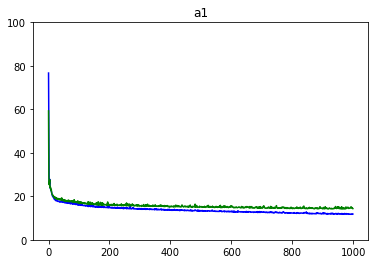

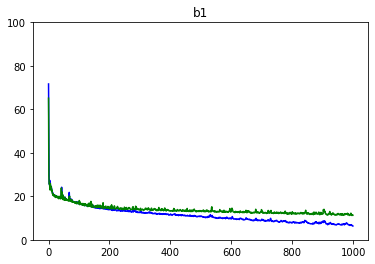

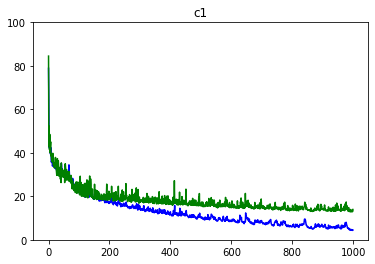

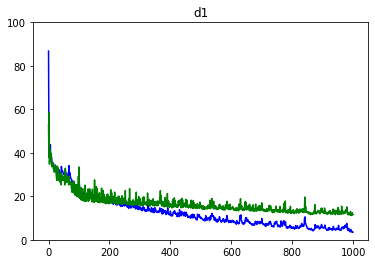

In [18]:
plot_metrics(metric_name='a1_output_mean_absolute_percentage_error', title='a1', ylim=100)
plot_metrics(metric_name='b1_output_mean_absolute_percentage_error', title='b1', ylim=100)
plot_metrics(metric_name='c1_output_mean_absolute_percentage_error', title='c1', ylim=100)
plot_metrics(metric_name='d1_output_mean_absolute_percentage_error', title='d1', ylim=100)

In [ ]:
plot_metrics(metric_name='a1_output_loss', title='a1 LOSS', ylim=0.05)
plot_metrics(metric_name='b1_output_loss', title='b1 LOSS', ylim=0.05)
plot_metrics(metric_name='c1_output_loss', title='c1 LOSS', ylim=0.05)
plot_metrics(metric_name='d1_output_loss', title='d1 LOSS', ylim=0.05)

In [ ]:
norm_test_X

In [ ]:
train

In [30]:
model.save('1_input_model_9-13%')

INFO:tensorflow:Assets written to: 1_input_model_9-13%/assets


In [20]:
loaded_model = tf.keras.models.load_model('./')

In [3]:
weight_path='./2_input_model_3-6%/'
loaded_model = tf.keras.models.load_model(weight_path)

## Frame :  240
## pred_bbox:  [[ 36. 371. 644. 319.]
## [  0. 447. 693. 156.]
## [  0.  72. 793. 933.]]
## scores:  [0.8536508 0.7799842 0.5886173]
## classes : [5. 5. 0.]

In [10]:
pred_bbox=[[ 36, 371, 644, 319],[0, 447, 693, 156]]

In [57]:
boxs=[[ 125. 175. 1705. 866.][ 171. 24. 676. 810.]]

SyntaxError: invalid syntax (<ipython-input-57-09f629ab3b4e>, line 1)

In [71]:
def f(x):
    return {
        'a': 1,
        'b': 2
    }.get(x, 9)

In [73]:
f('a')

1

In [11]:
pred_bbox[0]

[36, 371, 644, 319]

In [12]:
pred_bbox[0][0]

36

In [114]:
classes = [5, 5, 0,0,0,0,7]

In [102]:
classes = [5,0,7]

In [14]:
if 1 not in classes:
    print("yes")
else :
    print("no")

yes


In [103]:
contains_duplicates = any(classes.count(element) > 1 for element in classes)

In [104]:
contains_duplicates

False

In [111]:
def contains_duplicates(X):
    return len(np.unique(X)) != len(X)

In [115]:
contains_duplicates(classes)

True

In [106]:
import numpy
a = numpy.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])

In [108]:
unique, counts = numpy.unique(a, return_counts=True)

In [109]:
unique

array([0, 1, 2, 3, 4])

In [110]:
counts

array([7, 4, 1, 2, 1])

In [15]:
classes

[5, 5, 0, 0, 0, 0, 7]

In [16]:
(classes.count(0))

4

In [17]:
for i in range(classes.count(0)):
    classes.remove(0)
    print(classes)
    print(len(classes))

[5, 5, 0, 0, 0, 7]
6
[5, 5, 0, 0, 7]
5
[5, 5, 0, 7]
4
[5, 5, 7]
3


In [54]:
for i in range(2):
    print(i)

0
1


In [18]:
classes

[5, 5, 7]

In [4]:
def convert2 (width, height, x0, y0, x1, y1):
    x=x0/width
    y=y0/height
    #x=x0/height
    #y=y0/width
    w=(x1-x0)/width
    h=(y1-y0)/height
    return (x, y, w,h)

In [20]:
x1,y1,x2,y2=convert2(1920,1080,pred_bbox[0][0],pred_bbox[0][1],pred_bbox[0][2],pred_bbox[0][3])

In [21]:
x3,y3,x4,y4=convert2(1920,1080,pred_bbox[1][0],pred_bbox[1][1],pred_bbox[1][2],pred_bbox[1][3])

In [22]:
test_sample6=np.array([[classes[0],x1,y1,x2,y2,classes[1],x3,y3,x4,y4]])

In [23]:
predictions = loaded_model.predict(test_sample6)
a1_pred = predictions[0]
b1_pred = predictions[1]
c1_pred = predictions[2]
d1_pred = predictions[3]

In [24]:
a1_pred.item(0)

0.25995466113090515

In [25]:
b1_pred.item(0)

0.4750848412513733

In [26]:
c1_pred.item(0)

0.3817889988422394

In [27]:
d1_pred.item(0)

1.0729647874832153

In [30]:
xmin,xmax,ymin,ymax=convert(1920,1080,a1_pred,b1_pred,c1_pred,d1_pred)

In [31]:
out2='{} {} {} {}'.format(xmin,ymin,xmax,ymax)

In [32]:
out2

'132 -66 865 1092'

In [34]:
import cv2 

In [55]:
path_pic = './test_data/000469.jpg' 
%matplotlib inline 
img = cv2.imread(path_pic) 

In [41]:
height, width, channels = img.shape

In [42]:
print(width)
print(height)

1920
1080


In [38]:
xmin1,xmax1,ymin1,ymax1=convert(width,height,0.42656249999999996,0.9301470588235294 ,0.28020833333333334,0.13602941176470584)

In [39]:
xmin2,xmax2,ymin2,ymax2=convert(width,height,0.44895833333333335,0.01332720588235294 ,0.05104166666666665,0.024816176470588234)

In [40]:
print(xmin1)
print(xmax1)
print(ymin1)
print(ymax1)
print(xmin2)
print(xmax2)
print(ymin1)
print(ymax2)

549
1088
938
1086
813
911
938
28


boxs  [[459. 764. 763. 204.]
 [314. 898.  57.  95.]]
scores  [0.83985895 0.81642073]
classes  ['famSticker' 'sensor']
predict_BBox Coords (xmin, ymin, xmax, ymax): (924, 281, 1086, 616)
1
4

# yolo give xywh not xmin ymin xmax ymax

# than 459 ,764,(459+763),(764+204)

In [172]:
x0,y0,w0,h0=convert2(width,height,459,764,(459+769),(764+204))

In [173]:
x1,y1,w1,h1=convert2(width,height,314,898,(314+57),(898+95))

In [174]:
print(x0)
print(y0)
print(w0)
print(h0)

0.2390625
0.7074074074074074
0.4005208333333333
0.18888888888888888


In [175]:
print(x1)
print(y1)
print(w1)
print(h1)

0.16354166666666667
0.8314814814814815
0.0296875
0.08796296296296297


In [176]:
test_sample7=np.array([[1,x0,y0,w0,h0,4,x1,y1,w1,h1]])

In [177]:
predictions = loaded_model.predict(test_sample7)
a1_pred = predictions[0]
b1_pred = predictions[1]
c1_pred = predictions[2]
d1_pred = predictions[3]

In [178]:
a1_pred.item(0)

0.23960380256175995

In [179]:
b1_pred.item(0)

0.7061225771903992

In [180]:
c1_pred.item(0)

0.47980889678001404

In [181]:
d1_pred.item(0)

0.5078114867210388

In [7]:
path_pic = './test_data/000469.jpg' 
%matplotlib inline 
img = cv2.imread(path_pic) 
height, width, channels = img.shape
xmin,xmax,ymin,ymax=convert(width,height,a1_pred.item(0),b1_pred.item(0),c1_pred.item(0),d1_pred.item(0))
start_point = (xmin, ymin)
end_point = (xmax, ymax)
color = (255, 120, 0) 
color2 = (255, 255, 255) 
color3 = (255, 0, 255) 
thickness = 5
out='{} {} {} {} '.format(xmin,ymin,xmax,ymax)
print(out)
blk = np.zeros(img.shape, np.uint8)
cv2.rectangle(blk, start_point, end_point, color, cv2.FILLED)
out = cv2.addWeighted(img, 1.0, blk, 0.8, 1)
#img2 = cv2.rectangle(img, start_point, end_point, color, thickness) 
img2 = cv2.rectangle(img, (459,764),(1222,968), color2, thickness) 
img2 = cv2.rectangle(img, (314,898),(371,993), color3, thickness) 
plt.imshow(img2)
cv2.imwrite('correct.jpg', img2) 
plt.show()

NameError: name 'a1_pred' is not defined

In [8]:
path_pic = './test_data/000469.jpg' 
%matplotlib inline 
img = cv2.imread(path_pic) 
height, width, channels = img.shape
xmin,xmax,ymin,ymax=convert(width,height,a1_pred.item(0),b1_pred.item(0),c1_pred.item(0),d1_pred.item(0))
start_point = (xmin, ymin)
end_point = (xmax, ymax)
color = (255, 120, 0) 
color2 = (255, 255, 255) 
color3 = (255, 0, 255) 
thickness = 5
out='{} {} {} {} '.format(xmin,ymin,xmax,ymax)
print(out)
blk = np.zeros(img.shape, np.uint8)
cv2.rectangle(blk, start_point, end_point, color, cv2.FILLED)
out = cv2.addWeighted(img, 1.0, blk, 0.8, 1)
img2 = cv2.rectangle(img, start_point, end_point, color, thickness) 
img2 = cv2.rectangle(img, (459,764),(763,204), color2, thickness) 
img2 = cv2.rectangle(img, (314,898),(57,95), color3, thickness) 
plt.imshow(img2)
cv2.imwrite('wrong.jpg', img2) 
plt.show()

NameError: name 'a1_pred' is not defined

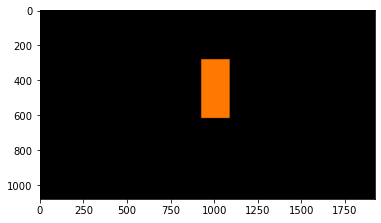

In [157]:
plt.imshow(blk)

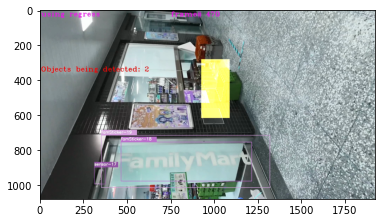

In [158]:
plt.imshow(out)

In [119]:
0.3832720588235294 0.45781249999999996 0.6305147058823529 0.9135416666666666

SyntaxError: invalid syntax (<ipython-input-119-735a46c71f62>, line 1)

510 1179 2 1086 


<Figure size 432x288 with 0 Axes>

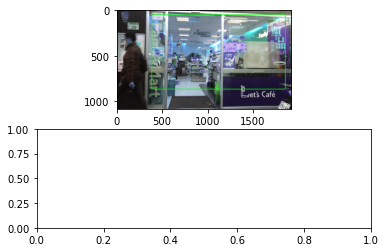

In [14]:
path_pic = './test_data/pic test/20.jpg' 
%matplotlib inline 
img = cv2.imread(path_pic) 
plt.figure()
f,axarr = plt.subplots(2,1)
height, width, channels = img.shape
#xmin,xmax,ymin,ymax=convert(width,height,0.43984375,0.5 ,0.34843749999999996,0.9963235294117647)
start_point = (381, 51)
end_point = (1847, 869)
color = (0, 255, 0) 
thickness = 5
out='{} {} {} {} '.format(xmin,xmax,ymin,ymax)
print(out)
img2 = cv2.rectangle(img, start_point, end_point, color, thickness) 
axarr[0].imshow(img2, cmap='gray')
#cv2.imwrite('gt20.jpg', img2) 

In [2]:
path_pic = './test_data/pic test/20.jpg' 
%matplotlib inline 
img = cv2.imread(path_pic) 
plt.figure()
f,axarr = plt.subplots(2,1)
height, width, channels = img.shape
xmin,xmax,ymin,ymax=convert(width,height,a1_pred.item(0),b1_pred.item(0),c1_pred.item(0),d1_pred.item(0))
start_point = (xmin, ymin)
end_point = (xmax, ymax)
color = (255, 0, 0) 
thickness = 5
out='{} {} {} {} '.format(xmin,xmax,ymin,ymax)
print(out)
img2 = cv2.rectangle(img, start_point, end_point, color, thickness) 
axarr[0].imshow(img2, cmap='gray')
cv2.imwrite('predict20_sensor.jpg', img2) 

NameError: name 'plt' is not defined

In [ ]:
df2 = pd.read_csv('./test_data/data_wh.csv',sep=" ",header=None,names=["id","a", "b","c","d","a1", "b1","c1","d1",'h','w'])

In [ ]:
df2

In [ ]:
df2['id']=df2['id'].replace({1:6,3:4,4:1,6:3})

In [ ]:
df2

In [ ]:
for i in range(len(df2)):
    new_file = open('./test_data/result_wh2.csv', "a")
    #######################################
    id1 =df2['id'][i]
    a=df2['a'][i]
    b=df2['b'][i]
    c=df2['c'][i]
    d=df2['d'][i]
    w=df2['w'][i]
    h=df2['h'][i]
    ###################################
    out ='{} {} {} {} {} {} {}'.format(id1,a,b,c,d,w,h)
    print(out)
    ##########################################3
    test_sample=np.array([[id1, a ,b, c ,d]])
    predictions = loaded_model.predict(test_sample)
    a1_pred = predictions[0]
    b1_pred = predictions[1]
    c1_pred = predictions[2]
    d1_pred = predictions[3]
    xmin,xmax,ymin,ymax=convert(w,h,a1_pred,b1_pred,c1_pred,d1_pred)
    out2='{} {} {} {}'.format(xmin,ymin,xmax,ymax)
    ####################################################
    out3=out2+"\n"
    print(out3)
    print("-------------------------------------------------------------------")
    new_file.write(str(out3))
    new_file.close()

In [ ]:
df3 = pd.read_csv('./test_data/result.csv', sep=" ", header=None)

In [ ]:
df3

<Figure size 432x288 with 0 Axes>

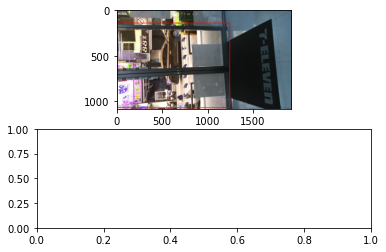

In [139]:
path_pic = './test_data/1_input/img/880.jpg' 
%matplotlib inline 
img = cv2.imread(path_pic) 
plt.figure()
f,axarr = plt.subplots(2,1)
start_point = (1, 143)
end_point = (1237, 1074)
color = (255, 0, 0) 
thickness = 5
#out='{} {} {} {} '.format(xmin,xmax,ymin,ymax)
#print(out)
img2 = cv2.rectangle(img, start_point, end_point, color, thickness) 
axarr[0].imshow(img2, cmap='gray')

<Figure size 432x288 with 0 Axes>

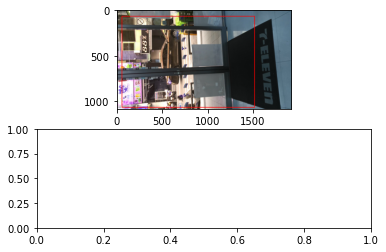

In [144]:
path_pic = './test_data/1_input/img/880.jpg' 
%matplotlib inline 
img = cv2.imread(path_pic) 
plt.figure()
f,axarr = plt.subplots(2,1)
start_point = (54, 68)
end_point = (1509, 1069)
#end_point = (1069, 1509)
color = (255, 0, 0) 
thickness = 5
#out='{} {} {} {} '.format(xmin,xmax,ymin,ymax)
#print(out)
img2 = cv2.rectangle(img, start_point, end_point, color, thickness) 
axarr[0].imshow(img2, cmap='gray')